<a href="https://colab.research.google.com/github/IsmailCh0901/BAO-Project-Extraordinaria-/blob/main/BAO_SCHEDULE_PROJECT(GROUP_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Replicability Instructions

To ensure replicability of this project, follow the steps outlined below. Each step is critical to setting up the environment, generating the dataset, and executing the algorithms for optimal performance. Use the Google Collab Link.

Project Configuration

1.	Initialize the Project Environment:
o	Execute the intiliaziation to set up the necessary environment and dependencies.
o	Ensure all required libraries (inspyred, optuna, numpy, pandas, matplotlib) are installed.
2.	Script Dataset Generator:
o	Creation of a random dataset for a future use, ensuring that comes with the same specifications used in the original experiment.

o	The dataset includes:
	courses: 200 courses with attributes such as course ID, number of students, hours per week, and instructor ID.
	rooms: 30 rooms with attributes such as room ID and capacity.
	timeslots: 25 timeslots detailing day, start time, and end time.
	instructors: 80 instructors with their respective courses and preferred timeslots.
	students: 500 students and their enrolled courses.


EXECUTION ORDER.

1.	INIT:
o	Run the inititlizition to set up the project environment.

2.	SCRIPT DATASET USED ():
o	Execute the script to create the required dataset files.

3.	Genetic Algorithm (GA):
o	Hyperparameter Optimization:
	Perform hyperparameter optimization using the provided Optuna script or use the precomputed results from optuna_study_results.csv.
	Plot the optimization history, hyperparameters importance, parallel plot, and contour plot.
o	Execution with Best Hyperparameters:
	Run the GA using the best hyperparameters obtained from the optimization step.
	Use different seeds for 31 iterations to ensure robustness.

4.	Ant Colony Optimization (ACO):
o	Hyperparameter Optimization:
	Similar to GA, perform hyperparameter optimization using Optuna or use the precomputed results from driveoptuna_study_results_aco.csv.
	Plot the optimization history, hyperparameters importance, parallel plot, and contour plot.
o	Execution with Best Hyperparameters:
	Run the ACO algorithm using the best hyperparameters.
	Ensure to run GA first to address the fitness function issue mentioned.


HYPERPARAMETERS OPTIMIZATION.

For both GA and ACO, the hyperparameters are optimized using Bayesian Optimization with the Optuna library.
•	Genetic Algorithm:
o	Population Size (pop_size): 196
o	Maximum Generations (max_generations): 122
o	Mutation Rate (mutation_rate): 0.025167150341825872
o	Crossover Rate (crossover_rate): 0.9847131373438699
o	Tournament Selection Size: 5
•	Ant Colony Optimization:
o	Number of Ants (num_ants): 59
o	Number of Iterations (num_iterations): 133
o	Alpha (alpha): 0.8812899911986412
o	Beta (beta): 1.2107849139232842
o	Evaporation Rate (evaporation_rate): 0.8181636433351727
Plotting and Evaluation
1.	Plotting Hyperparameters Optimization:
o	Use Optuna's visualization tools to plot the optimization history, hyperparameters importance, parallel plot, and contour plot for both GA and ACO.
2.	Wilcoxon Signed-Rank Test:
o	Conduct the Wilcoxon signed-rank test to evaluate the consistency of results across the 31 iterations for both GA and ACO.
3.	Final Results:
o	Store the final results of each seed iteration in CSV files.
o	Summarize the best fitness, worst fitness, average fitness, median fitness, and standard deviation for both GA and ACO.


SPECIFIC FILE NAMES.

•	Genetic Algorithm:
o	Hyperparameters CSV: optuna_study_results.csv
o	Seeds CSVs: ga_results_seed_1.csv, ga_results_seed_2.csv, etc.
•	Ant Colony Optimization:
o	Hyperparameters CSV: driveoptuna_study_results_aco.csv
o	Seeds CSVs: aco_results_seed_1.csv, aco_results_seed_2.csv, etc.
By following these steps and using the provided scripts and dataset, you can replicate the experiment and verify the results. Ensure to review the README.md file for any additional details or updates.



In [ ]:
# @title INIT.

!pip install inspyred
!pip install optuna
!pip install scipy
!pip install pandas
!pip install matplotlib

import random
import json
import math

from inspyred import ec

from inspyred.ec import emo
import numpy as np
import time
import os

import inspyred
from inspyred import ec
from inspyred import benchmarks
from inspyred.ec import emo



from time import time
import matplotlib.pyplot as plt



import optuna
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib as mpl


from scipy.stats import wilcoxon


import os








In [ ]:
# @title SCRIPT DATASET GENERATOR.


# Constants for generating data
NUM_COURSES = 200
NUM_ROOMS = 20
NUM_TIMESLOTS_PER_DAY = 5
NUM_INSTRUCTORS = 80
NUM_STUDENTS = 500

# Sample data for Timeslots
timeslots_data = [
    {"timeslot_id": f"TS{i}", "day": day, "start_time": start_time, "end_time": end_time}
    for i, (day, start_time, end_time) in enumerate([
        ("Monday", "9:00 AM", "11:00 AM"),
        ("Monday", "11:00 AM", "1:00 PM"),
        ("Monday", "1:00 PM", "3:00 PM"),
        ("Monday", "3:00 PM", "5:00 PM"),
        ("Monday", "5:00 PM", "7:00 PM"),
        ("Tuesday", "9:00 AM", "11:00 AM"),
        ("Tuesday", "11:00 AM", "1:00 PM"),
        ("Tuesday", "1:00 PM", "3:00 PM"),
        ("Tuesday", "3:00 PM", "5:00 PM"),
        ("Tuesday", "5:00 PM", "7:00 PM"),
        ("Wednesday", "9:00 AM", "11:00 AM"),
        ("Wednesday", "11:00 AM", "1:00 PM"),
        ("Wednesday", "1:00 PM", "3:00 PM"),
        ("Wednesday", "3:00 PM", "5:00 PM"),
        ("Wednesday", "5:00 PM", "7:00 PM"),
        ("Thursday", "9:00 AM", "11:00 AM"),
        ("Thursday", "11:00 AM", "1:00 PM"),
        ("Thursday", "1:00 PM", "3:00 PM"),
        ("Thursday", "3:00 PM", "5:00 PM"),
        ("Thursday", "5:00 PM", "7:00 PM"),
        ("Friday", "9:00 AM", "11:00 AM"),
        ("Friday", "11:00 AM", "1:00 PM"),
        ("Friday", "1:00 PM", "3:00 PM"),
        ("Friday", "3:00 PM", "5:00 PM"),
        ("Friday", "5:00 PM", "7:00 PM"),
    ])
]

# Sample data for Instructors (initially empty)
instructors_data = []

# Generating Courses
courses_data = []
instructors_courses_mapping = {}

for i in range(1, NUM_COURSES + 1):
    course_id = f"C{i:03}"
    num_students = random.randint(15, 30)
    num_hours_per_week = random.choice([2, 4])
    instructor_id = f"I{random.randint(1, NUM_INSTRUCTORS):03}"
    courses_data.append({
        "course_id": course_id,
        "num_students": num_students,
        "num_hours_per_week": num_hours_per_week,
        "instructor_id": instructor_id
    })
    if instructor_id not in instructors_courses_mapping:
        instructors_courses_mapping[instructor_id] = []
    instructors_courses_mapping[instructor_id].append(course_id)

# Generating Rooms
rooms_data = [{"room_id": f"R{i:03}", "capacity": 30} for i in range(1, NUM_ROOMS + 1)]

# Generating Instructors
for i in range(1, NUM_INSTRUCTORS + 1):
    instructor_id = f"I{i:03}"
    num_courses = random.randint(2, 4)
    preferred_timeslots = random.sample([f"TS{i}" for i in range(1, len(timeslots_data) + 1)], random.randint(2, 3))
    instructors_data.append({
        "instructor_id": instructor_id,
        "courses": instructors_courses_mapping.get(instructor_id, []),
        "preferred_timeslots": preferred_timeslots
    })

# Generating Students
students_data = []
for i in range(1, NUM_STUDENTS + 1):
    student_id = f"S{i:03}"
    num_courses_st = random.randint(3, 6)
    student_courses = random.sample([course["course_id"] for course in courses_data], num_courses_st)
    students_data.append({
        "student_id": student_id,
        "courses": student_courses
    })

# Print the dataset in JSON format with double quotes
print("courses_data = [")
for course in courses_data:
    print(f"    {json.dumps(course)},")
print("]\n")

print("rooms_data = [")
for room in rooms_data:
    print(f"    {json.dumps(room)},")
print("]\n")

print("timeslots_data = [")
for timeslot in timeslots_data:
    print(f"    {json.dumps(timeslot)},")
print("]\n")

print("instructors_data = [")
for instructor in instructors_data:
    print(f"    {json.dumps(instructor)},")
print("]\n")

print("students_data = [")
for student in students_data:
    print(f"    {json.dumps(student)},")
print("]")

courses_data = [
    {"course_id": "C001", "num_students": 20, "num_hours_per_week": 2, "instructor_id": "I023"},
    {"course_id": "C002", "num_students": 28, "num_hours_per_week": 4, "instructor_id": "I004"},
    {"course_id": "C003", "num_students": 16, "num_hours_per_week": 4, "instructor_id": "I007"},
    {"course_id": "C004", "num_students": 23, "num_hours_per_week": 2, "instructor_id": "I053"},
    {"course_id": "C005", "num_students": 30, "num_hours_per_week": 4, "instructor_id": "I069"},
    {"course_id": "C006", "num_students": 16, "num_hours_per_week": 4, "instructor_id": "I025"},
    {"course_id": "C007", "num_students": 22, "num_hours_per_week": 2, "instructor_id": "I014"},
    {"course_id": "C008", "num_students": 28, "num_hours_per_week": 4, "instructor_id": "I015"},
    {"course_id": "C009", "num_students": 20, "num_hours_per_week": 2, "instructor_id": "I056"},
    {"course_id": "C010", "num_students": 19, "num_hours_per_week": 2, "instructor_id": "I059"},
    {"course_

In [ ]:
# @title SCRIPT DATASET USED FOR ALL THE EXPERIMENTS OF THIS PROJECT
courses = [
    {"course_id": "C001", "num_students": 25, "num_hours_per_week": 4, "instructor_id": "I075"},
    {"course_id": "C002", "num_students": 25, "num_hours_per_week": 4, "instructor_id": "I063"},
    {"course_id": "C003", "num_students": 29, "num_hours_per_week": 4, "instructor_id": "I039"},
    {"course_id": "C004", "num_students": 19, "num_hours_per_week": 4, "instructor_id": "I022"},
    {"course_id": "C005", "num_students": 23, "num_hours_per_week": 2, "instructor_id": "I062"},
    {"course_id": "C006", "num_students": 26, "num_hours_per_week": 4, "instructor_id": "I007"},
    {"course_id": "C007", "num_students": 19, "num_hours_per_week": 4, "instructor_id": "I037"},
    {"course_id": "C008", "num_students": 29, "num_hours_per_week": 2, "instructor_id": "I080"},
    {"course_id": "C009", "num_students": 20, "num_hours_per_week": 4, "instructor_id": "I024"},
    {"course_id": "C010", "num_students": 20, "num_hours_per_week": 2, "instructor_id": "I021"},
    {"course_id": "C011", "num_students": 22, "num_hours_per_week": 2, "instructor_id": "I006"},
    {"course_id": "C012", "num_students": 25, "num_hours_per_week": 2, "instructor_id": "I057"},
    {"course_id": "C013", "num_students": 23, "num_hours_per_week": 4, "instructor_id": "I024"},
    {"course_id": "C014", "num_students": 21, "num_hours_per_week": 2, "instructor_id": "I041"},
    {"course_id": "C015", "num_students": 26, "num_hours_per_week": 2, "instructor_id": "I048"},
    {"course_id": "C016", "num_students": 29, "num_hours_per_week": 2, "instructor_id": "I069"},
    {"course_id": "C017", "num_students": 24, "num_hours_per_week": 2, "instructor_id": "I004"},
    {"course_id": "C018", "num_students": 27, "num_hours_per_week": 4, "instructor_id": "I019"},
    {"course_id": "C019", "num_students": 29, "num_hours_per_week": 4, "instructor_id": "I020"},
    {"course_id": "C020", "num_students": 15, "num_hours_per_week": 4, "instructor_id": "I038"},
    {"course_id": "C021", "num_students": 30, "num_hours_per_week": 4, "instructor_id": "I074"},
    {"course_id": "C022", "num_students": 19, "num_hours_per_week": 4, "instructor_id": "I044"},
    {"course_id": "C023", "num_students": 18, "num_hours_per_week": 4, "instructor_id": "I006"},
    {"course_id": "C024", "num_students": 19, "num_hours_per_week": 2, "instructor_id": "I040"},
    {"course_id": "C025", "num_students": 15, "num_hours_per_week": 4, "instructor_id": "I080"},
    {"course_id": "C026", "num_students": 22, "num_hours_per_week": 4, "instructor_id": "I046"},
    {"course_id": "C027", "num_students": 17, "num_hours_per_week": 4, "instructor_id": "I008"},
    {"course_id": "C028", "num_students": 21, "num_hours_per_week": 2, "instructor_id": "I036"},
    {"course_id": "C029", "num_students": 21, "num_hours_per_week": 2, "instructor_id": "I011"},
    {"course_id": "C030", "num_students": 29, "num_hours_per_week": 2, "instructor_id": "I066"},
    {"course_id": "C031", "num_students": 27, "num_hours_per_week": 2, "instructor_id": "I063"},
    {"course_id": "C032", "num_students": 25, "num_hours_per_week": 2, "instructor_id": "I047"},
    {"course_id": "C033", "num_students": 27, "num_hours_per_week": 2, "instructor_id": "I055"},
    {"course_id": "C034", "num_students": 26, "num_hours_per_week": 4, "instructor_id": "I048"},
    {"course_id": "C035", "num_students": 15, "num_hours_per_week": 4, "instructor_id": "I045"},
    {"course_id": "C036", "num_students": 26, "num_hours_per_week": 4, "instructor_id": "I058"},
    {"course_id": "C037", "num_students": 17, "num_hours_per_week": 2, "instructor_id": "I057"},
    {"course_id": "C038", "num_students": 28, "num_hours_per_week": 4, "instructor_id": "I037"},
    {"course_id": "C039", "num_students": 20, "num_hours_per_week": 4, "instructor_id": "I054"},
    {"course_id": "C040", "num_students": 19, "num_hours_per_week": 2, "instructor_id": "I019"},
    {"course_id": "C041", "num_students": 21, "num_hours_per_week": 4, "instructor_id": "I061"},
    {"course_id": "C042", "num_students": 25, "num_hours_per_week": 2, "instructor_id": "I076"},
    {"course_id": "C043", "num_students": 27, "num_hours_per_week": 2, "instructor_id": "I001"},
    {"course_id": "C044", "num_students": 28, "num_hours_per_week": 4, "instructor_id": "I054"},
    {"course_id": "C045", "num_students": 20, "num_hours_per_week": 4, "instructor_id": "I073"},
    {"course_id": "C046", "num_students": 19, "num_hours_per_week": 2, "instructor_id": "I024"},
    {"course_id": "C047", "num_students": 27, "num_hours_per_week": 4, "instructor_id": "I071"},
    {"course_id": "C048", "num_students": 30, "num_hours_per_week": 2, "instructor_id": "I039"},
    {"course_id": "C049", "num_students": 24, "num_hours_per_week": 4, "instructor_id": "I072"},
    {"course_id": "C050", "num_students": 29, "num_hours_per_week": 2, "instructor_id": "I004"},
    {"course_id": "C051", "num_students": 15, "num_hours_per_week": 2, "instructor_id": "I034"},
    {"course_id": "C052", "num_students": 24, "num_hours_per_week": 4, "instructor_id": "I016"},
    {"course_id": "C053", "num_students": 24, "num_hours_per_week": 4, "instructor_id": "I023"},
    {"course_id": "C054", "num_students": 30, "num_hours_per_week": 2, "instructor_id": "I004"},
    {"course_id": "C055", "num_students": 18, "num_hours_per_week": 4, "instructor_id": "I064"},
    {"course_id": "C056", "num_students": 17, "num_hours_per_week": 4, "instructor_id": "I075"},
    {"course_id": "C057", "num_students": 30, "num_hours_per_week": 4, "instructor_id": "I034"},
    {"course_id": "C058", "num_students": 30, "num_hours_per_week": 2, "instructor_id": "I048"},
    {"course_id": "C059", "num_students": 15, "num_hours_per_week": 4, "instructor_id": "I021"},
    {"course_id": "C060", "num_students": 16, "num_hours_per_week": 2, "instructor_id": "I041"},
    {"course_id": "C061", "num_students": 29, "num_hours_per_week": 2, "instructor_id": "I046"},
    {"course_id": "C062", "num_students": 20, "num_hours_per_week": 2, "instructor_id": "I035"},
    {"course_id": "C063", "num_students": 26, "num_hours_per_week": 4, "instructor_id": "I046"},
    {"course_id": "C064", "num_students": 16, "num_hours_per_week": 4, "instructor_id": "I038"},
    {"course_id": "C065", "num_students": 17, "num_hours_per_week": 2, "instructor_id": "I024"},
    {"course_id": "C066", "num_students": 18, "num_hours_per_week": 2, "instructor_id": "I070"},
    {"course_id": "C067", "num_students": 25, "num_hours_per_week": 4, "instructor_id": "I039"},
    {"course_id": "C068", "num_students": 23, "num_hours_per_week": 4, "instructor_id": "I013"},
    {"course_id": "C069", "num_students": 26, "num_hours_per_week": 2, "instructor_id": "I002"},
    {"course_id": "C070", "num_students": 19, "num_hours_per_week": 4, "instructor_id": "I048"},
    {"course_id": "C071", "num_students": 30, "num_hours_per_week": 4, "instructor_id": "I044"},
    {"course_id": "C072", "num_students": 20, "num_hours_per_week": 2, "instructor_id": "I028"},
    {"course_id": "C073", "num_students": 19, "num_hours_per_week": 2, "instructor_id": "I025"},
    {"course_id": "C074", "num_students": 18, "num_hours_per_week": 4, "instructor_id": "I059"},
    {"course_id": "C075", "num_students": 17, "num_hours_per_week": 2, "instructor_id": "I017"},
    {"course_id": "C076", "num_students": 15, "num_hours_per_week": 4, "instructor_id": "I045"},
    {"course_id": "C077", "num_students": 24, "num_hours_per_week": 4, "instructor_id": "I018"},
    {"course_id": "C078", "num_students": 29, "num_hours_per_week": 4, "instructor_id": "I023"},
    {"course_id": "C079", "num_students": 24, "num_hours_per_week": 2, "instructor_id": "I016"},
    {"course_id": "C080", "num_students": 22, "num_hours_per_week": 2, "instructor_id": "I019"},
    {"course_id": "C081", "num_students": 22, "num_hours_per_week": 4, "instructor_id": "I017"},
    {"course_id": "C082", "num_students": 21, "num_hours_per_week": 2, "instructor_id": "I011"},
    {"course_id": "C083", "num_students": 28, "num_hours_per_week": 2, "instructor_id": "I010"},
    {"course_id": "C084", "num_students": 15, "num_hours_per_week": 4, "instructor_id": "I056"},
    {"course_id": "C085", "num_students": 16, "num_hours_per_week": 2, "instructor_id": "I014"},
    {"course_id": "C086", "num_students": 16, "num_hours_per_week": 2, "instructor_id": "I061"},
    {"course_id": "C087", "num_students": 18, "num_hours_per_week": 4, "instructor_id": "I006"},
    {"course_id": "C088", "num_students": 17, "num_hours_per_week": 4, "instructor_id": "I002"},
    {"course_id": "C089", "num_students": 18, "num_hours_per_week": 2, "instructor_id": "I078"},
    {"course_id": "C090", "num_students": 21, "num_hours_per_week": 2, "instructor_id": "I024"},
    {"course_id": "C091", "num_students": 26, "num_hours_per_week": 2, "instructor_id": "I012"},
    {"course_id": "C092", "num_students": 19, "num_hours_per_week": 4, "instructor_id": "I075"},
    {"course_id": "C093", "num_students": 26, "num_hours_per_week": 4, "instructor_id": "I021"},
    {"course_id": "C094", "num_students": 22, "num_hours_per_week": 2, "instructor_id": "I013"},
    {"course_id": "C095", "num_students": 15, "num_hours_per_week": 2, "instructor_id": "I025"},
    {"course_id": "C096", "num_students": 24, "num_hours_per_week": 2, "instructor_id": "I069"},
    {"course_id": "C097", "num_students": 15, "num_hours_per_week": 2, "instructor_id": "I028"},
    {"course_id": "C098", "num_students": 30, "num_hours_per_week": 4, "instructor_id": "I076"},
    {"course_id": "C099", "num_students": 20, "num_hours_per_week": 4, "instructor_id": "I014"},
    {"course_id": "C100", "num_students": 20, "num_hours_per_week": 4, "instructor_id": "I049"},
    {"course_id": "C101", "num_students": 28, "num_hours_per_week": 2, "instructor_id": "I066"},
    {"course_id": "C102", "num_students": 22, "num_hours_per_week": 4, "instructor_id": "I015"},
    {"course_id": "C103", "num_students": 25, "num_hours_per_week": 2, "instructor_id": "I060"},
    {"course_id": "C104", "num_students": 18, "num_hours_per_week": 2, "instructor_id": "I064"},
    {"course_id": "C105", "num_students": 26, "num_hours_per_week": 4, "instructor_id": "I072"},
    {"course_id": "C106", "num_students": 16, "num_hours_per_week": 2, "instructor_id": "I042"},
    {"course_id": "C107", "num_students": 30, "num_hours_per_week": 2, "instructor_id": "I050"},
    {"course_id": "C108", "num_students": 24, "num_hours_per_week": 4, "instructor_id": "I077"},
    {"course_id": "C109", "num_students": 24, "num_hours_per_week": 4, "instructor_id": "I029"},
    {"course_id": "C110", "num_students": 28, "num_hours_per_week": 4, "instructor_id": "I055"},
    {"course_id": "C111", "num_students": 21, "num_hours_per_week": 2, "instructor_id": "I061"},
    {"course_id": "C112", "num_students": 26, "num_hours_per_week": 2, "instructor_id": "I002"},
    {"course_id": "C113", "num_students": 30, "num_hours_per_week": 2, "instructor_id": "I051"},
    {"course_id": "C114", "num_students": 29, "num_hours_per_week": 2, "instructor_id": "I016"},
    {"course_id": "C115", "num_students": 19, "num_hours_per_week": 4, "instructor_id": "I052"},
    {"course_id": "C116", "num_students": 18, "num_hours_per_week": 2, "instructor_id": "I009"},
    {"course_id": "C117", "num_students": 26, "num_hours_per_week": 2, "instructor_id": "I044"},
    {"course_id": "C118", "num_students": 21, "num_hours_per_week": 4, "instructor_id": "I016"},
    {"course_id": "C119", "num_students": 22, "num_hours_per_week": 4, "instructor_id": "I064"},
    {"course_id": "C120", "num_students": 23, "num_hours_per_week": 4, "instructor_id": "I052"},
    {"course_id": "C121", "num_students": 26, "num_hours_per_week": 4, "instructor_id": "I078"},
    {"course_id": "C122", "num_students": 27, "num_hours_per_week": 4, "instructor_id": "I066"},
    {"course_id": "C123", "num_students": 23, "num_hours_per_week": 2, "instructor_id": "I059"},
    {"course_id": "C124", "num_students": 18, "num_hours_per_week": 2, "instructor_id": "I033"},
    {"course_id": "C125", "num_students": 30, "num_hours_per_week": 4, "instructor_id": "I030"},
    {"course_id": "C126", "num_students": 19, "num_hours_per_week": 2, "instructor_id": "I013"},
    {"course_id": "C127", "num_students": 16, "num_hours_per_week": 2, "instructor_id": "I064"},
    {"course_id": "C128", "num_students": 15, "num_hours_per_week": 2, "instructor_id": "I049"},
    {"course_id": "C129", "num_students": 25, "num_hours_per_week": 2, "instructor_id": "I039"},
    {"course_id": "C130", "num_students": 18, "num_hours_per_week": 2, "instructor_id": "I067"},
    {"course_id": "C131", "num_students": 30, "num_hours_per_week": 4, "instructor_id": "I026"},
    {"course_id": "C132", "num_students": 24, "num_hours_per_week": 4, "instructor_id": "I063"},
    {"course_id": "C133", "num_students": 23, "num_hours_per_week": 4, "instructor_id": "I070"},
    {"course_id": "C134", "num_students": 15, "num_hours_per_week": 2, "instructor_id": "I056"},
    {"course_id": "C135", "num_students": 18, "num_hours_per_week": 4, "instructor_id": "I058"},
    {"course_id": "C136", "num_students": 25, "num_hours_per_week": 4, "instructor_id": "I057"},
    {"course_id": "C137", "num_students": 29, "num_hours_per_week": 2, "instructor_id": "I005"},
    {"course_id": "C138", "num_students": 20, "num_hours_per_week": 4, "instructor_id": "I022"},
    {"course_id": "C139", "num_students": 30, "num_hours_per_week": 4, "instructor_id": "I018"},
    {"course_id": "C140", "num_students": 24, "num_hours_per_week": 4, "instructor_id": "I063"},
    {"course_id": "C141", "num_students": 18, "num_hours_per_week": 4, "instructor_id": "I071"},
    {"course_id": "C142", "num_students": 30, "num_hours_per_week": 4, "instructor_id": "I072"},
    {"course_id": "C143", "num_students": 20, "num_hours_per_week": 2, "instructor_id": "I051"},
    {"course_id": "C144", "num_students": 23, "num_hours_per_week": 4, "instructor_id": "I076"},
    {"course_id": "C145", "num_students": 27, "num_hours_per_week": 4, "instructor_id": "I037"},
    {"course_id": "C146", "num_students": 25, "num_hours_per_week": 2, "instructor_id": "I004"},
    {"course_id": "C147", "num_students": 16, "num_hours_per_week": 2, "instructor_id": "I047"},
    {"course_id": "C148", "num_students": 26, "num_hours_per_week": 2, "instructor_id": "I044"},
    {"course_id": "C149", "num_students": 27, "num_hours_per_week": 2, "instructor_id": "I055"},
    {"course_id": "C150", "num_students": 26, "num_hours_per_week": 4, "instructor_id": "I053"},
    {"course_id": "C151", "num_students": 26, "num_hours_per_week": 2, "instructor_id": "I032"},
    {"course_id": "C152", "num_students": 22, "num_hours_per_week": 2, "instructor_id": "I040"},
    {"course_id": "C153", "num_students": 17, "num_hours_per_week": 2, "instructor_id": "I040"},
    {"course_id": "C154", "num_students": 18, "num_hours_per_week": 4, "instructor_id": "I022"},
    {"course_id": "C155", "num_students": 15, "num_hours_per_week": 4, "instructor_id": "I005"},
    {"course_id": "C156", "num_students": 29, "num_hours_per_week": 4, "instructor_id": "I073"},
    {"course_id": "C157", "num_students": 28, "num_hours_per_week": 4, "instructor_id": "I003"},
    {"course_id": "C158", "num_students": 30, "num_hours_per_week": 2, "instructor_id": "I041"},
    {"course_id": "C159", "num_students": 27, "num_hours_per_week": 4, "instructor_id": "I042"},
    {"course_id": "C160", "num_students": 18, "num_hours_per_week": 4, "instructor_id": "I013"},
    {"course_id": "C161", "num_students": 21, "num_hours_per_week": 4, "instructor_id": "I064"},
    {"course_id": "C162", "num_students": 25, "num_hours_per_week": 2, "instructor_id": "I079"},
    {"course_id": "C163", "num_students": 24, "num_hours_per_week": 4, "instructor_id": "I056"},
    {"course_id": "C164", "num_students": 21, "num_hours_per_week": 4, "instructor_id": "I010"},
    {"course_id": "C165", "num_students": 21, "num_hours_per_week": 4, "instructor_id": "I034"},
    {"course_id": "C166", "num_students": 16, "num_hours_per_week": 4, "instructor_id": "I074"},
    {"course_id": "C167", "num_students": 27, "num_hours_per_week": 2, "instructor_id": "I080"},
    {"course_id": "C168", "num_students": 17, "num_hours_per_week": 2, "instructor_id": "I076"},
    {"course_id": "C169", "num_students": 25, "num_hours_per_week": 4, "instructor_id": "I009"},
    {"course_id": "C170", "num_students": 30, "num_hours_per_week": 4, "instructor_id": "I027"},
    {"course_id": "C171", "num_students": 26, "num_hours_per_week": 2, "instructor_id": "I039"},
    {"course_id": "C172", "num_students": 24, "num_hours_per_week": 4, "instructor_id": "I070"},
    {"course_id": "C173", "num_students": 25, "num_hours_per_week": 2, "instructor_id": "I054"},
    {"course_id": "C174", "num_students": 27, "num_hours_per_week": 4, "instructor_id": "I080"},
    {"course_id": "C175", "num_students": 29, "num_hours_per_week": 2, "instructor_id": "I003"},
    {"course_id": "C176", "num_students": 20, "num_hours_per_week": 4, "instructor_id": "I028"},
    {"course_id": "C177", "num_students": 29, "num_hours_per_week": 4, "instructor_id": "I069"},
    {"course_id": "C178", "num_students": 28, "num_hours_per_week": 2, "instructor_id": "I067"},
    {"course_id": "C179", "num_students": 21, "num_hours_per_week": 4, "instructor_id": "I060"},
    {"course_id": "C180", "num_students": 19, "num_hours_per_week": 2, "instructor_id": "I020"},
    {"course_id": "C181", "num_students": 24, "num_hours_per_week": 4, "instructor_id": "I053"},
    {"course_id": "C182", "num_students": 25, "num_hours_per_week": 2, "instructor_id": "I027"},
    {"course_id": "C183", "num_students": 28, "num_hours_per_week": 4, "instructor_id": "I037"},
    {"course_id": "C184", "num_students": 20, "num_hours_per_week": 4, "instructor_id": "I077"},
    {"course_id": "C185", "num_students": 22, "num_hours_per_week": 4, "instructor_id": "I031"},
    {"course_id": "C186", "num_students": 18, "num_hours_per_week": 2, "instructor_id": "I025"},
    {"course_id": "C187", "num_students": 15, "num_hours_per_week": 2, "instructor_id": "I040"},
    {"course_id": "C188", "num_students": 29, "num_hours_per_week": 4, "instructor_id": "I072"},
    {"course_id": "C189", "num_students": 28, "num_hours_per_week": 4, "instructor_id": "I005"},
    {"course_id": "C190", "num_students": 21, "num_hours_per_week": 2, "instructor_id": "I035"},
    {"course_id": "C191", "num_students": 19, "num_hours_per_week": 2, "instructor_id": "I034"},
    {"course_id": "C192", "num_students": 23, "num_hours_per_week": 2, "instructor_id": "I006"},
    {"course_id": "C193", "num_students": 30, "num_hours_per_week": 2, "instructor_id": "I008"},
    {"course_id": "C194", "num_students": 17, "num_hours_per_week": 4, "instructor_id": "I078"},
    {"course_id": "C195", "num_students": 24, "num_hours_per_week": 2, "instructor_id": "I053"},
    {"course_id": "C196", "num_students": 26, "num_hours_per_week": 2, "instructor_id": "I051"},
    {"course_id": "C197", "num_students": 19, "num_hours_per_week": 2, "instructor_id": "I015"},
    {"course_id": "C198", "num_students": 18, "num_hours_per_week": 4, "instructor_id": "I064"},
    {"course_id": "C199", "num_students": 17, "num_hours_per_week": 2, "instructor_id": "I077"},
    {"course_id": "C200", "num_students": 18, "num_hours_per_week": 4, "instructor_id": "I043"},
]

rooms = [
    {"room_id": "R001", "capacity": 30},
    {"room_id": "R002", "capacity": 30},
    {"room_id": "R003", "capacity": 30},
    {"room_id": "R004", "capacity": 30},
    {"room_id": "R005", "capacity": 30},
    {"room_id": "R006", "capacity": 30},
    {"room_id": "R007", "capacity": 30},
    {"room_id": "R008", "capacity": 30},
    {"room_id": "R009", "capacity": 30},
    {"room_id": "R010", "capacity": 30},
    {"room_id": "R011", "capacity": 30},
    {"room_id": "R012", "capacity": 30},
    {"room_id": "R013", "capacity": 30},
    {"room_id": "R014", "capacity": 30},
    {"room_id": "R015", "capacity": 30},
    {"room_id": "R016", "capacity": 30},
    {"room_id": "R017", "capacity": 30},
    {"room_id": "R018", "capacity": 30},
    {"room_id": "R019", "capacity": 30},
    {"room_id": "R020", "capacity": 30},
]

timeslots = [
    {"timeslot_id": "TS1", "day": "Monday", "start_time": "9:00 AM", "end_time": "11:00 AM"},
    {"timeslot_id": "TS2", "day": "Monday", "start_time": "11:00 AM", "end_time": "1:00 PM"},
    {"timeslot_id": "TS3", "day": "Monday", "start_time": "1:00 PM", "end_time": "3:00 PM"},
    {"timeslot_id": "TS4", "day": "Monday", "start_time": "3:00 PM", "end_time": "5:00 PM"},
    {"timeslot_id": "TS5", "day": "Monday", "start_time": "5:00 PM", "end_time": "7:00 PM"},
    {"timeslot_id": "TS6", "day": "Tuesday", "start_time": "9:00 AM", "end_time": "11:00 AM"},
    {"timeslot_id": "TS7", "day": "Tuesday", "start_time": "11:00 AM", "end_time": "1:00 PM"},
    {"timeslot_id": "TS8", "day": "Tuesday", "start_time": "1:00 PM", "end_time": "3:00 PM"},
    {"timeslot_id": "TS9", "day": "Tuesday", "start_time": "3:00 PM", "end_time": "5:00 PM"},
    {"timeslot_id": "TS10", "day": "Tuesday", "start_time": "5:00 PM", "end_time": "7:00 PM"},
    {"timeslot_id": "TS11", "day": "Wednesday", "start_time": "9:00 AM", "end_time": "11:00 AM"},
    {"timeslot_id": "TS12", "day": "Wednesday", "start_time": "11:00 AM", "end_time": "1:00 PM"},
    {"timeslot_id": "TS13", "day": "Wednesday", "start_time": "1:00 PM", "end_time": "3:00 PM"},
    {"timeslot_id": "TS14", "day": "Wednesday", "start_time": "3:00 PM", "end_time": "5:00 PM"},
    {"timeslot_id": "TS15", "day": "Wednesday", "start_time": "5:00 PM", "end_time": "7:00 PM"},
    {"timeslot_id": "TS16", "day": "Thursday", "start_time": "9:00 AM", "end_time": "11:00 AM"},
    {"timeslot_id": "TS17", "day": "Thursday", "start_time": "11:00 AM", "end_time": "1:00 PM"},
    {"timeslot_id": "TS18", "day": "Thursday", "start_time": "1:00 PM", "end_time": "3:00 PM"},
    {"timeslot_id": "TS19", "day": "Thursday", "start_time": "3:00 PM", "end_time": "5:00 PM"},
    {"timeslot_id": "TS20", "day": "Thursday", "start_time": "5:00 PM", "end_time": "7:00 PM"},
    {"timeslot_id": "TS21", "day": "Friday", "start_time": "9:00 AM", "end_time": "11:00 AM"},
    {"timeslot_id": "TS22", "day": "Friday", "start_time": "11:00 AM", "end_time": "1:00 PM"},
    {"timeslot_id": "TS23", "day": "Friday", "start_time": "1:00 PM", "end_time": "3:00 PM"},
    {"timeslot_id": "TS24", "day": "Friday", "start_time": "3:00 PM", "end_time": "5:00 PM"},
    {"timeslot_id": "TS25", "day": "Friday", "start_time": "5:00 PM", "end_time": "7:00 PM"},
]

instructors = [
     {"instructor_id": "I001", "courses": ["C043"], "preferred_timeslots": ["TS24", "TS8", "TS14"]},
    {"instructor_id": "I002", "courses": ["C069", "C088", "C112"], "preferred_timeslots": ["TS4", "TS6"]},
    {"instructor_id": "I003", "courses": ["C157", "C175"], "preferred_timeslots": ["TS15", "TS14", "TS9"]},
    {"instructor_id": "I004", "courses": ["C017", "C050", "C054", "C146"], "preferred_timeslots": ["TS16", "TS18"]},
    {"instructor_id": "I005", "courses": ["C137", "C155", "C189"], "preferred_timeslots": ["TS11", "TS18"]},
    {"instructor_id": "I006", "courses": ["C011", "C023", "C087", "C192"], "preferred_timeslots": ["TS22", "TS8", "TS9"]},
    {"instructor_id": "I007", "courses": ["C006"], "preferred_timeslots": ["TS16", "TS23", "TS12"]},
    {"instructor_id": "I008", "courses": ["C027", "C193"], "preferred_timeslots": ["TS21", "TS20"]},
    {"instructor_id": "I009", "courses": ["C116", "C169"], "preferred_timeslots": ["TS23", "TS22"]},
    {"instructor_id": "I010", "courses": ["C083", "C164"], "preferred_timeslots": ["TS18", "TS13", "TS10"]},
    {"instructor_id": "I011", "courses": ["C029", "C082"], "preferred_timeslots": ["TS22", "TS4", "TS18"]},
    {"instructor_id": "I012", "courses": ["C091"], "preferred_timeslots": ["TS13", "TS1", "TS9"]},
    {"instructor_id": "I013", "courses": ["C068", "C094", "C126", "C160"], "preferred_timeslots": ["TS25", "TS8"]},
    {"instructor_id": "I014", "courses": ["C085", "C099"], "preferred_timeslots": ["TS6", "TS15"]},
    {"instructor_id": "I015", "courses": ["C102", "C197"], "preferred_timeslots": ["TS25", "TS21", "TS14"]},
    {"instructor_id": "I016", "courses": ["C052", "C079", "C114", "C118"], "preferred_timeslots": ["TS3", "TS25", "TS16"]},
    {"instructor_id": "I017", "courses": ["C075", "C081"], "preferred_timeslots": ["TS11", "TS23", "TS14"]},
    {"instructor_id": "I018", "courses": ["C077", "C139"], "preferred_timeslots": ["TS23", "TS9"]},
    {"instructor_id": "I019", "courses": ["C018", "C040", "C080"], "preferred_timeslots": ["TS12", "TS14"]},
    {"instructor_id": "I020", "courses": ["C019", "C180"], "preferred_timeslots": ["TS15", "TS23", "TS1"]},
    {"instructor_id": "I021", "courses": ["C010", "C059", "C093"], "preferred_timeslots": ["TS21", "TS15"]},
    {"instructor_id": "I022", "courses": ["C004", "C138", "C154"], "preferred_timeslots": ["TS1", "TS13"]},
    {"instructor_id": "I023", "courses": ["C053", "C078"], "preferred_timeslots": ["TS11", "TS19", "TS3"]},
    {"instructor_id": "I024", "courses": ["C009", "C013", "C046", "C065", "C090"], "preferred_timeslots": ["TS8", "TS17"]},
    {"instructor_id": "I025", "courses": ["C073", "C095", "C186"], "preferred_timeslots": ["TS20", "TS22"]},
    {"instructor_id": "I026", "courses": ["C131"], "preferred_timeslots": ["TS15", "TS16", "TS24"]},
    {"instructor_id": "I027", "courses": ["C170", "C182"], "preferred_timeslots": ["TS6", "TS22", "TS19"]},
    {"instructor_id": "I028", "courses": ["C072", "C097", "C176"], "preferred_timeslots": ["TS7", "TS3", "TS14"]},
    {"instructor_id": "I029", "courses": ["C109"], "preferred_timeslots": ["TS13", "TS19"]},
    {"instructor_id": "I030", "courses": ["C125"], "preferred_timeslots": ["TS1", "TS18"]},
    {"instructor_id": "I031", "courses": ["C185"], "preferred_timeslots": ["TS3", "TS15"]},
    {"instructor_id": "I032", "courses": ["C151"], "preferred_timeslots": ["TS23", "TS6", "TS2"]},
    {"instructor_id": "I033", "courses": ["C124"], "preferred_timeslots": ["TS20", "TS9", "TS5"]},
    {"instructor_id": "I034", "courses": ["C051", "C057", "C165", "C191"], "preferred_timeslots": ["TS6", "TS19", "TS4"]},
    {"instructor_id": "I035", "courses": ["C062", "C190"], "preferred_timeslots": ["TS25", "TS15", "TS22"]},
    {"instructor_id": "I036", "courses": ["C028"], "preferred_timeslots": ["TS8", "TS23"]},
    {"instructor_id": "I037", "courses": ["C007", "C038", "C145", "C183"], "preferred_timeslots": ["TS9", "TS10"]},
    {"instructor_id": "I038", "courses": ["C020", "C064"], "preferred_timeslots": ["TS13", "TS5", "TS14"]},
    {"instructor_id": "I039", "courses": ["C003", "C048", "C067", "C129", "C171"], "preferred_timeslots": ["TS10", "TS24"]},
    {"instructor_id": "I040", "courses": ["C024", "C152", "C153", "C187"], "preferred_timeslots": ["TS14", "TS6"]},
    {"instructor_id": "I041", "courses": ["C014", "C060", "C158"], "preferred_timeslots": ["TS1", "TS10"]},
    {"instructor_id": "I042", "courses": ["C106", "C159"], "preferred_timeslots": ["TS20", "TS15"]},
    {"instructor_id": "I043", "courses": ["C200"], "preferred_timeslots": ["TS19", "TS22", "TS21"]},
    {"instructor_id": "I044", "courses": ["C022", "C071", "C117", "C148"], "preferred_timeslots": ["TS1", "TS16"]},
    {"instructor_id": "I045", "courses": ["C035", "C076"], "preferred_timeslots": ["TS23", "TS13", "TS22"]},
    {"instructor_id": "I046", "courses": ["C026", "C061", "C063"], "preferred_timeslots": ["TS23", "TS14", "TS24"]},
    {"instructor_id": "I047", "courses": ["C032", "C147"], "preferred_timeslots": ["TS3", "TS4", "TS18"]},
    {"instructor_id": "I048", "courses": ["C015", "C034", "C058", "C070"], "preferred_timeslots": ["TS11", "TS8"]},
    {"instructor_id": "I049", "courses": ["C100", "C128"], "preferred_timeslots": ["TS20", "TS22", "TS23"]},
    {"instructor_id": "I050", "courses": ["C107"], "preferred_timeslots": ["TS1", "TS9"]},
    {"instructor_id": "I051", "courses": ["C113", "C143", "C196"], "preferred_timeslots": ["TS10", "TS13", "TS22"]},
    {"instructor_id": "I052", "courses": ["C115", "C120"], "preferred_timeslots": ["TS18", "TS2"]},
    {"instructor_id": "I053", "courses": ["C150", "C181", "C195"], "preferred_timeslots": ["TS9", "TS6"]},
    {"instructor_id": "I054", "courses": ["C039", "C044", "C173"], "preferred_timeslots": ["TS11", "TS15", "TS5"]},
    {"instructor_id": "I055", "courses": ["C033", "C110", "C149"], "preferred_timeslots": ["TS23", "TS17", "TS14"]},
    {"instructor_id": "I056", "courses": ["C084", "C134", "C163"], "preferred_timeslots": ["TS4", "TS11", "TS2"]},
    {"instructor_id": "I057", "courses": ["C012", "C037", "C136"], "preferred_timeslots": ["TS9", "TS24", "TS12"]},
    {"instructor_id": "I058", "courses": ["C036", "C135"], "preferred_timeslots": ["TS9", "TS20", "TS25"]},
    {"instructor_id": "I059", "courses": ["C074", "C123"], "preferred_timeslots": ["TS14", "TS6", "TS11"]},
    {"instructor_id": "I060", "courses": ["C103", "C179"], "preferred_timeslots": ["TS25", "TS5", "TS18"]},
    {"instructor_id": "I061", "courses": ["C041", "C086", "C111"], "preferred_timeslots": ["TS2", "TS7", "TS5"]},
    {"instructor_id": "I062", "courses": ["C005"], "preferred_timeslots": ["TS6", "TS2"]},
    {"instructor_id": "I063", "courses": ["C002", "C031", "C132", "C140"], "preferred_timeslots": ["TS6", "TS23", "TS15"]},
    {"instructor_id": "I064", "courses": ["C055", "C104", "C119", "C127", "C161", "C198"], "preferred_timeslots": ["TS16", "TS2"]},
    {"instructor_id": "I065", "courses": [], "preferred_timeslots": ["TS23", "TS18", "TS16"]},
    {"instructor_id": "I066", "courses": ["C030", "C101", "C122"], "preferred_timeslots": ["TS4", "TS24", "TS5"]},
    {"instructor_id": "I067", "courses": ["C130", "C178"], "preferred_timeslots": ["TS3", "TS7", "TS10"]},
    {"instructor_id": "I068", "courses": [], "preferred_timeslots": ["TS24", "TS17"]},
    {"instructor_id": "I069", "courses": ["C016", "C096", "C177"], "preferred_timeslots": ["TS19", "TS1"]},
    {"instructor_id": "I070", "courses": ["C066", "C133", "C172"], "preferred_timeslots": ["TS14", "TS3"]},
    {"instructor_id": "I071", "courses": ["C047", "C141"], "preferred_timeslots": ["TS22", "TS4", "TS11"]},
    {"instructor_id": "I072", "courses": ["C049", "C105", "C142", "C188"], "preferred_timeslots": ["TS22", "TS4", "TS13"]},
    {"instructor_id": "I073", "courses": ["C045", "C156"], "preferred_timeslots": ["TS11", "TS5"]},
    {"instructor_id": "I074", "courses": ["C021", "C166"], "preferred_timeslots": ["TS15", "TS23"]},
    {"instructor_id": "I075", "courses": ["C001", "C056", "C092"], "preferred_timeslots": ["TS15", "TS21", "TS9"]},
    {"instructor_id": "I076", "courses": ["C042", "C098", "C144", "C168"], "preferred_timeslots": ["TS11", "TS2"]},
    {"instructor_id": "I077", "courses": ["C108", "C184", "C199"], "preferred_timeslots": ["TS11", "TS24", "TS19"]},
    {"instructor_id": "I078", "courses": ["C089", "C121", "C194"], "preferred_timeslots": ["TS2", "TS21"]},
    {"instructor_id": "I079", "courses": ["C162"], "preferred_timeslots": ["TS2", "TS24", "TS3"]},
    {"instructor_id": "I080", "courses": ["C008", "C025", "C167", "C174"], "preferred_timeslots": ["TS3", "TS13", "TS9"]},

]

students = [
    {"student_id": "S001", "courses": ["C062", "C198", "C103", "C023"]},
    {"student_id": "S002", "courses": ["C054", "C042", "C100"]},
    {"student_id": "S003", "courses": ["C073", "C166", "C193", "C168", "C040", "C031"]},
    {"student_id": "S004", "courses": ["C126", "C111", "C189", "C080", "C176"]},
    {"student_id": "S005", "courses": ["C092", "C171", "C025", "C095"]},
    {"student_id": "S006", "courses": ["C126", "C115", "C100", "C122"]},
    {"student_id": "S007", "courses": ["C145", "C154", "C109", "C024", "C194"]},
    {"student_id": "S008", "courses": ["C095", "C158", "C048", "C112", "C162", "C110"]},
    {"student_id": "S009", "courses": ["C011", "C132", "C088"]},
    {"student_id": "S010", "courses": ["C174", "C058", "C166", "C176", "C183", "C040"]},
    {"student_id": "S011", "courses": ["C135", "C162", "C166", "C022", "C075", "C120"]},
    {"student_id": "S012", "courses": ["C021", "C123", "C077", "C039", "C033", "C176"]},
    {"student_id": "S013", "courses": ["C064", "C134", "C110", "C076", "C146"]},
    {"student_id": "S014", "courses": ["C142", "C020", "C012"]},
    {"student_id": "S015", "courses": ["C131", "C109", "C106"]},
    {"student_id": "S016", "courses": ["C119", "C170", "C185"]},
    {"student_id": "S017", "courses": ["C091", "C066", "C150", "C021", "C197"]},
    {"student_id": "S018", "courses": ["C030", "C190", "C170"]},
    {"student_id": "S019", "courses": ["C046", "C047", "C101", "C012", "C022", "C107"]},
    {"student_id": "S020", "courses": ["C081", "C151", "C186", "C117", "C194"]},
    {"student_id": "S021", "courses": ["C160", "C068", "C088", "C048", "C055", "C021"]},
    {"student_id": "S022", "courses": ["C173", "C028", "C112", "C137", "C005"]},
    {"student_id": "S023", "courses": ["C102", "C030", "C004"]},
    {"student_id": "S024", "courses": ["C168", "C123", "C118", "C178"]},
    {"student_id": "S025", "courses": ["C169", "C191", "C155", "C186", "C125", "C078"]},
    {"student_id": "S026", "courses": ["C177", "C173", "C102", "C078", "C023"]},
    {"student_id": "S027", "courses": ["C035", "C004", "C049", "C029"]},
    {"student_id": "S028", "courses": ["C179", "C049", "C007"]},
    {"student_id": "S029", "courses": ["C124", "C167", "C038", "C062"]},
    {"student_id": "S030", "courses": ["C161", "C138", "C049", "C023", "C078", "C198"]},
    {"student_id": "S031", "courses": ["C038", "C122", "C109", "C006", "C030", "C043"]},
    {"student_id": "S032", "courses": ["C190", "C180", "C114", "C125"]},
    {"student_id": "S033", "courses": ["C006", "C116", "C150", "C063", "C052", "C076"]},
    {"student_id": "S034", "courses": ["C014", "C086", "C003", "C027", "C162", "C183"]},
    {"student_id": "S035", "courses": ["C107", "C127", "C189", "C149", "C153", "C188"]},
    {"student_id": "S036", "courses": ["C010", "C125", "C103", "C132", "C152"]},
    {"student_id": "S037", "courses": ["C060", "C183", "C016", "C136", "C005", "C109"]},
    {"student_id": "S038", "courses": ["C142", "C017", "C069", "C166", "C107"]},
    {"student_id": "S039", "courses": ["C030", "C127", "C160", "C166", "C089", "C115"]},
    {"student_id": "S040", "courses": ["C006", "C042", "C074", "C186", "C050", "C121"]},
    {"student_id": "S041", "courses": ["C113", "C060", "C130", "C057", "C151"]},
    {"student_id": "S042", "courses": ["C155", "C184", "C169", "C120", "C034"]},
    {"student_id": "S043", "courses": ["C186", "C183", "C100", "C107", "C173"]},
    {"student_id": "S044", "courses": ["C121", "C042", "C160", "C054", "C073"]},
    {"student_id": "S045", "courses": ["C171", "C124", "C034"]},
    {"student_id": "S046", "courses": ["C052", "C041", "C156", "C126"]},
    {"student_id": "S047", "courses": ["C107", "C127", "C078"]},
    {"student_id": "S048", "courses": ["C054", "C143", "C013", "C005"]},
    {"student_id": "S049", "courses": ["C067", "C092", "C174", "C041", "C045"]},
    {"student_id": "S050", "courses": ["C017", "C087", "C111"]},
    {"student_id": "S051", "courses": ["C159", "C059", "C031"]},
    {"student_id": "S052", "courses": ["C125", "C067", "C088", "C091"]},
    {"student_id": "S053", "courses": ["C198", "C143", "C069"]},
    {"student_id": "S054", "courses": ["C177", "C132", "C155", "C172"]},
    {"student_id": "S055", "courses": ["C181", "C013", "C113"]},
    {"student_id": "S056", "courses": ["C194", "C029", "C028", "C157", "C027", "C144"]},
    {"student_id": "S057", "courses": ["C130", "C027", "C043"]},
    {"student_id": "S058", "courses": ["C053", "C093", "C041"]},
    {"student_id": "S059", "courses": ["C182", "C114", "C196", "C130", "C128"]},
    {"student_id": "S060", "courses": ["C040", "C166", "C094"]},
    {"student_id": "S061", "courses": ["C036", "C032", "C052", "C113", "C107"]},
    {"student_id": "S062", "courses": ["C063", "C122", "C088"]},
    {"student_id": "S063", "courses": ["C130", "C044", "C022", "C069", "C096"]},
    {"student_id": "S064", "courses": ["C093", "C162", "C171", "C063", "C039", "C193"]},
    {"student_id": "S065", "courses": ["C059", "C036", "C110", "C106", "C105", "C118"]},
    {"student_id": "S066", "courses": ["C008", "C114", "C038", "C198", "C003"]},
    {"student_id": "S067", "courses": ["C022", "C087", "C081"]},
    {"student_id": "S068", "courses": ["C198", "C043", "C112", "C016", "C101", "C195"]},
    {"student_id": "S069", "courses": ["C170", "C165", "C039"]},
    {"student_id": "S070", "courses": ["C162", "C183", "C170"]},
    {"student_id": "S071", "courses": ["C108", "C103", "C175", "C180", "C142"]},
    {"student_id": "S072", "courses": ["C185", "C191", "C081", "C089", "C003"]},
    {"student_id": "S073", "courses": ["C136", "C157", "C038", "C180", "C104"]},
    {"student_id": "S074", "courses": ["C165", "C053", "C140", "C160", "C159", "C167"]},
    {"student_id": "S075", "courses": ["C179", "C089", "C167", "C104", "C199", "C051"]},
    {"student_id": "S076", "courses": ["C022", "C010", "C138", "C086", "C100"]},
    {"student_id": "S077", "courses": ["C134", "C139", "C073", "C055"]},
    {"student_id": "S078", "courses": ["C131", "C142", "C080"]},
    {"student_id": "S079", "courses": ["C194", "C163", "C041", "C006", "C008"]},
    {"student_id": "S080", "courses": ["C062", "C199", "C078", "C186", "C109"]},
    {"student_id": "S081", "courses": ["C188", "C016", "C096"]},
    {"student_id": "S082", "courses": ["C161", "C130", "C091", "C032", "C013"]},
    {"student_id": "S083", "courses": ["C115", "C077", "C147"]},
    {"student_id": "S084", "courses": ["C117", "C087", "C061"]},
    {"student_id": "S085", "courses": ["C090", "C077", "C073", "C171"]},
    {"student_id": "S086", "courses": ["C183", "C097", "C134", "C189"]},
    {"student_id": "S087", "courses": ["C027", "C084", "C133", "C150"]},
    {"student_id": "S088", "courses": ["C200", "C093", "C117", "C026"]},
    {"student_id": "S089", "courses": ["C183", "C109", "C106", "C021"]},
    {"student_id": "S090", "courses": ["C016", "C109", "C034"]},
    {"student_id": "S091", "courses": ["C055", "C115", "C020", "C095", "C174", "C135"]},
    {"student_id": "S092", "courses": ["C151", "C144", "C133", "C200", "C102", "C068"]},
    {"student_id": "S093", "courses": ["C163", "C109", "C113", "C177", "C126", "C188"]},
    {"student_id": "S094", "courses": ["C042", "C037", "C130", "C033", "C125", "C183"]},
    {"student_id": "S095", "courses": ["C034", "C181", "C132", "C136", "C031", "C178"]},
    {"student_id": "S096", "courses": ["C117", "C122", "C009", "C192"]},
    {"student_id": "S097", "courses": ["C144", "C095", "C031", "C155"]},
    {"student_id": "S098", "courses": ["C029", "C031", "C095", "C147", "C075", "C011"]},
    {"student_id": "S099", "courses": ["C031", "C096", "C079", "C078"]},
    {"student_id": "S100", "courses": ["C125", "C008", "C037", "C151", "C108"]},
    {"student_id": "S101", "courses": ["C079", "C073", "C056"]},
    {"student_id": "S102", "courses": ["C190", "C126", "C001", "C032"]},
    {"student_id": "S103", "courses": ["C018", "C012", "C107", "C124", "C147"]},
    {"student_id": "S104", "courses": ["C145", "C116", "C087", "C097", "C122"]},
    {"student_id": "S105", "courses": ["C196", "C036", "C130", "C163"]},
    {"student_id": "S106", "courses": ["C195", "C116", "C171", "C115", "C039", "C187"]},
    {"student_id": "S107", "courses": ["C023", "C160", "C171", "C105", "C100"]},
    {"student_id": "S108", "courses": ["C102", "C087", "C139", "C012"]},
    {"student_id": "S109", "courses": ["C189", "C072", "C166", "C023", "C043", "C182"]},
    {"student_id": "S110", "courses": ["C147", "C162", "C198"]},
    {"student_id": "S111", "courses": ["C144", "C166", "C032", "C165", "C022"]},
    {"student_id": "S112", "courses": ["C159", "C139", "C148", "C194"]},
    {"student_id": "S113", "courses": ["C146", "C134", "C049"]},
    {"student_id": "S114", "courses": ["C129", "C005", "C031", "C169", "C137", "C047"]},
    {"student_id": "S115", "courses": ["C071", "C053", "C063"]},
    {"student_id": "S116", "courses": ["C022", "C137", "C156", "C083", "C103", "C151"]},
    {"student_id": "S117", "courses": ["C126", "C006", "C088"]},
    {"student_id": "S118", "courses": ["C047", "C107", "C007", "C136", "C082", "C098"]},
    {"student_id": "S119", "courses": ["C024", "C030", "C026", "C139", "C044"]},
    {"student_id": "S120", "courses": ["C037", "C047", "C066", "C197", "C023"]},
    {"student_id": "S121", "courses": ["C079", "C105", "C174", "C044"]},
    {"student_id": "S122", "courses": ["C158", "C084", "C047"]},
    {"student_id": "S123", "courses": ["C183", "C015", "C077"]},
    {"student_id": "S124", "courses": ["C026", "C082", "C037", "C106", "C083", "C067"]},
    {"student_id": "S125", "courses": ["C031", "C014", "C052", "C062", "C193", "C153"]},
    {"student_id": "S126", "courses": ["C127", "C131", "C193", "C130"]},
    {"student_id": "S127", "courses": ["C030", "C069", "C016", "C082", "C119", "C142"]},
    {"student_id": "S128", "courses": ["C017", "C124", "C008", "C105", "C163", "C060"]},
    {"student_id": "S129", "courses": ["C069", "C142", "C151"]},
    {"student_id": "S130", "courses": ["C064", "C196", "C143"]},
    {"student_id": "S131", "courses": ["C078", "C146", "C105", "C115"]},
    {"student_id": "S132", "courses": ["C163", "C129", "C053"]},
    {"student_id": "S133", "courses": ["C096", "C139", "C044", "C063"]},
    {"student_id": "S134", "courses": ["C143", "C116", "C011", "C001", "C119", "C159"]},
    {"student_id": "S135", "courses": ["C168", "C043", "C001", "C016", "C124"]},
    {"student_id": "S136", "courses": ["C154", "C065", "C175", "C098", "C090"]},
    {"student_id": "S137", "courses": ["C150", "C131", "C073", "C012"]},
    {"student_id": "S138", "courses": ["C190", "C137", "C145", "C018"]},
    {"student_id": "S139", "courses": ["C023", "C102", "C179", "C032", "C036"]},
    {"student_id": "S140", "courses": ["C111", "C054", "C157", "C130", "C082"]},
    {"student_id": "S141", "courses": ["C163", "C067", "C193", "C182", "C116"]},
    {"student_id": "S142", "courses": ["C063", "C170", "C083", "C088", "C054"]},
    {"student_id": "S143", "courses": ["C154", "C085", "C005", "C178", "C035", "C166"]},
    {"student_id": "S144", "courses": ["C156", "C122", "C002"]},
    {"student_id": "S145", "courses": ["C173", "C045", "C106"]},
    {"student_id": "S146", "courses": ["C196", "C101", "C138", "C021", "C167", "C020"]},
    {"student_id": "S147", "courses": ["C172", "C114", "C173"]},
    {"student_id": "S148", "courses": ["C091", "C097", "C154"]},
    {"student_id": "S149", "courses": ["C100", "C046", "C197", "C179", "C003"]},
    {"student_id": "S150", "courses": ["C119", "C095", "C050"]},
    {"student_id": "S151", "courses": ["C003", "C057", "C191", "C006", "C195", "C072"]},
    {"student_id": "S152", "courses": ["C050", "C024", "C158", "C161", "C078"]},
    {"student_id": "S153", "courses": ["C060", "C127", "C093", "C010"]},
    {"student_id": "S154", "courses": ["C127", "C181", "C156", "C054", "C002"]},
    {"student_id": "S155", "courses": ["C164", "C102", "C029", "C072"]},
    {"student_id": "S156", "courses": ["C044", "C142", "C050", "C169", "C190", "C145"]},
    {"student_id": "S157", "courses": ["C017", "C151", "C033", "C191"]},
    {"student_id": "S158", "courses": ["C033", "C067", "C146"]},
    {"student_id": "S159", "courses": ["C134", "C187", "C071", "C050"]},
    {"student_id": "S160", "courses": ["C178", "C174", "C137"]},
    {"student_id": "S161", "courses": ["C175", "C144", "C117", "C001", "C110"]},
    {"student_id": "S162", "courses": ["C083", "C111", "C105"]},
    {"student_id": "S163", "courses": ["C032", "C175", "C133", "C120", "C127"]},
    {"student_id": "S164", "courses": ["C133", "C195", "C012", "C185", "C058"]},
    {"student_id": "S165", "courses": ["C072", "C108", "C137"]},
    {"student_id": "S166", "courses": ["C081", "C002", "C101", "C050", "C086", "C021"]},
    {"student_id": "S167", "courses": ["C189", "C058", "C177"]},
    {"student_id": "S168", "courses": ["C020", "C064", "C051", "C043", "C085", "C080"]},
    {"student_id": "S169", "courses": ["C161", "C025", "C008"]},
    {"student_id": "S170", "courses": ["C111", "C007", "C152", "C161", "C086", "C065"]},
    {"student_id": "S171", "courses": ["C028", "C122", "C062", "C088"]},
    {"student_id": "S172", "courses": ["C086", "C134", "C061"]},
    {"student_id": "S173", "courses": ["C199", "C154", "C159"]},
    {"student_id": "S174", "courses": ["C196", "C025", "C161", "C115", "C149", "C032"]},
    {"student_id": "S175", "courses": ["C016", "C009", "C097"]},
    {"student_id": "S176", "courses": ["C178", "C017", "C033", "C016", "C114"]},
    {"student_id": "S177", "courses": ["C078", "C157", "C161"]},
    {"student_id": "S178", "courses": ["C017", "C027", "C174", "C015", "C144", "C014"]},
    {"student_id": "S179", "courses": ["C098", "C103", "C025", "C159", "C193"]},
    {"student_id": "S180", "courses": ["C060", "C154", "C169", "C160", "C003", "C117"]},
    {"student_id": "S181", "courses": ["C119", "C110", "C159", "C026", "C087", "C167"]},
    {"student_id": "S182", "courses": ["C117", "C133", "C085"]},
    {"student_id": "S183", "courses": ["C028", "C027", "C004", "C153"]},
    {"student_id": "S184", "courses": ["C152", "C050", "C147"]},
    {"student_id": "S185", "courses": ["C164", "C131", "C066", "C091"]},
    {"student_id": "S186", "courses": ["C124", "C186", "C159", "C114", "C048", "C063"]},
    {"student_id": "S187", "courses": ["C012", "C016", "C033", "C080"]},
    {"student_id": "S188", "courses": ["C132", "C167", "C194", "C092", "C080", "C150"]},
    {"student_id": "S189", "courses": ["C038", "C121", "C080", "C155"]},
    {"student_id": "S190", "courses": ["C075", "C095", "C003", "C133", "C151"]},
    {"student_id": "S191", "courses": ["C015", "C061", "C130", "C144"]},
    {"student_id": "S192", "courses": ["C109", "C089", "C051"]},
    {"student_id": "S193", "courses": ["C164", "C052", "C018", "C088"]},
    {"student_id": "S194", "courses": ["C171", "C122", "C178", "C120"]},
    {"student_id": "S195", "courses": ["C149", "C145", "C086", "C158", "C077"]},
    {"student_id": "S196", "courses": ["C085", "C042", "C027", "C117", "C011", "C127"]},
    {"student_id": "S197", "courses": ["C001", "C164", "C058", "C178"]},
    {"student_id": "S198", "courses": ["C120", "C160", "C055", "C062"]},
    {"student_id": "S199", "courses": ["C189", "C197", "C085", "C190", "C097", "C053"]},
    {"student_id": "S200", "courses": ["C048", "C002", "C093", "C003", "C019", "C092"]},
    {"student_id": "S201", "courses": ["C143", "C030", "C037"]},
    {"student_id": "S202", "courses": ["C113", "C050", "C162", "C150", "C196"]},
    {"student_id": "S203", "courses": ["C012", "C008", "C051", "C073", "C045"]},
    {"student_id": "S204", "courses": ["C068", "C185", "C045", "C087"]},
    {"student_id": "S205", "courses": ["C046", "C051", "C006", "C068"]},
    {"student_id": "S206", "courses": ["C006", "C174", "C036"]},
    {"student_id": "S207", "courses": ["C168", "C029", "C087", "C054", "C079", "C117"]},
    {"student_id": "S208", "courses": ["C095", "C096", "C170", "C044"]},
    {"student_id": "S209", "courses": ["C183", "C017", "C031", "C037", "C034", "C049"]},
    {"student_id": "S210", "courses": ["C137", "C097", "C178", "C096"]},
    {"student_id": "S211", "courses": ["C154", "C110", "C163", "C063", "C012"]},
    {"student_id": "S212", "courses": ["C138", "C076", "C039", "C084"]},
    {"student_id": "S213", "courses": ["C014", "C162", "C072", "C033"]},
    {"student_id": "S214", "courses": ["C054", "C187", "C021", "C121", "C170", "C158"]},
    {"student_id": "S215", "courses": ["C043", "C131", "C100"]},
    {"student_id": "S216", "courses": ["C128", "C133", "C119", "C046", "C083"]},
    {"student_id": "S217", "courses": ["C135", "C178", "C124", "C184", "C127"]},
    {"student_id": "S218", "courses": ["C069", "C149", "C103", "C164", "C150", "C167"]},
    {"student_id": "S219", "courses": ["C054", "C057", "C052"]},
    {"student_id": "S220", "courses": ["C061", "C102", "C056", "C079", "C109", "C097"]},
    {"student_id": "S221", "courses": ["C096", "C066", "C141", "C022"]},
    {"student_id": "S222", "courses": ["C193", "C022", "C076", "C114"]},
    {"student_id": "S223", "courses": ["C059", "C150", "C011", "C120", "C132"]},
    {"student_id": "S224", "courses": ["C110", "C116", "C120", "C111", "C105"]},
    {"student_id": "S225", "courses": ["C128", "C082", "C070", "C098", "C007"]},
    {"student_id": "S226", "courses": ["C114", "C060", "C068", "C166"]},
    {"student_id": "S227", "courses": ["C092", "C022", "C076"]},
    {"student_id": "S228", "courses": ["C071", "C059", "C026"]},
    {"student_id": "S229", "courses": ["C019", "C093", "C010"]},
    {"student_id": "S230", "courses": ["C086", "C051", "C173", "C085"]},
    {"student_id": "S231", "courses": ["C078", "C191", "C197", "C175", "C071"]},
    {"student_id": "S232", "courses": ["C181", "C155", "C036", "C193"]},
    {"student_id": "S233", "courses": ["C003", "C198", "C077", "C073", "C089"]},
    {"student_id": "S234", "courses": ["C104", "C149", "C194", "C168", "C004", "C121"]},
    {"student_id": "S235", "courses": ["C102", "C059", "C186", "C192"]},
    {"student_id": "S236", "courses": ["C122", "C060", "C133", "C151"]},
    {"student_id": "S237", "courses": ["C185", "C119", "C088", "C022", "C081", "C049"]},
    {"student_id": "S238", "courses": ["C198", "C179", "C107", "C054", "C113", "C116"]},
    {"student_id": "S239", "courses": ["C096", "C036", "C148"]},
    {"student_id": "S240", "courses": ["C079", "C189", "C003", "C128"]},
    {"student_id": "S241", "courses": ["C087", "C058", "C108", "C109", "C176"]},
    {"student_id": "S242", "courses": ["C196", "C200", "C177", "C138", "C077", "C084"]},
    {"student_id": "S243", "courses": ["C146", "C009", "C036"]},
    {"student_id": "S244", "courses": ["C085", "C146", "C162", "C155"]},
    {"student_id": "S245", "courses": ["C098", "C053", "C101", "C017", "C137", "C099"]},
    {"student_id": "S246", "courses": ["C122", "C028", "C085", "C146"]},
    {"student_id": "S247", "courses": ["C164", "C078", "C024", "C044", "C027", "C173"]},
    {"student_id": "S248", "courses": ["C009", "C177", "C155", "C126"]},
    {"student_id": "S249", "courses": ["C048", "C051", "C018"]},
    {"student_id": "S250", "courses": ["C073", "C053", "C060", "C075", "C169", "C135"]},
    {"student_id": "S251", "courses": ["C117", "C015", "C095"]},
    {"student_id": "S252", "courses": ["C044", "C084", "C106"]},
    {"student_id": "S253", "courses": ["C041", "C029", "C034", "C138", "C108", "C123"]},
    {"student_id": "S254", "courses": ["C100", "C053", "C034"]},
    {"student_id": "S255", "courses": ["C080", "C111", "C182", "C171"]},
    {"student_id": "S256", "courses": ["C041", "C155", "C148", "C080", "C151", "C052"]},
    {"student_id": "S257", "courses": ["C071", "C052", "C002", "C037", "C115", "C017"]},
    {"student_id": "S258", "courses": ["C155", "C064", "C135", "C085", "C146", "C126"]},
    {"student_id": "S259", "courses": ["C119", "C148", "C011", "C189", "C024", "C074"]},
    {"student_id": "S260", "courses": ["C089", "C180", "C183", "C077", "C101", "C157"]},
    {"student_id": "S261", "courses": ["C107", "C064", "C046", "C159"]},
    {"student_id": "S262", "courses": ["C118", "C099", "C169", "C047", "C179", "C146"]},
    {"student_id": "S263", "courses": ["C101", "C179", "C012"]},
    {"student_id": "S264", "courses": ["C041", "C071", "C161", "C138"]},
    {"student_id": "S265", "courses": ["C171", "C018", "C179", "C186", "C185"]},
    {"student_id": "S266", "courses": ["C127", "C106", "C196", "C142"]},
    {"student_id": "S267", "courses": ["C095", "C020", "C194"]},
    {"student_id": "S268", "courses": ["C130", "C197", "C200"]},
    {"student_id": "S269", "courses": ["C105", "C116", "C043", "C065", "C054"]},
    {"student_id": "S270", "courses": ["C119", "C007", "C019"]},
    {"student_id": "S271", "courses": ["C098", "C088", "C191", "C103", "C050", "C102"]},
    {"student_id": "S272", "courses": ["C003", "C065", "C030"]},
    {"student_id": "S273", "courses": ["C084", "C172", "C192", "C119"]},
    {"student_id": "S274", "courses": ["C119", "C018", "C022", "C141", "C169", "C063"]},
    {"student_id": "S275", "courses": ["C036", "C121", "C072", "C042", "C044", "C005"]},
    {"student_id": "S276", "courses": ["C046", "C076", "C032"]},
    {"student_id": "S277", "courses": ["C044", "C020", "C172", "C196", "C003", "C174"]},
    {"student_id": "S278", "courses": ["C040", "C113", "C092", "C046", "C056"]},
    {"student_id": "S279", "courses": ["C173", "C137", "C056"]},
    {"student_id": "S280", "courses": ["C179", "C013", "C163", "C134", "C165", "C170"]},
    {"student_id": "S281", "courses": ["C100", "C177", "C079"]},
    {"student_id": "S282", "courses": ["C014", "C154", "C002", "C013", "C198", "C097"]},
    {"student_id": "S283", "courses": ["C064", "C096", "C062", "C052"]},
    {"student_id": "S284", "courses": ["C005", "C108", "C008"]},
    {"student_id": "S285", "courses": ["C087", "C050", "C175"]},
    {"student_id": "S286", "courses": ["C057", "C025", "C171"]},
    {"student_id": "S287", "courses": ["C186", "C043", "C012", "C107"]},
    {"student_id": "S288", "courses": ["C084", "C083", "C144"]},
    {"student_id": "S289", "courses": ["C160", "C054", "C139", "C102"]},
    {"student_id": "S290", "courses": ["C031", "C060", "C055", "C028", "C092", "C083"]},
    {"student_id": "S291", "courses": ["C004", "C103", "C168", "C081"]},
    {"student_id": "S292", "courses": ["C100", "C055", "C118"]},
    {"student_id": "S293", "courses": ["C017", "C169", "C072", "C167"]},
    {"student_id": "S294", "courses": ["C012", "C018", "C056", "C106", "C078"]},
    {"student_id": "S295", "courses": ["C027", "C183", "C138", "C146", "C044", "C065"]},
    {"student_id": "S296", "courses": ["C154", "C084", "C162"]},
    {"student_id": "S297", "courses": ["C174", "C198", "C178", "C035", "C086", "C045"]},
    {"student_id": "S298", "courses": ["C171", "C124", "C018", "C086", "C005"]},
    {"student_id": "S299", "courses": ["C098", "C131", "C164", "C190", "C060", "C129"]},
    {"student_id": "S300", "courses": ["C060", "C006", "C158"]},
    {"student_id": "S301", "courses": ["C080", "C061", "C189"]},
    {"student_id": "S302", "courses": ["C194", "C063", "C159", "C021", "C016", "C036"]},
    {"student_id": "S303", "courses": ["C128", "C076", "C052", "C039", "C097"]},
    {"student_id": "S304", "courses": ["C165", "C010", "C061", "C186"]},
    {"student_id": "S305", "courses": ["C190", "C085", "C035", "C072", "C082", "C165"]},
    {"student_id": "S306", "courses": ["C134", "C107", "C166"]},
    {"student_id": "S307", "courses": ["C193", "C007", "C059", "C188", "C085"]},
    {"student_id": "S308", "courses": ["C063", "C053", "C139", "C014", "C171"]},
    {"student_id": "S309", "courses": ["C176", "C179", "C185", "C057"]},
    {"student_id": "S310", "courses": ["C134", "C083", "C047", "C114", "C162", "C002"]},
    {"student_id": "S311", "courses": ["C126", "C018", "C050"]},
    {"student_id": "S312", "courses": ["C163", "C037", "C053"]},
    {"student_id": "S313", "courses": ["C024", "C045", "C152", "C141"]},
    {"student_id": "S314", "courses": ["C061", "C130", "C021", "C110"]},
    {"student_id": "S315", "courses": ["C080", "C043", "C185", "C051", "C063", "C109"]},
    {"student_id": "S316", "courses": ["C156", "C064", "C078", "C074"]},
    {"student_id": "S317", "courses": ["C163", "C052", "C070", "C124", "C021", "C093"]},
    {"student_id": "S318", "courses": ["C097", "C043", "C121", "C113", "C109", "C130"]},
    {"student_id": "S319", "courses": ["C195", "C040", "C124", "C006", "C196", "C098"]},
    {"student_id": "S320", "courses": ["C022", "C195", "C077", "C153", "C138", "C040"]},
    {"student_id": "S321", "courses": ["C066", "C098", "C119", "C079"]},
    {"student_id": "S322", "courses": ["C073", "C097", "C144", "C156", "C124", "C019"]},
    {"student_id": "S323", "courses": ["C035", "C184", "C121", "C051", "C040"]},
    {"student_id": "S324", "courses": ["C002", "C004", "C129", "C187"]},
    {"student_id": "S325", "courses": ["C126", "C104", "C107", "C102", "C191"]},
    {"student_id": "S326", "courses": ["C099", "C126", "C079", "C165", "C151"]},
    {"student_id": "S327", "courses": ["C105", "C010", "C032"]},
    {"student_id": "S328", "courses": ["C145", "C042", "C050", "C196", "C112", "C066"]},
    {"student_id": "S329", "courses": ["C131", "C182", "C126", "C163", "C177"]},
    {"student_id": "S330", "courses": ["C179", "C015", "C167", "C099", "C109"]},
    {"student_id": "S331", "courses": ["C063", "C123", "C009", "C093"]},
    {"student_id": "S332", "courses": ["C179", "C171", "C166"]},
    {"student_id": "S333", "courses": ["C067", "C155", "C117", "C175"]},
    {"student_id": "S334", "courses": ["C066", "C064", "C155", "C149"]},
    {"student_id": "S335", "courses": ["C004", "C030", "C198", "C024"]},
    {"student_id": "S336", "courses": ["C102", "C181", "C151", "C021", "C133", "C049"]},
    {"student_id": "S337", "courses": ["C043", "C110", "C065", "C178", "C078", "C129"]},
    {"student_id": "S338", "courses": ["C151", "C079", "C188", "C106", "C193", "C187"]},
    {"student_id": "S339", "courses": ["C028", "C163", "C147"]},
    {"student_id": "S340", "courses": ["C037", "C069", "C192", "C054", "C102"]},
    {"student_id": "S341", "courses": ["C002", "C044", "C126", "C001", "C025"]},
    {"student_id": "S342", "courses": ["C199", "C179", "C107"]},
    {"student_id": "S343", "courses": ["C168", "C074", "C188", "C111", "C044", "C046"]},
    {"student_id": "S344", "courses": ["C048", "C181", "C035", "C051", "C125"]},
    {"student_id": "S345", "courses": ["C129", "C029", "C116", "C146"]},
    {"student_id": "S346", "courses": ["C048", "C052", "C016", "C192"]},
    {"student_id": "S347", "courses": ["C195", "C050", "C067", "C105"]},
    {"student_id": "S348", "courses": ["C161", "C160", "C028", "C163", "C043", "C021"]},
    {"student_id": "S349", "courses": ["C022", "C097", "C032", "C071", "C017"]},
    {"student_id": "S350", "courses": ["C008", "C150", "C061", "C123", "C125"]},
    {"student_id": "S351", "courses": ["C003", "C016", "C069"]},
    {"student_id": "S352", "courses": ["C171", "C150", "C011"]},
    {"student_id": "S353", "courses": ["C055", "C134", "C002"]},
    {"student_id": "S354", "courses": ["C155", "C134", "C195", "C069", "C125", "C122"]},
    {"student_id": "S355", "courses": ["C155", "C110", "C087", "C095", "C175"]},
    {"student_id": "S356", "courses": ["C081", "C062", "C093", "C171", "C103"]},
    {"student_id": "S357", "courses": ["C157", "C015", "C092", "C085", "C026", "C001"]},
    {"student_id": "S358", "courses": ["C179", "C103", "C186", "C036", "C007", "C155"]},
    {"student_id": "S359", "courses": ["C136", "C072", "C180"]},
    {"student_id": "S360", "courses": ["C095", "C116", "C159", "C176"]},
    {"student_id": "S361", "courses": ["C132", "C106", "C170", "C049", "C001", "C164"]},
    {"student_id": "S362", "courses": ["C005", "C163", "C093", "C012", "C189"]},
    {"student_id": "S363", "courses": ["C174", "C114", "C060", "C156", "C125"]},
    {"student_id": "S364", "courses": ["C190", "C157", "C021", "C090", "C110", "C122"]},
    {"student_id": "S365", "courses": ["C188", "C099", "C076"]},
    {"student_id": "S366", "courses": ["C183", "C037", "C134", "C147"]},
    {"student_id": "S367", "courses": ["C033", "C128", "C023"]},
    {"student_id": "S368", "courses": ["C173", "C141", "C120", "C044", "C115"]},
    {"student_id": "S369", "courses": ["C124", "C170", "C139"]},
    {"student_id": "S370", "courses": ["C063", "C055", "C044", "C193"]},
    {"student_id": "S371", "courses": ["C028", "C112", "C184"]},
    {"student_id": "S372", "courses": ["C042", "C084", "C099"]},
    {"student_id": "S373", "courses": ["C057", "C185", "C066", "C171", "C122"]},
    {"student_id": "S374", "courses": ["C171", "C035", "C137"]},
    {"student_id": "S375", "courses": ["C024", "C178", "C086", "C058", "C148", "C197"]},
    {"student_id": "S376", "courses": ["C165", "C088", "C097"]},
    {"student_id": "S377", "courses": ["C168", "C165", "C144", "C112", "C060", "C058"]},
    {"student_id": "S378", "courses": ["C030", "C075", "C023", "C029", "C088"]},
    {"student_id": "S379", "courses": ["C191", "C030", "C147", "C095"]},
    {"student_id": "S380", "courses": ["C081", "C098", "C148", "C189"]},
    {"student_id": "S381", "courses": ["C080", "C016", "C152"]},
    {"student_id": "S382", "courses": ["C100", "C109", "C082", "C198"]},
    {"student_id": "S383", "courses": ["C174", "C033", "C134", "C170", "C155"]},
    {"student_id": "S384", "courses": ["C028", "C102", "C003", "C138"]},
    {"student_id": "S385", "courses": ["C081", "C038", "C076", "C057", "C128", "C175"]},
    {"student_id": "S386", "courses": ["C038", "C154", "C073", "C192", "C171", "C180"]},
    {"student_id": "S387", "courses": ["C154", "C082", "C080"]},
    {"student_id": "S388", "courses": ["C071", "C181", "C147"]},
    {"student_id": "S389", "courses": ["C162", "C056", "C127", "C075", "C181", "C097"]},
    {"student_id": "S390", "courses": ["C086", "C040", "C184"]},
    {"student_id": "S391", "courses": ["C188", "C058", "C180", "C189"]},
    {"student_id": "S392", "courses": ["C199", "C046", "C125"]},
    {"student_id": "S393", "courses": ["C077", "C169", "C041", "C006", "C141", "C101"]},
    {"student_id": "S394", "courses": ["C109", "C174", "C122", "C090", "C194"]},
    {"student_id": "S395", "courses": ["C101", "C019", "C136", "C187", "C073", "C179"]},
    {"student_id": "S396", "courses": ["C180", "C141", "C101", "C025"]},
    {"student_id": "S397", "courses": ["C083", "C193", "C149", "C014"]},
    {"student_id": "S398", "courses": ["C118", "C168", "C042", "C148", "C036"]},
    {"student_id": "S399", "courses": ["C179", "C124", "C075", "C038", "C054", "C056"]},
    {"student_id": "S400", "courses": ["C189", "C167", "C003", "C093"]},
    {"student_id": "S401", "courses": ["C174", "C038", "C097"]},
    {"student_id": "S402", "courses": ["C174", "C044", "C015", "C025", "C092", "C122"]},
    {"student_id": "S403", "courses": ["C014", "C031", "C132", "C167"]},
    {"student_id": "S404", "courses": ["C152", "C112", "C039", "C161", "C185"]},
    {"student_id": "S405", "courses": ["C063", "C009", "C031", "C062", "C102", "C126"]},
    {"student_id": "S406", "courses": ["C177", "C153", "C045", "C168", "C191"]},
    {"student_id": "S407", "courses": ["C199", "C178", "C172", "C169", "C023", "C200"]},
    {"student_id": "S408", "courses": ["C167", "C098", "C071", "C162", "C168", "C114"]},
    {"student_id": "S409", "courses": ["C003", "C031", "C030", "C022", "C032"]},
    {"student_id": "S410", "courses": ["C165", "C172", "C131", "C058", "C006", "C151"]},
    {"student_id": "S411", "courses": ["C071", "C178", "C191", "C025", "C152", "C047"]},
    {"student_id": "S412", "courses": ["C124", "C166", "C180", "C112", "C077", "C147"]},
    {"student_id": "S413", "courses": ["C026", "C084", "C017", "C183"]},
    {"student_id": "S414", "courses": ["C104", "C180", "C006", "C101"]},
    {"student_id": "S415", "courses": ["C017", "C133", "C150", "C138", "C183", "C167"]},
    {"student_id": "S416", "courses": ["C193", "C054", "C169"]},
    {"student_id": "S417", "courses": ["C047", "C154", "C178"]},
    {"student_id": "S418", "courses": ["C002", "C143", "C115", "C081"]},
    {"student_id": "S419", "courses": ["C011", "C033", "C148"]},
    {"student_id": "S420", "courses": ["C168", "C042", "C023", "C144"]},
    {"student_id": "S421", "courses": ["C193", "C009", "C022", "C032", "C130"]},
    {"student_id": "S422", "courses": ["C094", "C140", "C044", "C109", "C169"]},
    {"student_id": "S423", "courses": ["C064", "C077", "C012"]},
    {"student_id": "S424", "courses": ["C169", "C137", "C114", "C036", "C148"]},
    {"student_id": "S425", "courses": ["C178", "C081", "C134", "C091", "C156", "C138"]},
    {"student_id": "S426", "courses": ["C177", "C026", "C170", "C012"]},
    {"student_id": "S427", "courses": ["C010", "C049", "C037", "C077"]},
    {"student_id": "S428", "courses": ["C035", "C155", "C142", "C056"]},
    {"student_id": "S429", "courses": ["C072", "C033", "C187", "C160", "C109"]},
    {"student_id": "S430", "courses": ["C141", "C066", "C067"]},
    {"student_id": "S431", "courses": ["C167", "C042", "C103", "C117", "C022", "C066"]},
    {"student_id": "S432", "courses": ["C178", "C037", "C138", "C053", "C019", "C162"]},
    {"student_id": "S433", "courses": ["C163", "C179", "C166", "C050", "C183"]},
    {"student_id": "S434", "courses": ["C145", "C169", "C166", "C131", "C155"]},
    {"student_id": "S435", "courses": ["C108", "C040", "C081", "C112"]},
    {"student_id": "S436", "courses": ["C007", "C155", "C064", "C020", "C070", "C032"]},
    {"student_id": "S437", "courses": ["C176", "C141", "C105"]},
    {"student_id": "S438", "courses": ["C085", "C164", "C023"]},
    {"student_id": "S439", "courses": ["C086", "C200", "C070", "C038", "C058"]},
    {"student_id": "S440", "courses": ["C003", "C026", "C097", "C057", "C027"]},
    {"student_id": "S441", "courses": ["C045", "C135", "C187"]},
    {"student_id": "S442", "courses": ["C151", "C126", "C025", "C136", "C090"]},
    {"student_id": "S443", "courses": ["C142", "C070", "C156", "C026", "C013"]},
    {"student_id": "S444", "courses": ["C082", "C193", "C100", "C047"]},
    {"student_id": "S445", "courses": ["C190", "C174", "C137", "C142", "C153"]},
    {"student_id": "S446", "courses": ["C123", "C152", "C033", "C067", "C003", "C176"]},
    {"student_id": "S447", "courses": ["C169", "C033", "C037", "C097"]},
    {"student_id": "S448", "courses": ["C014", "C186", "C164", "C095", "C182"]},
    {"student_id": "S449", "courses": ["C174", "C156", "C108", "C181"]},
    {"student_id": "S450", "courses": ["C047", "C113", "C091", "C120", "C129", "C074"]},
    {"student_id": "S451", "courses": ["C110", "C134", "C184", "C059", "C079"]},
    {"student_id": "S452", "courses": ["C079", "C105", "C198"]},
    {"student_id": "S453", "courses": ["C024", "C163", "C021", "C020", "C187"]},
    {"student_id": "S454", "courses": ["C024", "C043", "C148", "C015"]},
    {"student_id": "S455", "courses": ["C191", "C074", "C142"]},
    {"student_id": "S456", "courses": ["C003", "C109", "C174", "C131", "C188", "C035"]},
    {"student_id": "S457", "courses": ["C128", "C132", "C176", "C174", "C137", "C179"]},
    {"student_id": "S458", "courses": ["C104", "C004", "C158"]},
    {"student_id": "S459", "courses": ["C191", "C002", "C183", "C109"]},
    {"student_id": "S460", "courses": ["C063", "C190", "C170", "C136", "C176"]},
    {"student_id": "S461", "courses": ["C156", "C115", "C044"]},
    {"student_id": "S462", "courses": ["C045", "C020", "C094", "C035"]},
    {"student_id": "S463", "courses": ["C014", "C109", "C127", "C098", "C044"]},
    {"student_id": "S464", "courses": ["C029", "C087", "C174", "C064", "C139"]},
    {"student_id": "S465", "courses": ["C075", "C077", "C124"]},
    {"student_id": "S466", "courses": ["C068", "C055", "C001", "C189", "C162"]},
    {"student_id": "S467", "courses": ["C056", "C079", "C165", "C132", "C010", "C119"]},
    {"student_id": "S468", "courses": ["C015", "C092", "C002", "C158", "C118", "C085"]},
    {"student_id": "S469", "courses": ["C091", "C028", "C002", "C090", "C185"]},
    {"student_id": "S470", "courses": ["C103", "C091", "C003", "C026"]},
    {"student_id": "S471", "courses": ["C126", "C051", "C022", "C136", "C132", "C040"]},
    {"student_id": "S472", "courses": ["C032", "C125", "C002", "C040", "C197", "C169"]},
    {"student_id": "S473", "courses": ["C058", "C121", "C102", "C096", "C077"]},
    {"student_id": "S474", "courses": ["C110", "C047", "C138", "C069", "C028"]},
    {"student_id": "S475", "courses": ["C169", "C113", "C042", "C036", "C091", "C192"]},
    {"student_id": "S476", "courses": ["C002", "C092", "C182", "C051", "C029", "C049"]},
    {"student_id": "S477", "courses": ["C011", "C035", "C102", "C108", "C191"]},
    {"student_id": "S478", "courses": ["C009", "C042", "C171", "C051", "C123"]},
    {"student_id": "S479", "courses": ["C031", "C108", "C126", "C141", "C127"]},
    {"student_id": "S480", "courses": ["C084", "C193", "C196", "C200"]},
    {"student_id": "S481", "courses": ["C129", "C186", "C190", "C100", "C034", "C029"]},
    {"student_id": "S482", "courses": ["C006", "C033", "C040"]},
    {"student_id": "S483", "courses": ["C129", "C004", "C197", "C176", "C061"]},
    {"student_id": "S484", "courses": ["C174", "C088", "C110"]},
    {"student_id": "S485", "courses": ["C112", "C123", "C075"]},
    {"student_id": "S486", "courses": ["C125", "C022", "C195", "C110", "C064"]},
    {"student_id": "S487", "courses": ["C187", "C131", "C048", "C064"]},
    {"student_id": "S488", "courses": ["C197", "C030", "C068", "C180", "C064"]},
    {"student_id": "S489", "courses": ["C051", "C122", "C181", "C027", "C180", "C187"]},
    {"student_id": "S490", "courses": ["C049", "C152", "C162", "C163"]},
    {"student_id": "S491", "courses": ["C059", "C031", "C034", "C103"]},
    {"student_id": "S492", "courses": ["C071", "C050", "C038"]},
    {"student_id": "S493", "courses": ["C005", "C158", "C052", "C024", "C014", "C098"]},
    {"student_id": "S494", "courses": ["C135", "C079", "C180", "C163", "C060", "C057"]},
    {"student_id": "S495", "courses": ["C110", "C123", "C016", "C131", "C165"]},
    {"student_id": "S496", "courses": ["C078", "C029", "C069"]},
    {"student_id": "S497", "courses": ["C072", "C090", "C183", "C108", "C064"]},
    {"student_id": "S498", "courses": ["C013", "C047", "C011", "C001", "C014"]},
    {"student_id": "S499", "courses": ["C055", "C074", "C121", "C072", "C156"]},
    {"student_id": "S500", "courses": ["C111", "C048", "C065"]},
]

# Printing the dataset
print("Courses Table:")
for course in courses:
    print(course)

print("\nRooms Table:")
for room in rooms:
    print(room)

print("\nTimeslots Table:")
for timeslot in timeslots:
    print(timeslot)

print("\nInstructors Table:")
for instructor in instructors:
    print(instructor)

print("\nStudents Table:")
for student in students:
    print(student)

Courses Table:
{'course_id': 'C001', 'num_students': 25, 'num_hours_per_week': 4, 'instructor_id': 'I075'}
{'course_id': 'C002', 'num_students': 25, 'num_hours_per_week': 4, 'instructor_id': 'I063'}
{'course_id': 'C003', 'num_students': 29, 'num_hours_per_week': 4, 'instructor_id': 'I039'}
{'course_id': 'C004', 'num_students': 19, 'num_hours_per_week': 4, 'instructor_id': 'I022'}
{'course_id': 'C005', 'num_students': 23, 'num_hours_per_week': 2, 'instructor_id': 'I062'}
{'course_id': 'C006', 'num_students': 26, 'num_hours_per_week': 4, 'instructor_id': 'I007'}
{'course_id': 'C007', 'num_students': 19, 'num_hours_per_week': 4, 'instructor_id': 'I037'}
{'course_id': 'C008', 'num_students': 29, 'num_hours_per_week': 2, 'instructor_id': 'I080'}
{'course_id': 'C009', 'num_students': 20, 'num_hours_per_week': 4, 'instructor_id': 'I024'}
{'course_id': 'C010', 'num_students': 20, 'num_hours_per_week': 2, 'instructor_id': 'I021'}
{'course_id': 'C011', 'num_students': 22, 'num_hours_per_week': 2

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100     0.5675 0.44666666 0.50333333 0.50140000 0.02654107

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 0.54333333 0.43166666      0.485    0.48575 0.02411992

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 0.53166666     0.4325 0.47583333 0.47558333 0.02194927

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 0.53166666 0.42916666 0.46791666 0.47120833 0.02310765

Generation Evaluation      Worst       Best     Median    Average    Std

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py"

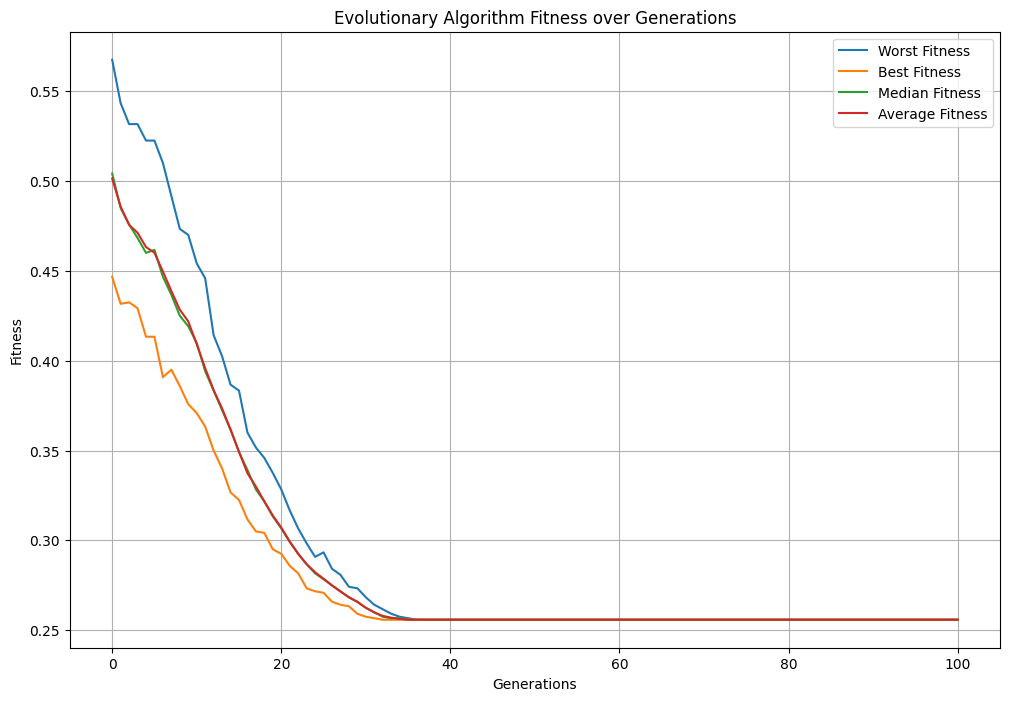

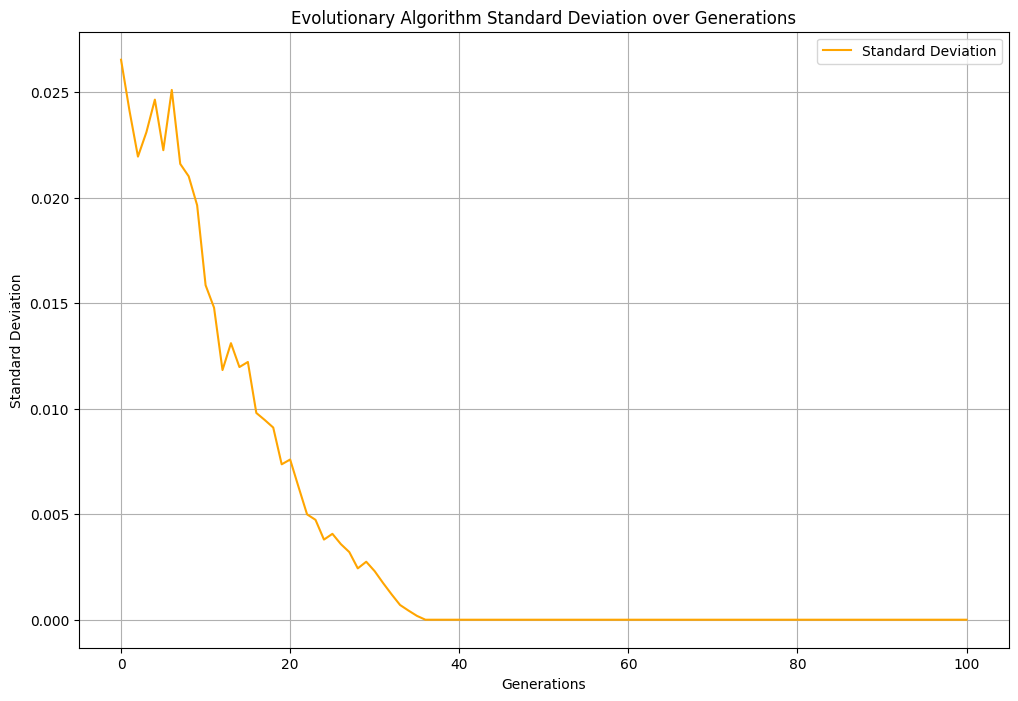

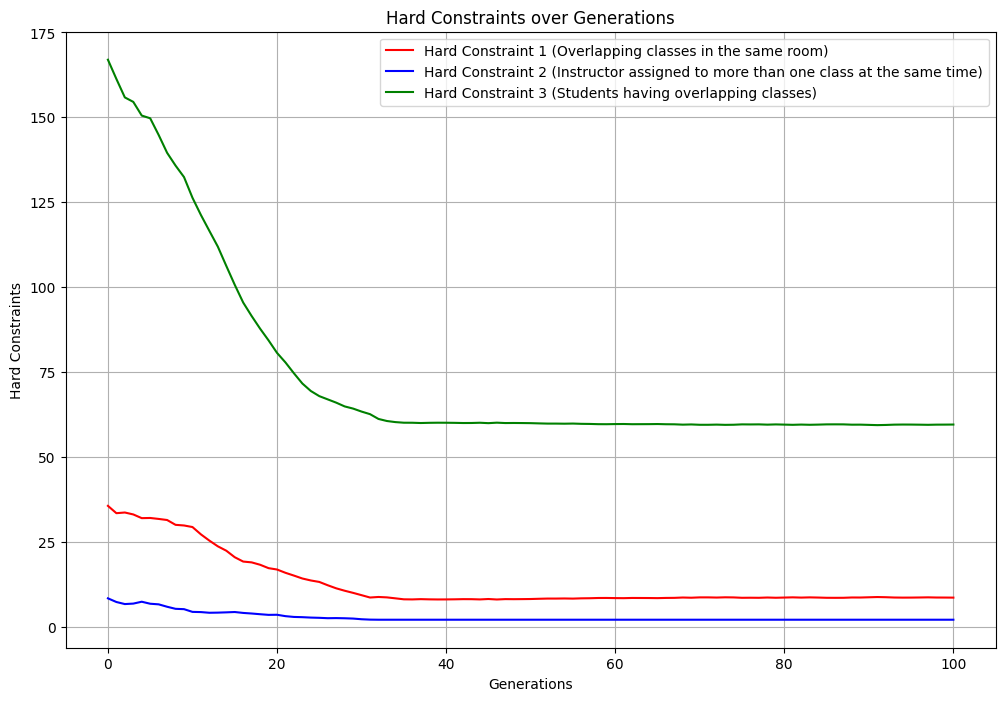

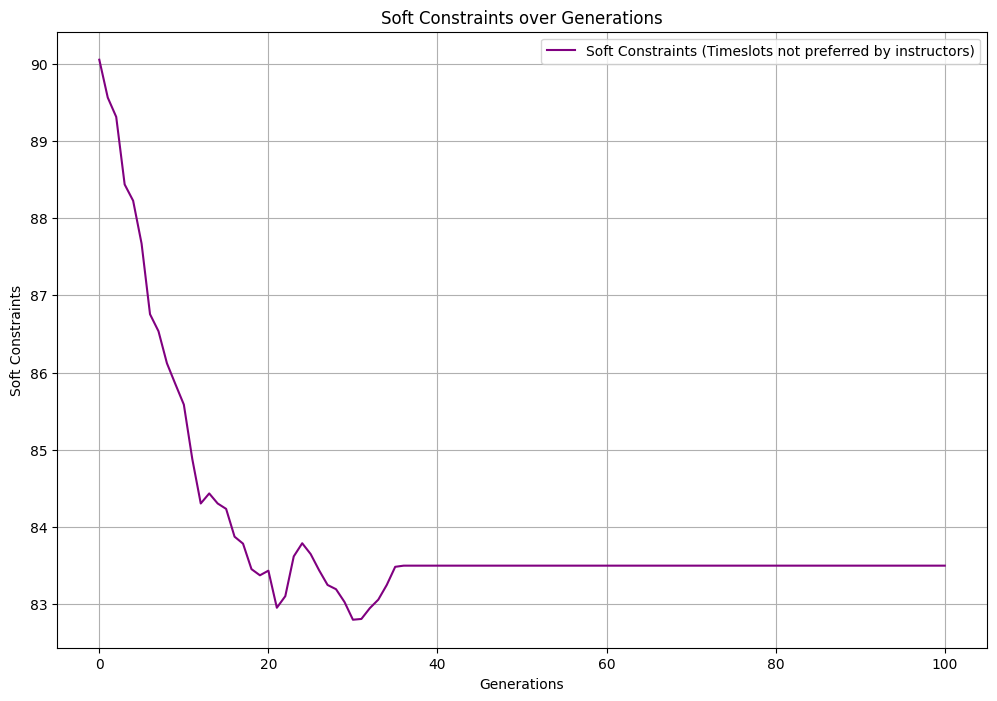

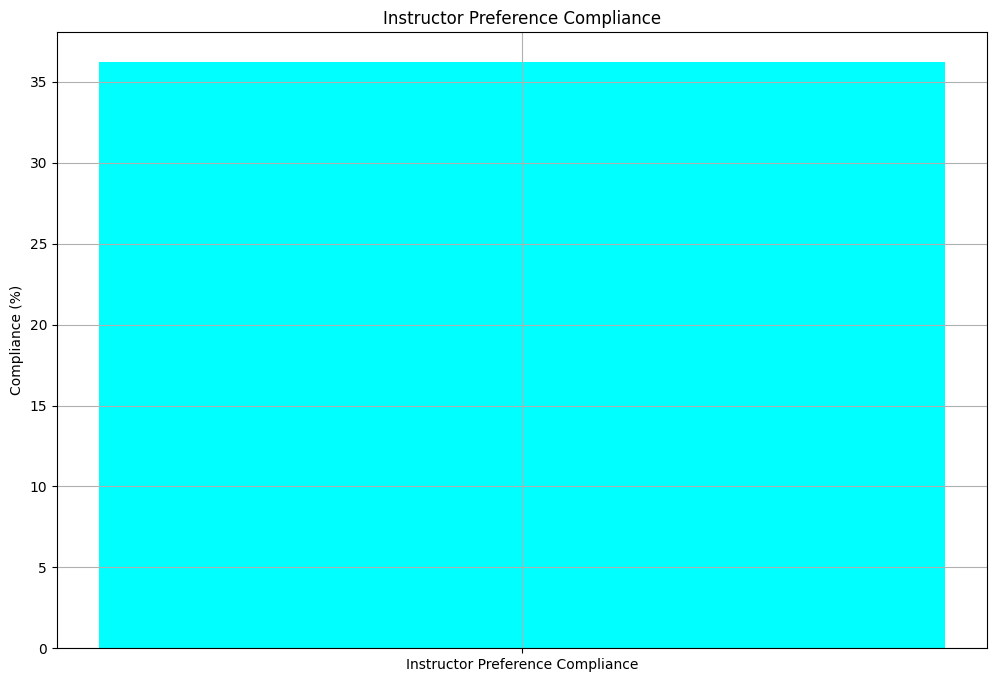

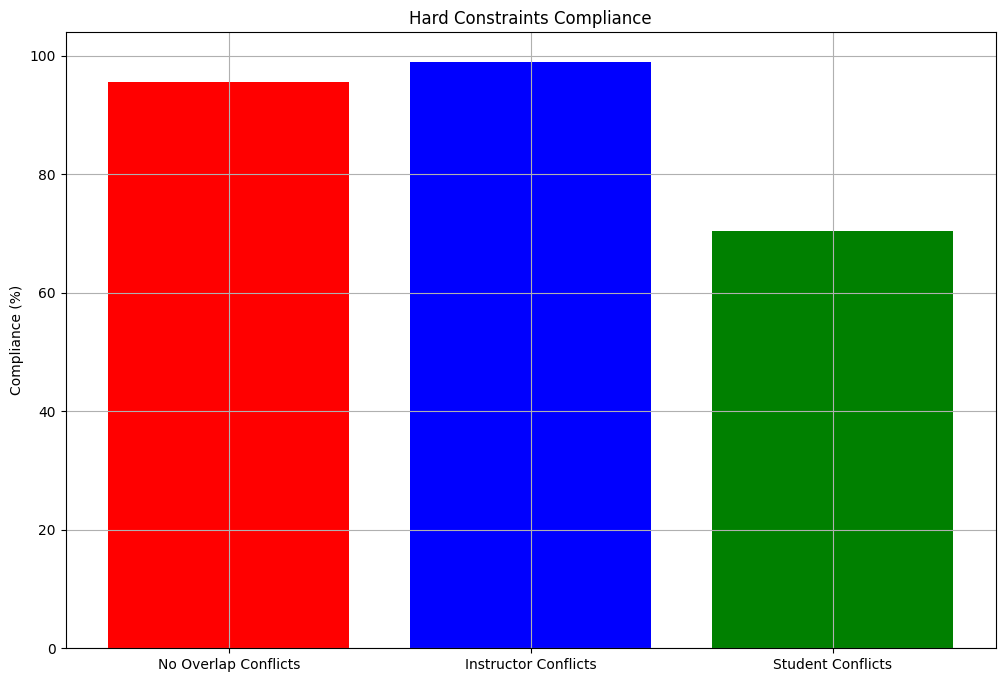

In [ ]:
# @title GA ALGORITHM.


def generate_candidate(random, args):
    candidate = []
    for course in courses:
        room = random.choice(rooms)
        timeslot = random.choice(timeslots)
        instructor = course['instructor_id']
        student_list = [s['student_id'] for s in students if course['course_id'] in s['courses']]
        candidate.append((course['course_id'], room['room_id'], timeslot['timeslot_id'], instructor, student_list))
    return candidate

def fitness_function(candidates, args):
    fitness_values = []
    hard_constraints_counts = {'h1': [], 'h2': [], 'h3': []}
    soft_constraints_counts = []

    for candidate in candidates:
        hard_conflicts_1 = 0
        hard_conflicts_2 = 0
        hard_conflicts_3 = 0
        soft_penalty = 0

        # Hard Constraint: No overlapping classes in the same room
        room_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (room_id, timeslot_id) in room_timeslot_dict:
                hard_conflicts_1 += 1
            else:
                room_timeslot_dict[(room_id, timeslot_id)] = course_id

        # Hard Constraint: No instructor assigned to more than one class at the same time
        instructor_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (instructor_id, timeslot_id) in instructor_timeslot_dict:
                hard_conflicts_2 += 1
            else:
                instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id

        # Hard Constraint: Students should not have overlapping classes
        student_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            for student_id in student_list:
                if (student_id, timeslot_id) in student_timeslot_dict:
                    hard_conflicts_3 += 1
                else:
                    student_timeslot_dict[(student_id, timeslot_id)] = course_id

        # Soft Constraint: Prefer timeslots preferred by instructors
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            instructor = next(i for i in instructors if i['instructor_id'] == instructor_id)
            if timeslot_id not in instructor['preferred_timeslots']:
                soft_penalty += 0.5  # Less severe penalty for preference

        # Normalize fitness to be between 0 and 1 (lower is better)
        max_possible_conflicts = len(candidate) * 3  # Maximum conflicts if all courses overlap in all constraints
        hard_conflicts = hard_conflicts_1 + hard_conflicts_2 + hard_conflicts_3
        normalized_fitness = (hard_conflicts + soft_penalty) / max_possible_conflicts
        fitness_values.append(normalized_fitness)

        # Store hard and soft constraint counts
        hard_constraints_counts['h1'].append(hard_conflicts_1)
        hard_constraints_counts['h2'].append(hard_conflicts_2)
        hard_constraints_counts['h3'].append(hard_conflicts_3)
        soft_constraints_counts.append(soft_penalty)

    # Aggregate hard and soft constraints
    global_hard_constraints['h1'].append(sum(hard_constraints_counts['h1']) / len(hard_constraints_counts['h1']))
    global_hard_constraints['h2'].append(sum(hard_constraints_counts['h2']) / len(hard_constraints_counts['h2']))
    global_hard_constraints['h3'].append(sum(hard_constraints_counts['h3']) / len(hard_constraints_counts['h3']))
    global_soft_constraints.append(sum(soft_constraints_counts) / len(soft_constraints_counts))

    return fitness_values

def calculate_instructor_preference_compliance(best_solution):
    total_instructors = len(instructors)
    satisfied_instructors = 0

    for instructor in instructors:
        instructor_id = instructor['instructor_id']
        preferred_timeslots = instructor['preferred_timeslots']
        for course in best_solution.candidate:
            course_id, room_id, timeslot_id, assigned_instructor_id, student_list = course
            if assigned_instructor_id == instructor_id and timeslot_id in preferred_timeslots:
                satisfied_instructors += 1
                break

    return satisfied_instructors / total_instructors * 100

def calculate_hard_constraints_compliance(best_solution):
    total_courses = len(best_solution.candidate)
    no_overlap_conflicts = 0
    instructor_conflicts = 0
    student_conflicts = 0

    # Check for overlapping classes in the same room
    room_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution.candidate:
        if (room_id, timeslot_id) not in room_timeslot_dict:
            room_timeslot_dict[(room_id, timeslot_id)] = course_id
        else:
            no_overlap_conflicts += 1

    # Check for instructors assigned to more than one class at the same time
    instructor_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution.candidate:
        if (instructor_id, timeslot_id) not in instructor_timeslot_dict:
            instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id
        else:
            instructor_conflicts += 1

    # Check for students having overlapping classes
    student_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution.candidate:
        for student_id in student_list:
            if (student_id, timeslot_id) not in student_timeslot_dict:
                student_timeslot_dict[(student_id, timeslot_id)] = course_id
            else:
                student_conflicts += 1

    return {
        'no_overlap_conflicts': (total_courses - no_overlap_conflicts) / total_courses * 100,
        'instructor_conflicts': (total_courses - instructor_conflicts) / total_courses * 100,
        'student_conflicts': (total_courses - student_conflicts) / total_courses * 100
    }

def plot_hard_constraints(generations, h1_values, h2_values, h3_values):
    plt.figure(figsize=(12, 8))
    plt.plot(generations, h1_values, label='Hard Constraint 1 (Overlapping classes in the same room)', color='red')
    plt.plot(generations, h2_values, label='Hard Constraint 2 (Instructor assigned to more than one class at the same time)', color='blue')
    plt.plot(generations, h3_values, label='Hard Constraint 3 (Students having overlapping classes)', color='green')
    plt.xlabel('Generations')
    plt.ylabel('Hard Constraints')
    plt.title('Hard Constraints over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    random.seed(42)
    stats = {
        'worst': [],
        'best': [],
        'median': [],
        'average': [],
        'std_dev': []
    }

    global global_hard_constraints, global_soft_constraints
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []

    # Set up the evolutionary algorithm
    ea = inspyred.ec.GA(random)
    ea.selector = ec.selectors.tournament_selection
    ea.variator = [ec.variators.uniform_crossover, ec.variators.bit_flip_mutation]
    ea.replacer = ec.replacers.generational_replacement

    # Configuring the terminator
    ea.terminator = [ec.terminators.generation_termination, ec.terminators.no_improvement_termination]

    # Custom observer to collect stats
    def observer(population, num_generations, num_evaluations, args):
        fitness_values = [ind.fitness for ind in population]
        stats['worst'].append(max(fitness_values))
        stats['best'].append(min(fitness_values))
        stats['median'].append(sorted(fitness_values)[len(fitness_values) // 2])
        stats['average'].append(sum(fitness_values) / len(fitness_values))
        std_dev = (sum((x - stats['average'][-1])**2 for x in fitness_values) / len(fitness_values))**0.5
        if std_dev < 1e-4:
            std_dev = 0
        stats['std_dev'].append(round(std_dev, 6))  # Redondear a 6 cifras significativas

    ea.observer = [ec.observers.stats_observer, observer]

    final_pop = ea.evolve(
        generator=generate_candidate,
        evaluator=fitness_function,
        pop_size=100,
        maximize=False,  # Lower fitness is better
        bounder=None,
        max_generations=100,  # Parameter to control the number of generations
        tournament_size=5,  # Adjusted tournament size
        mutation_rate=0.1,  # Set mutation rate
        crossover_rate=0.9  # Set crossover rate
    )

    best_solution = min(final_pop, key=lambda ind: ind.fitness)
    print('Best Solution:')
    for course in best_solution.candidate:
        print(course)
    print('Best Fitness:', best_solution.fitness)

    # Print schedule for each room
    room_schedule = {}
    for course in best_solution.candidate:
        course_id, room_id, timeslot_id, instructor_id, student_list = course
        if room_id not in room_schedule:
            room_schedule[room_id] = []
        room_schedule[room_id].append(course)

    print('\nRoom Schedules:')
    for room_id in sorted(room_schedule.keys()):
        print(f'\nRoom {room_id}:')
        for course in room_schedule[room_id]:
            course_id, room_id, timeslot_id, instructor_id, student_list = course
            print(f'  Course {course_id} in Timeslot {timeslot_id} by Instructor {instructor_id}')

    # Calculate and print instructor preference compliance
    instructor_preference_compliance = calculate_instructor_preference_compliance(best_solution)
    print(f'\nInstructor Preference Compliance: {instructor_preference_compliance:.2f}%')

    # Calculate and print hard constraints compliance
    hard_constraints_compliance = calculate_hard_constraints_compliance(best_solution)
    print(f"Compliance with no overlap conflicts: {hard_constraints_compliance['no_overlap_conflicts']:.2f}%")
    print(f"Compliance with instructor conflicts: {hard_constraints_compliance['instructor_conflicts']:.2f}%")
    print(f"Compliance with student conflicts: {hard_constraints_compliance['student_conflicts']:.2f}%")

    # Ensure stats lists are the same length as the number of generations
    max_generations = len(stats['worst'])
    stats['worst'] = stats['worst'][:max_generations]
    stats['best'] = stats['best'][:max_generations]
    stats['median'] = stats['median'][:max_generations]
    stats['average'] = stats['average'][:max_generations]
    stats['std_dev'] = stats['std_dev'][:max_generations]

    # Print the values of hard constraints for debugging
    print("Debug - Global Hard Constraints:")
    print("H1 (Overlapping classes in the same room):", global_hard_constraints['h1'])
    print("H2 (Instructor assigned to more than one class at the same time):", global_hard_constraints['h2'])
    print("H3 (Students having overlapping classes):", global_hard_constraints['h3'])

    # Plotting the fitness stats
    generations = list(range(len(stats['worst'])))
    plt.figure(figsize=(12, 8))
    plt.plot(generations, stats['worst'], label='Worst Fitness')
    plt.plot(generations, stats['best'], label='Best Fitness')
    plt.plot(generations, stats['median'], label='Median Fitness')
    plt.plot(generations, stats['average'], label='Average Fitness')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.title('Evolutionary Algorithm Fitness over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting the standard deviation
    plt.figure(figsize=(12, 8))
    plt.plot(generations, stats['std_dev'], label='Standard Deviation', color='orange')
    plt.xlabel('Generations')
    plt.ylabel('Standard Deviation')
    plt.title('Evolutionary Algorithm Standard Deviation over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting hard constraints
    plot_hard_constraints(generations, global_hard_constraints['h1'], global_hard_constraints['h2'], global_hard_constraints['h3'])

    # Plotting soft constraints
    plt.figure(figsize=(12, 8))
    plt.plot(generations, global_soft_constraints, label='Soft Constraints (Timeslots not preferred by instructors)', color='purple')
    plt.xlabel('Generations')
    plt.ylabel('Soft Constraints')
    plt.title('Soft Constraints over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting instructor preference compliance
    plt.figure(figsize=(12, 8))
    plt.bar(['Instructor Preference Compliance'], [instructor_preference_compliance], color='cyan')
    plt.ylabel('Compliance (%)')
    plt.title('Instructor Preference Compliance')
    plt.grid(True)
    plt.show()

    # Plotting hard constraints compliance
    plt.figure(figsize=(12, 8))
    plt.bar(['No Overlap Conflicts', 'Instructor Conflicts', 'Student Conflicts'],
            [hard_constraints_compliance['no_overlap_conflicts'],
             hard_constraints_compliance['instructor_conflicts'],
             hard_constraints_compliance['student_conflicts']],
            color=['red', 'blue', 'green'])
    plt.ylabel('Compliance (%)')
    plt.title('Hard Constraints Compliance')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []
    main()


It is recommended that the cell below is not executed since it will take a lot of time to get the optimization and instead use the results from the githud repository csv to ensure replicability. Set the path accordingly... 'optuna_study_results.csv' look for the files in the GA folder

In [ ]:
# @title GA HIPERPARAMETERS OPTIMIZATION WITH OPTUNA BAYESIAN OPTIMIZATION.


def generate_candidate(random, args):
    candidate = []
    for course in courses:
        room = random.choice(rooms)
        timeslot = random.choice(timeslots)
        instructor = course['instructor_id']
        student_list = [s['student_id'] for s in students if course['course_id'] in s['courses']]
        candidate.append((course['course_id'], room['room_id'], timeslot['timeslot_id'], instructor, student_list))
    return candidate

def fitness_function(candidates, args):
    fitness_values = []
    hard_constraints_counts = {'h1': [], 'h2': [], 'h3': []}
    soft_constraints_counts = []

    for candidate in candidates:
        hard_conflicts_1 = 0
        hard_conflicts_2 = 0
        hard_conflicts_3 = 0
        soft_penalty = 0

        # Hard Constraint: No overlapping classes in the same room
        room_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (room_id, timeslot_id) in room_timeslot_dict:
                hard_conflicts_1 += 1
            else:
                room_timeslot_dict[(room_id, timeslot_id)] = course_id

        # Hard Constraint: No instructor assigned to more than one class at the same time
        instructor_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (instructor_id, timeslot_id) in instructor_timeslot_dict:
                hard_conflicts_2 += 1
            else:
                instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id

        # Hard Constraint: Students should not have overlapping classes
        student_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            for student_id in student_list:
                if (student_id, timeslot_id) in student_timeslot_dict:
                    hard_conflicts_3 += 1
                else:
                    student_timeslot_dict[(student_id, timeslot_id)] = course_id

        # Soft Constraint: Prefer timeslots preferred by instructors
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            instructor = next(i for i in instructors if i['instructor_id'] == instructor_id)
            if timeslot_id not in instructor['preferred_timeslots']:
                soft_penalty += 0.5  # Less severe penalty for preference

        # Normalize fitness to be between 0 and 1 (lower is better)
        max_possible_conflicts = len(candidate) * 3  # Maximum conflicts if all courses overlap in all constraints
        hard_conflicts = hard_conflicts_1 + hard_conflicts_2 + hard_conflicts_3
        normalized_fitness = (hard_conflicts + soft_penalty) / max_possible_conflicts
        fitness_values.append(normalized_fitness)

        # Store hard and soft constraint counts
        hard_constraints_counts['h1'].append(hard_conflicts_1)
        hard_constraints_counts['h2'].append(hard_conflicts_2)
        hard_constraints_counts['h3'].append(hard_conflicts_3)
        soft_constraints_counts.append(soft_penalty)

    # Aggregate hard and soft constraints
    global_hard_constraints['h1'].append(sum(hard_constraints_counts['h1']) / len(hard_constraints_counts['h1']))
    global_hard_constraints['h2'].append(sum(hard_constraints_counts['h2']) / len(hard_constraints_counts['h2']))
    global_hard_constraints['h3'].append(sum(hard_constraints_counts['h3']) / len(hard_constraints_counts['h3']))
    global_soft_constraints.append(sum(soft_constraints_counts) / len(soft_constraints_counts))

    return fitness_values

def objective(trial):
    pop_size = trial.suggest_int('pop_size', 50, 200)
    max_generations = trial.suggest_int('max_generations', 50, 200)
    mutation_rate = trial.suggest_float('mutation_rate', 0.01, 0.5)
    crossover_rate = trial.suggest_float('crossover_rate', 0.5, 1.0)

    random.seed(42)
    ea = inspyred.ec.GA(random.Random())
    ea.selector = ec.selectors.tournament_selection
    ea.variator = [ec.variators.uniform_crossover, ec.variators.bit_flip_mutation]
    ea.replacer = ec.replacers.generational_replacement
    ea.terminator = [ec.terminators.generation_termination, ec.terminators.no_improvement_termination]

    final_pop = ea.evolve(
        generator=generate_candidate,
        evaluator=fitness_function,
        pop_size=pop_size,
        maximize=False,
        bounder=None,
        max_generations=max_generations,
        tournament_size=5,
        mutation_rate=mutation_rate,
        crossover_rate=crossover_rate
    )

    best_solution = min(final_pop, key=lambda ind: ind.fitness)
    return best_solution.fitness

class ProgressCallback:
    def __init__(self, n_trials):
        self.n_trials = n_trials
        self.start_time = time.time()

    def __call__(self, study, trial):
        elapsed_time = time.time() - self.start_time
        trials_left = self.n_trials - trial.number - 1
        estimated_time_left = (elapsed_time / (trial.number + 1)) * trials_left
        print(f'Trial {trial.number + 1}/{self.n_trials}, Elapsed Time: {elapsed_time:.2f}s, Estimated Time Left: {estimated_time_left:.2f}s')

n_trials = 50
progress_callback = ProgressCallback(n_trials)
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=n_trials, callbacks=[progress_callback])

# Print the best hyperparameters
print(f'Best hyperparameters: {study.best_params}')
print(f'Best fitness: {study.best_value}')

# Save study results to a CSV file
df = study.trials_dataframe()
df.to_csv('optuna_study_results.csv', index=False)





[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[I 2024-06-29 16:53:04,519] A new study created in memory with name: no-name-675e9196-b05a-497d-893e-8a15ee4750b8
[I 2024-06-29 16:55:32,006] Trial 0 finished with value: 0.2791666666666667 and parameters: {'pop_size': 106, 'max_generations': 193, 'mutation_rate': 0.3686770314875885, 'crossover_rate': 0.7993292420985183}. Best is trial 0 with value: 0.2791666666666667.


Trial 1/50, Elapsed Time: 147.50s, Estimated Time Left: 7227.30s


[I 2024-06-29 16:56:03,215] Trial 1 finished with value: 0.26166666666666666 and parameters: {'pop_size': 73, 'max_generations': 73, 'mutation_rate': 0.03846096996241773, 'crossover_rate': 0.9330880728874675}. Best is trial 1 with value: 0.26166666666666666.


Trial 2/50, Elapsed Time: 178.70s, Estimated Time Left: 4288.91s


[I 2024-06-29 16:58:14,102] Trial 2 finished with value: 0.21 and parameters: {'pop_size': 140, 'max_generations': 156, 'mutation_rate': 0.020086402204943198, 'crossover_rate': 0.9849549260809971}. Best is trial 2 with value: 0.21.


Trial 3/50, Elapsed Time: 309.59s, Estimated Time Left: 4850.27s


[I 2024-06-29 16:59:42,477] Trial 3 finished with value: 0.25166666666666665 and parameters: {'pop_size': 175, 'max_generations': 82, 'mutation_rate': 0.0990942339314793, 'crossover_rate': 0.5917022549267169}. Best is trial 2 with value: 0.21.


Trial 4/50, Elapsed Time: 397.97s, Estimated Time Left: 4576.61s


[I 2024-06-29 17:01:01,201] Trial 4 finished with value: 0.3025 and parameters: {'pop_size': 95, 'max_generations': 129, 'mutation_rate': 0.22165305913463673, 'crossover_rate': 0.645614570099021}. Best is trial 2 with value: 0.21.


Trial 5/50, Elapsed Time: 476.69s, Estimated Time Left: 4290.22s


[I 2024-06-29 17:02:01,636] Trial 5 finished with value: 0.30416666666666664 and parameters: {'pop_size': 142, 'max_generations': 71, 'mutation_rate': 0.1531508777822569, 'crossover_rate': 0.6831809216468459}. Best is trial 2 with value: 0.21.


Trial 6/50, Elapsed Time: 537.13s, Estimated Time Left: 3938.93s


[I 2024-06-29 17:03:56,023] Trial 6 finished with value: 0.2841666666666667 and parameters: {'pop_size': 118, 'max_generations': 168, 'mutation_rate': 0.10784015325759626, 'crossover_rate': 0.7571172192068059}. Best is trial 2 with value: 0.21.


Trial 7/50, Elapsed Time: 651.51s, Estimated Time Left: 4002.15s


[I 2024-06-29 17:04:49,029] Trial 7 finished with value: 0.27166666666666667 and parameters: {'pop_size': 139, 'max_generations': 57, 'mutation_rate': 0.3076969774317048, 'crossover_rate': 0.5852620618436457}. Best is trial 2 with value: 0.21.


Trial 8/50, Elapsed Time: 704.52s, Estimated Time Left: 3698.72s


[I 2024-06-29 17:05:53,680] Trial 8 finished with value: 0.31666666666666665 and parameters: {'pop_size': 59, 'max_generations': 193, 'mutation_rate': 0.4831596962065341, 'crossover_rate': 0.9041986740582306}. Best is trial 2 with value: 0.21.


Trial 9/50, Elapsed Time: 769.17s, Estimated Time Left: 3504.00s


[I 2024-06-29 17:06:34,293] Trial 9 finished with value: 0.30583333333333335 and parameters: {'pop_size': 95, 'max_generations': 64, 'mutation_rate': 0.34527418299095686, 'crossover_rate': 0.7200762468698007}. Best is trial 2 with value: 0.21.


Trial 10/50, Elapsed Time: 809.78s, Estimated Time Left: 3239.13s


[I 2024-06-29 17:09:29,281] Trial 10 finished with value: 0.175 and parameters: {'pop_size': 194, 'max_generations': 134, 'mutation_rate': 0.01369818646498372, 'crossover_rate': 0.9775458067418015}. Best is trial 10 with value: 0.175.


Trial 11/50, Elapsed Time: 984.77s, Estimated Time Left: 3491.46s


[I 2024-06-29 17:12:09,517] Trial 11 finished with value: 0.17833333333333334 and parameters: {'pop_size': 195, 'max_generations': 137, 'mutation_rate': 0.01723347562967334, 'crossover_rate': 0.9933080661316598}. Best is trial 10 with value: 0.175.


Trial 12/50, Elapsed Time: 1145.01s, Estimated Time Left: 3625.85s


[I 2024-06-29 17:14:19,808] Trial 12 finished with value: 0.22083333333333333 and parameters: {'pop_size': 196, 'max_generations': 115, 'mutation_rate': 0.2004902577865462, 'crossover_rate': 0.8488955341397639}. Best is trial 10 with value: 0.175.


Trial 13/50, Elapsed Time: 1275.30s, Estimated Time Left: 3629.69s


[I 2024-06-29 17:16:41,460] Trial 13 finished with value: 0.17333333333333334 and parameters: {'pop_size': 196, 'max_generations': 122, 'mutation_rate': 0.025167150341825872, 'crossover_rate': 0.9847131373438699}. Best is trial 13 with value: 0.17333333333333334.


Trial 14/50, Elapsed Time: 1416.95s, Estimated Time Left: 3643.59s


[I 2024-06-29 17:18:27,844] Trial 14 finished with value: 0.2575 and parameters: {'pop_size': 174, 'max_generations': 103, 'mutation_rate': 0.09675824485577729, 'crossover_rate': 0.8780863884590011}. Best is trial 13 with value: 0.17333333333333334.


Trial 15/50, Elapsed Time: 1523.34s, Estimated Time Left: 3554.45s


[I 2024-06-29 17:20:10,165] Trial 15 finished with value: 0.20666666666666667 and parameters: {'pop_size': 169, 'max_generations': 98, 'mutation_rate': 0.13611740342205592, 'crossover_rate': 0.9477419509093674}. Best is trial 13 with value: 0.17333333333333334.


Trial 16/50, Elapsed Time: 1625.65s, Estimated Time Left: 3454.52s


[I 2024-06-29 17:22:30,292] Trial 16 finished with value: 0.25583333333333336 and parameters: {'pop_size': 155, 'max_generations': 149, 'mutation_rate': 0.06259390683225328, 'crossover_rate': 0.8264648750204893}. Best is trial 13 with value: 0.17333333333333334.


Trial 17/50, Elapsed Time: 1765.78s, Estimated Time Left: 3427.69s


[I 2024-06-29 17:24:44,792] Trial 17 finished with value: 0.18916666666666668 and parameters: {'pop_size': 199, 'max_generations': 115, 'mutation_rate': 0.1682372394457161, 'crossover_rate': 0.9314071361143548}. Best is trial 13 with value: 0.17333333333333334.


Trial 18/50, Elapsed Time: 1900.28s, Estimated Time Left: 3378.28s


[I 2024-06-29 17:27:18,356] Trial 18 finished with value: 0.1775 and parameters: {'pop_size': 181, 'max_generations': 144, 'mutation_rate': 0.2535718428693177, 'crossover_rate': 0.9994280965387005}. Best is trial 13 with value: 0.17333333333333334.


Trial 19/50, Elapsed Time: 2053.85s, Estimated Time Left: 3351.01s


[I 2024-06-29 17:29:50,087] Trial 19 finished with value: 0.29333333333333333 and parameters: {'pop_size': 160, 'max_generations': 165, 'mutation_rate': 0.4576652671108272, 'crossover_rate': 0.7764209924043369}. Best is trial 13 with value: 0.17333333333333334.


Trial 20/50, Elapsed Time: 2205.58s, Estimated Time Left: 3308.36s


[I 2024-06-29 17:31:37,881] Trial 20 finished with value: 0.225 and parameters: {'pop_size': 182, 'max_generations': 93, 'mutation_rate': 0.08622437350380471, 'crossover_rate': 0.8705300875955625}. Best is trial 13 with value: 0.17333333333333334.


Trial 21/50, Elapsed Time: 2313.37s, Estimated Time Left: 3194.65s


[I 2024-06-29 17:34:06,561] Trial 21 finished with value: 0.3016666666666667 and parameters: {'pop_size': 185, 'max_generations': 141, 'mutation_rate': 0.26317620852704104, 'crossover_rate': 0.5138903266349962}. Best is trial 13 with value: 0.17333333333333334.


Trial 22/50, Elapsed Time: 2462.05s, Estimated Time Left: 3133.52s


[I 2024-06-29 17:36:16,249] Trial 22 finished with value: 0.18333333333333332 and parameters: {'pop_size': 187, 'max_generations': 120, 'mutation_rate': 0.4219127352613727, 'crossover_rate': 0.9920819566183433}. Best is trial 13 with value: 0.17333333333333334.


Trial 23/50, Elapsed Time: 2591.74s, Estimated Time Left: 3042.48s


[I 2024-06-29 17:38:23,406] Trial 23 finished with value: 0.1875 and parameters: {'pop_size': 164, 'max_generations': 132, 'mutation_rate': 0.28684647433856086, 'crossover_rate': 0.9546918630818175}. Best is trial 13 with value: 0.17333333333333334.


Trial 24/50, Elapsed Time: 2718.90s, Estimated Time Left: 2945.47s


[I 2024-06-29 17:41:42,718] Trial 24 finished with value: 0.18166666666666667 and parameters: {'pop_size': 199, 'max_generations': 176, 'mutation_rate': 0.22505113287024936, 'crossover_rate': 0.8998247946580235}. Best is trial 13 with value: 0.17333333333333334.


Trial 25/50, Elapsed Time: 2918.21s, Estimated Time Left: 2918.21s


[I 2024-06-29 17:43:54,040] Trial 25 finished with value: 0.21166666666666667 and parameters: {'pop_size': 156, 'max_generations': 147, 'mutation_rate': 0.04677290278596722, 'crossover_rate': 0.95840455622649}. Best is trial 13 with value: 0.17333333333333334.


Trial 26/50, Elapsed Time: 3049.53s, Estimated Time Left: 2814.95s


[I 2024-06-29 17:45:46,755] Trial 26 finished with value: 0.21166666666666667 and parameters: {'pop_size': 181, 'max_generations': 106, 'mutation_rate': 0.41380840614503284, 'crossover_rate': 0.9074043391479311}. Best is trial 13 with value: 0.17333333333333334.


Trial 27/50, Elapsed Time: 3162.24s, Estimated Time Left: 2693.76s


[I 2024-06-29 17:47:33,144] Trial 27 finished with value: 0.205 and parameters: {'pop_size': 148, 'max_generations': 125, 'mutation_rate': 0.18390324014040937, 'crossover_rate': 0.9986947933052505}. Best is trial 13 with value: 0.17333333333333334.


Trial 28/50, Elapsed Time: 3268.63s, Estimated Time Left: 2568.21s


[I 2024-06-29 17:49:24,595] Trial 28 finished with value: 0.2683333333333333 and parameters: {'pop_size': 130, 'max_generations': 150, 'mutation_rate': 0.13202118499463472, 'crossover_rate': 0.8318857020092956}. Best is trial 13 with value: 0.17333333333333334.


Trial 29/50, Elapsed Time: 3380.08s, Estimated Time Left: 2447.65s


[I 2024-06-29 17:52:43,397] Trial 29 finished with value: 0.25333333333333335 and parameters: {'pop_size': 190, 'max_generations': 183, 'mutation_rate': 0.36507093399736024, 'crossover_rate': 0.80064409473464}. Best is trial 13 with value: 0.17333333333333334.


Trial 30/50, Elapsed Time: 3578.89s, Estimated Time Left: 2385.92s


[I 2024-06-29 17:55:21,454] Trial 30 finished with value: 0.20083333333333334 and parameters: {'pop_size': 173, 'max_generations': 160, 'mutation_rate': 0.06222945286231255, 'crossover_rate': 0.9689416658665593}. Best is trial 13 with value: 0.17333333333333334.


Trial 31/50, Elapsed Time: 3736.94s, Estimated Time Left: 2290.38s


[I 2024-06-29 17:57:50,816] Trial 31 finished with value: 0.185 and parameters: {'pop_size': 189, 'max_generations': 138, 'mutation_rate': 0.011417814418010683, 'crossover_rate': 0.995934864082943}. Best is trial 13 with value: 0.17333333333333334.


Trial 32/50, Elapsed Time: 3886.31s, Estimated Time Left: 2186.05s


[I 2024-06-29 18:00:28,184] Trial 32 finished with value: 0.18166666666666667 and parameters: {'pop_size': 200, 'max_generations': 137, 'mutation_rate': 0.02970545284186456, 'crossover_rate': 0.936255767749735}. Best is trial 13 with value: 0.17333333333333334.


Trial 33/50, Elapsed Time: 4043.67s, Estimated Time Left: 2083.10s


[I 2024-06-29 18:02:22,169] Trial 33 finished with value: 0.23583333333333334 and parameters: {'pop_size': 178, 'max_generations': 110, 'mutation_rate': 0.062462520896178174, 'crossover_rate': 0.9250740114025219}. Best is trial 13 with value: 0.17333333333333334.


Trial 34/50, Elapsed Time: 4157.66s, Estimated Time Left: 1956.54s


[I 2024-06-29 18:04:40,440] Trial 34 finished with value: 0.19583333333333333 and parameters: {'pop_size': 191, 'max_generations': 126, 'mutation_rate': 0.0157102432649611, 'crossover_rate': 0.9861085034576407}. Best is trial 13 with value: 0.17333333333333334.


Trial 35/50, Elapsed Time: 4295.93s, Estimated Time Left: 1841.11s


[I 2024-06-29 18:06:09,331] Trial 35 finished with value: 0.22083333333333333 and parameters: {'pop_size': 163, 'max_generations': 88, 'mutation_rate': 0.07996604636716197, 'crossover_rate': 0.9676416747700493}. Best is trial 13 with value: 0.17333333333333334.


Trial 36/50, Elapsed Time: 4384.82s, Estimated Time Left: 1705.21s


[I 2024-06-29 18:08:47,027] Trial 36 finished with value: 0.21333333333333335 and parameters: {'pop_size': 193, 'max_generations': 141, 'mutation_rate': 0.04073338224611252, 'crossover_rate': 0.8805991604929908}. Best is trial 13 with value: 0.17333333333333334.


Trial 37/50, Elapsed Time: 4542.52s, Estimated Time Left: 1596.02s


[I 2024-06-29 18:11:05,751] Trial 37 finished with value: 0.18083333333333335 and parameters: {'pop_size': 180, 'max_generations': 121, 'mutation_rate': 0.13142613724194024, 'crossover_rate': 0.922953846262095}. Best is trial 13 with value: 0.17333333333333334.


Trial 38/50, Elapsed Time: 4681.24s, Estimated Time Left: 1478.29s


[I 2024-06-29 18:13:10,428] Trial 38 finished with value: 0.21166666666666667 and parameters: {'pop_size': 112, 'max_generations': 157, 'mutation_rate': 0.11145168934588404, 'crossover_rate': 0.9717681437099783}. Best is trial 13 with value: 0.17333333333333334.


Trial 39/50, Elapsed Time: 4805.92s, Estimated Time Left: 1355.52s


[I 2024-06-29 18:14:32,727] Trial 39 finished with value: 0.29833333333333334 and parameters: {'pop_size': 98, 'max_generations': 136, 'mutation_rate': 0.31497413071874114, 'crossover_rate': 0.6367861393932244}. Best is trial 13 with value: 0.17333333333333334.


Trial 40/50, Elapsed Time: 4888.22s, Estimated Time Left: 1222.05s


[I 2024-06-29 18:16:46,345] Trial 40 finished with value: 0.2991666666666667 and parameters: {'pop_size': 170, 'max_generations': 129, 'mutation_rate': 0.037141176642638926, 'crossover_rate': 0.7072958782974688}. Best is trial 13 with value: 0.17333333333333334.


Trial 41/50, Elapsed Time: 5021.83s, Estimated Time Left: 1102.35s


[I 2024-06-29 18:17:46,648] Trial 41 finished with value: 0.2683333333333333 and parameters: {'pop_size': 82, 'max_generations': 120, 'mutation_rate': 0.23649896837951687, 'crossover_rate': 0.9201785504472138}. Best is trial 13 with value: 0.17333333333333334.


Trial 42/50, Elapsed Time: 5082.14s, Estimated Time Left: 968.03s


[I 2024-06-29 18:20:24,094] Trial 42 finished with value: 0.20666666666666667 and parameters: {'pop_size': 177, 'max_generations': 145, 'mutation_rate': 0.11756730886940278, 'crossover_rate': 0.9436617154394085}. Best is trial 13 with value: 0.17333333333333334.


Trial 43/50, Elapsed Time: 5239.58s, Estimated Time Left: 852.96s


[I 2024-06-29 18:22:40,031] Trial 43 finished with value: 0.18416666666666667 and parameters: {'pop_size': 184, 'max_generations': 121, 'mutation_rate': 0.14893385468973686, 'crossover_rate': 0.9998312946381512}. Best is trial 13 with value: 0.17333333333333334.


Trial 44/50, Elapsed Time: 5375.52s, Estimated Time Left: 733.03s


[I 2024-06-29 18:23:13,737] Trial 44 finished with value: 0.2775 and parameters: {'pop_size': 51, 'max_generations': 111, 'mutation_rate': 0.0707358152549811, 'crossover_rate': 0.97319558353608}. Best is trial 13 with value: 0.17333333333333334.


Trial 45/50, Elapsed Time: 5409.23s, Estimated Time Left: 601.03s


[I 2024-06-29 18:25:48,153] Trial 45 finished with value: 0.23166666666666666 and parameters: {'pop_size': 194, 'max_generations': 132, 'mutation_rate': 0.19951539523717576, 'crossover_rate': 0.8966936028659661}. Best is trial 13 with value: 0.17333333333333334.


Trial 46/50, Elapsed Time: 5563.64s, Estimated Time Left: 483.80s


[I 2024-06-29 18:28:09,757] Trial 46 finished with value: 0.21583333333333332 and parameters: {'pop_size': 150, 'max_generations': 151, 'mutation_rate': 0.04735093361232835, 'crossover_rate': 0.9565032573663413}. Best is trial 13 with value: 0.17333333333333334.


Trial 47/50, Elapsed Time: 5705.25s, Estimated Time Left: 364.16s


[I 2024-06-29 18:30:15,495] Trial 47 finished with value: 0.21916666666666668 and parameters: {'pop_size': 168, 'max_generations': 98, 'mutation_rate': 0.010888210305591471, 'crossover_rate': 0.8640671881145091}. Best is trial 13 with value: 0.17333333333333334.


Trial 48/50, Elapsed Time: 5830.98s, Estimated Time Left: 242.96s


[I 2024-06-29 18:32:28,616] Trial 48 finished with value: 0.245 and parameters: {'pop_size': 130, 'max_generations': 77, 'mutation_rate': 0.10052016533906628, 'crossover_rate': 0.9268854187060476}. Best is trial 13 with value: 0.17333333333333334.


Trial 49/50, Elapsed Time: 5964.11s, Estimated Time Left: 121.72s


[I 2024-06-29 18:33:50,742] Trial 49 finished with value: 0.18833333333333332 and parameters: {'pop_size': 178, 'max_generations': 51, 'mutation_rate': 0.16561126252442077, 'crossover_rate': 0.9789819667095292}. Best is trial 13 with value: 0.17333333333333334.


Trial 50/50, Elapsed Time: 6046.23s, Estimated Time Left: 0.00s
Best hyperparameters: {'pop_size': 196, 'max_generations': 122, 'mutation_rate': 0.025167150341825872, 'crossover_rate': 0.9847131373438699}
Best fitness: 0.17333333333333334


ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

In [ ]:
!pip install plotly



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Download the csv file optuna_study_results.csv from the githud repository and set the path accordingly to get same results

[I 2024-06-29 19:04:59,030] A new study created in memory with name: no-name-a13ab2b6-dd8d-438a-9c7b-d0ad0b18c216
C:\Users\DELL\AppData\Local\Temp\ipykernel_14928\2365336078.py:33: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  history = optuna.visualization.matplotlib.plot_optimization_history(study)


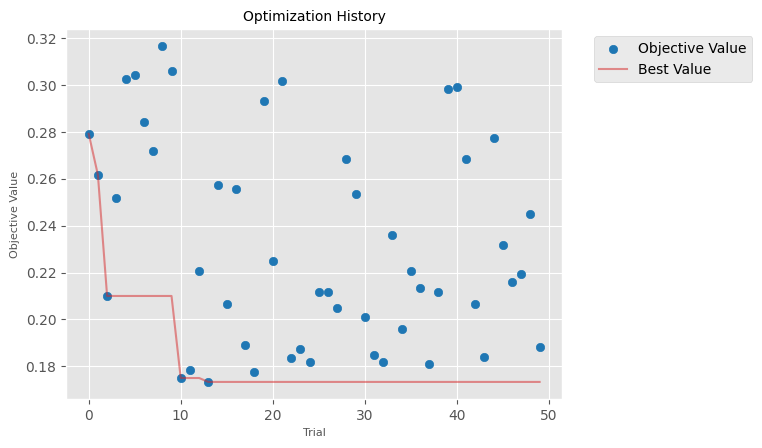

C:\Users\DELL\AppData\Local\Temp\ipykernel_14928\2365336078.py:40: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  param_importances = optuna.visualization.matplotlib.plot_param_importances(study)


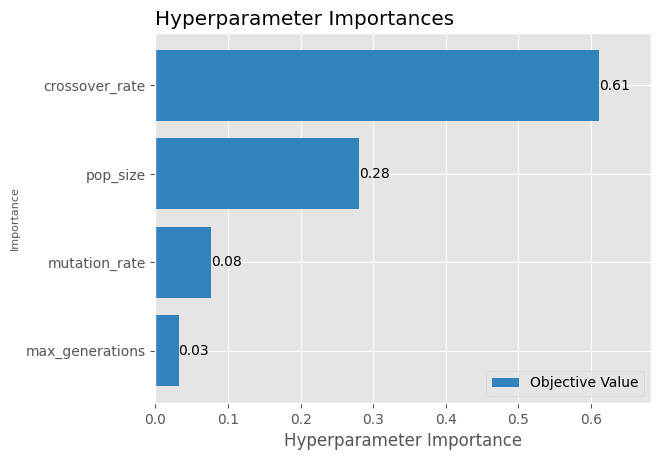

C:\Users\DELL\AppData\Local\Temp\ipykernel_14928\2365336078.py:45: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  parallel_coords = optuna.visualization.matplotlib.plot_parallel_coordinate(study)


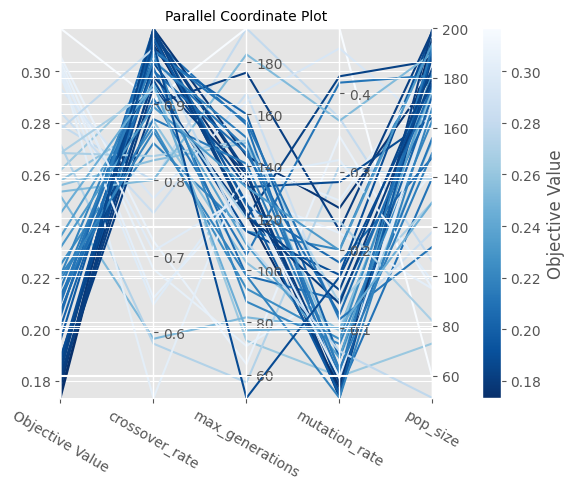

C:\Users\DELL\AppData\Local\Temp\ipykernel_14928\2365336078.py:50: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  contours = optuna.visualization.matplotlib.plot_contour(study)
[W 2024-06-29 19:05:05,802] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


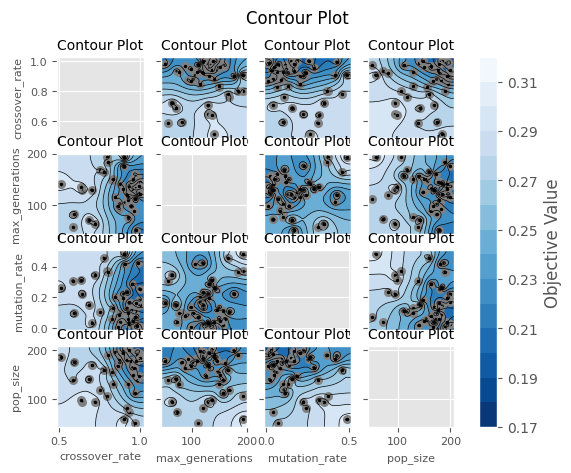

In [ ]:
# @title PLOTTING GA HYPERPARAMETERS OPTIMIZATION RESULTS.

# Load the CSV file
df = pd.read_csv('C:\\Users\\DELL\\Downloads\\optuna_study_results.csv')

# Recreate the study from the dataframe
study = optuna.create_study(direction='minimize')
for _, row in df.iterrows():
    trial = optuna.trial.create_trial(
        params={
            'pop_size': row['params_pop_size'],
            'max_generations': row['params_max_generations'],
            'mutation_rate': row['params_mutation_rate'],
            'crossover_rate': row['params_crossover_rate']
        },
        distributions={
            'pop_size': optuna.distributions.IntDistribution(50, 200),
            'max_generations': optuna.distributions.IntDistribution(50, 200),
            'mutation_rate': optuna.distributions.FloatDistribution(0.01, 0.5),
            'crossover_rate': optuna.distributions.FloatDistribution(0.5, 1.0)
        },
        value=row['value'],
        state=optuna.trial.TrialState.COMPLETE,
    )
    study.add_trial(trial)

# Plotting results with Matplotlib

# Plot optimization history
history = optuna.visualization.matplotlib.plot_optimization_history(study)
history.set_title("Optimization History", fontsize=10)
history.set_ylabel("Objective Value", fontsize=8)
history.set_xlabel("Trial", fontsize=8)
plt.show()

# Plot parameter importances
param_importances = optuna.visualization.matplotlib.plot_param_importances(study)
param_importances.set_ylabel("Importance", fontsize=8)
plt.show()

# Plot parallel coordinates
parallel_coords = optuna.visualization.matplotlib.plot_parallel_coordinate(study)
parallel_coords.set_title("Parallel Coordinate Plot", fontsize=10)
plt.show()

# Plot contour
contours = optuna.visualization.matplotlib.plot_contour(study)

# Adjust font size for x and y labels and title
for ax in contours.flatten():
    ax.set_title("Contour Plot", fontsize=10)
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.show()



Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        196     0.5775     0.4475 0.49833333 0.49946428 0.02401186

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        392 0.55333333     0.4275 0.48666666 0.48700680 0.02276514

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        588     0.5325     0.4225 0.48083333 0.48010204 0.02114889

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        784 0.55416666 0.40916666 0.47208333 0.47312074 0.02444039

Generation Evaluation      Worst       Best     Median    Average    Std

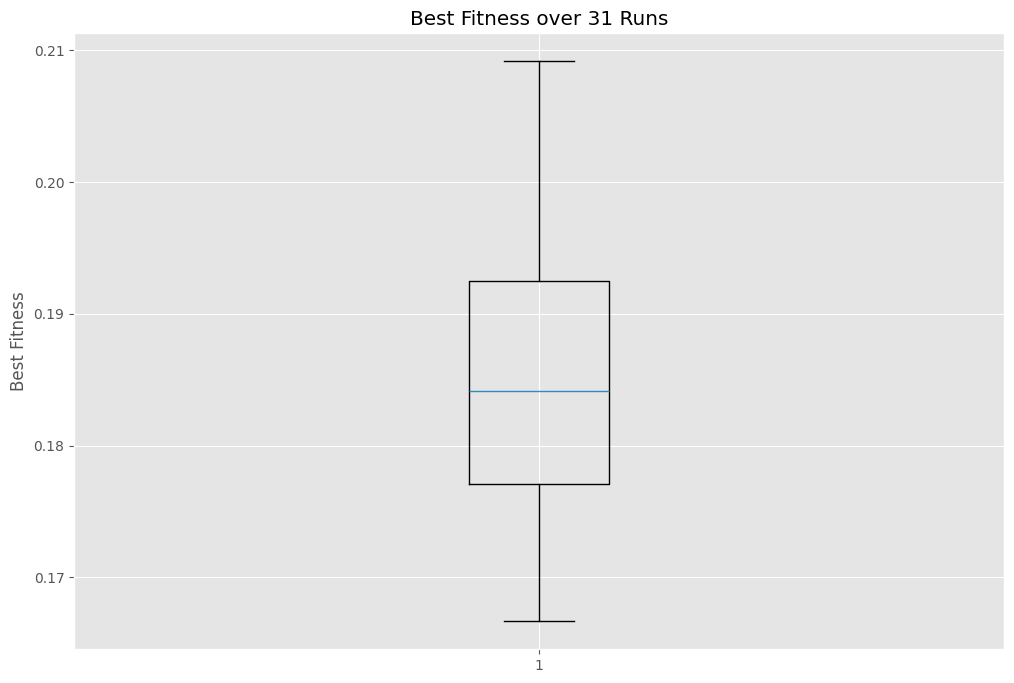

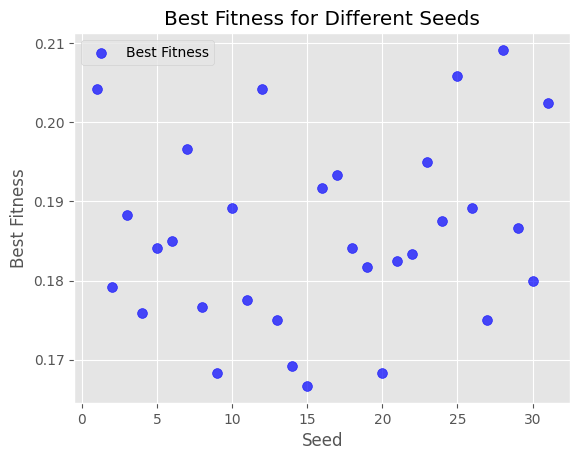

In [ ]:
# @title GENETIC ALGORITHM IMPLEMENTATION FOR 31 SEEDS ITERATION


def generate_candidate(random, args):
    candidate = []
    for course in courses:
        room = random.choice(rooms)
        timeslot = random.choice(timeslots)
        instructor = course['instructor_id']
        student_list = [s['student_id'] for s in students if course['course_id'] in s['courses']]
        candidate.append((course['course_id'], room['room_id'], timeslot['timeslot_id'], instructor, student_list))
    return candidate

def fitness_function(candidates, args):
    fitness_values = []
    hard_constraints_counts = {'h1': [], 'h2': [], 'h3': []}
    soft_constraints_counts = []

    for candidate in candidates:
        hard_conflicts_1 = 0
        hard_conflicts_2 = 0
        hard_conflicts_3 = 0
        soft_penalty = 0

        # Hard Constraint: No overlapping classes in the same room
        room_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (room_id, timeslot_id) in room_timeslot_dict:
                hard_conflicts_1 += 1
            else:
                room_timeslot_dict[(room_id, timeslot_id)] = course_id

        # Hard Constraint: No instructor assigned to more than one class at the same time
        instructor_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (instructor_id, timeslot_id) in instructor_timeslot_dict:
                hard_conflicts_2 += 1
            else:
                instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id

        # Hard Constraint: Students should not have overlapping classes
        student_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            for student_id in student_list:
                if (student_id, timeslot_id) in student_timeslot_dict:
                    hard_conflicts_3 += 1
                else:
                    student_timeslot_dict[(student_id, timeslot_id)] = course_id

        # Soft Constraint: Prefer timeslots preferred by instructors
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            instructor = next(i for i in instructors if i['instructor_id'] == instructor_id)
            if timeslot_id not in instructor['preferred_timeslots']:
                soft_penalty += 0.5  # Less severe penalty for preference

        # Normalize fitness to be between 0 and 1 (lower is better)
        max_possible_conflicts = len(candidate) * 3  # Maximum conflicts if all courses overlap in all constraints
        hard_conflicts = hard_conflicts_1 + hard_conflicts_2 + hard_conflicts_3
        normalized_fitness = (hard_conflicts + soft_penalty) / max_possible_conflicts
        fitness_values.append(normalized_fitness)

        # Store hard and soft constraint counts
        hard_constraints_counts['h1'].append(hard_conflicts_1)
        hard_constraints_counts['h2'].append(hard_conflicts_2)
        hard_constraints_counts['h3'].append(hard_conflicts_3)
        soft_constraints_counts.append(soft_penalty)

    # Aggregate hard and soft constraints
    global_hard_constraints['h1'].append(sum(hard_constraints_counts['h1']) / len(hard_constraints_counts['h1']))
    global_hard_constraints['h2'].append(sum(hard_constraints_counts['h2']) / len(hard_constraints_counts['h2']))
    global_hard_constraints['h3'].append(sum(hard_constraints_counts['h3']) / len(hard_constraints_counts['h3']))
    global_soft_constraints.append(sum(soft_constraints_counts) / len(soft_constraints_counts))

    return fitness_values

def run_ga(seed, pop_size, max_generations, mutation_rate, crossover_rate):
    random.seed(seed)
    stats = {
        'worst': [],
        'best': [],
        'median': [],
        'average': [],
        'std_dev': []
    }

    global global_hard_constraints, global_soft_constraints
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []

    ea = inspyred.ec.GA(random)
    ea.selector = ec.selectors.tournament_selection
    ea.variator = [ec.variators.uniform_crossover, ec.variators.bit_flip_mutation]
    ea.replacer = ec.replacers.generational_replacement
    ea.terminator = [ec.terminators.generation_termination, ec.terminators.no_improvement_termination]

    def observer(population, num_generations, num_evaluations, args):
        fitness_values = [ind.fitness for ind in population]
        stats['worst'].append(max(fitness_values))
        stats['best'].append(min(fitness_values))
        stats['median'].append(sorted(fitness_values)[len(fitness_values) // 2])
        stats['average'].append(sum(fitness_values) / len(fitness_values))
        std_dev = (sum((x - stats['average'][-1])**2 for x in fitness_values) / len(fitness_values))**0.5
        if std_dev < 1e-4:
            std_dev = 0
        stats['std_dev'].append(round(std_dev, 6))

    ea.observer = [ec.observers.stats_observer, observer]

    final_pop = ea.evolve(
        generator=generate_candidate,
        evaluator=fitness_function,
        pop_size=pop_size,
        maximize=False,
        bounder=None,
        max_generations=max_generations,
        tournament_size=5,
        mutation_rate=mutation_rate,
        crossover_rate=crossover_rate
    )

    best_solution = min(final_pop, key=lambda ind: ind.fitness)
    best_fitness = best_solution.fitness
    return best_fitness, stats

# Parameters obtained from hyperparameter tuning
best_params = {
    'pop_size': 196,
    'max_generations': 122,
    'mutation_rate': 0.025167150341825872,
    'crossover_rate': 0.9847131373438699
}

# Run 31 repetitions and save results
results = []
for seed in range(1, 32):
    best_fitness, stats = run_ga(
        seed,
        pop_size=best_params['pop_size'],
        max_generations=best_params['max_generations'],
        mutation_rate=best_params['mutation_rate'],
        crossover_rate=best_params['crossover_rate']
    )
    result = {
        'seed': seed,
        'best_fitness': best_fitness,
        'worst_fitness': stats['worst'][-1],
        'average_fitness': stats['average'][-1],
        'median_fitness': stats['median'][-1],
        'std_dev_fitness': stats['std_dev'][-1]
    }
    results.append(result)
    df = pd.DataFrame(result, index=[0])
    df.to_csv(f'C:\\Users\\DELL\\Downloads\\ga_results_seed_{seed}.csv', index=False)

# Perform Wilcoxon signed-rank test
best_fitness_all = [result['best_fitness'] for result in results]
_, p_value = wilcoxon(best_fitness_all)
print(f'Wilcoxon signed-rank test p-value: {p_value}')

# Visualize the results
plt.figure(figsize=(12, 8))
plt.boxplot(best_fitness_all)
plt.title('Best Fitness over 31 Runs')
plt.ylabel('Best Fitness')
plt.show()

# Scatter plot of fitness values
plt.scatter(range(1, 32), best_fitness_all, label='Best Fitness', marker='o', color='blue', alpha=0.7, s=50)
plt.xlabel('Seed')
plt.ylabel('Best Fitness')
plt.title('Best Fitness for Different Seeds')
plt.legend()
plt.show()



In [ ]:
# Convert CSV with commas to CSV with semicolons
input_file = 'C:\\Users\\DELL\\Downloads\\optuna_study_results.csv'
output_file = 'C:\\Users\\DELL\\Downloads\\optuna_study_results_semicolomseparated.csv'

with open(input_file, 'r', encoding='utf-8') as f_in, open(output_file, 'w', encoding='utf-8') as f_out:
    for line in f_in:
        line = line.split(",")
        line = ";".join(line)
        f_out.write(line)

print(f"File converted and saved as {output_file}")


File converted and saved as C:\Users\DELL\Downloads\optuna_study_results_semicolomseparated.csv


In [ ]:


# Directory where the CSV files are stored
directory = 'C:\\Users\\DELL\\Downloads\\'

# Initialize an empty DataFrame to hold all results
all_results = pd.DataFrame()

# Loop through each CSV file
for seed in range(1, 32):
    file_path = os.path.join(directory, f'ga_results_seed_{seed}.csv')
    if os.path.exists(file_path):
        # Read each CSV file
        df = pd.read_csv(file_path)
        # Add a column for the seed value
        df['seed'] = seed
        # Append to the all_results DataFrame
        all_results = pd.concat([all_results, df], ignore_index=True)

# Save the combined results to a new CSV file with semicolon as the delimiter
output_file = os.path.join(directory, 'ga_results_all_31seeds.csv')
all_results.to_csv(output_file, sep=';', index=False)

print(f"Combined CSV file saved as {output_file}")


Combined CSV file saved as C:\Users\DELL\Downloads\ga_results_all_31seeds.csv


Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        196 0.56333333 0.43083333 0.50083333 0.49787840 0.02593193

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        392 0.53166666 0.43166666 0.48416666 0.48418792 0.02220620

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        588 0.53916666 0.40083333     0.4775 0.47789540 0.02194087

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        784 0.53583333 0.42166666 0.47291666 0.47386479 0.02226932

Generation Evaluation      Worst       Best     Median    Average    Std

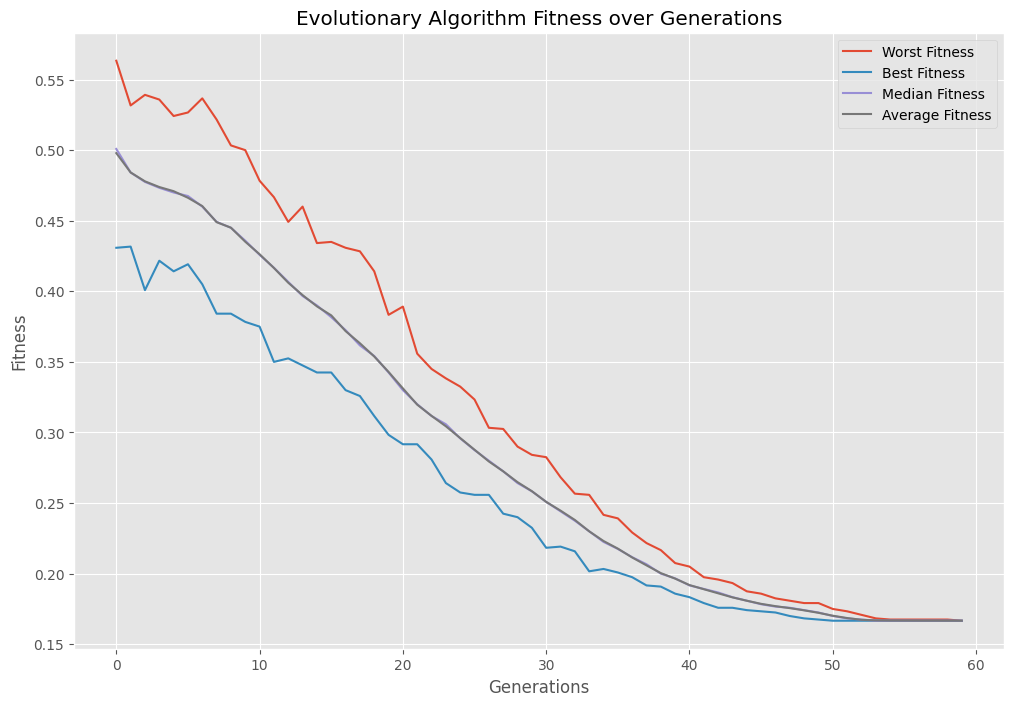

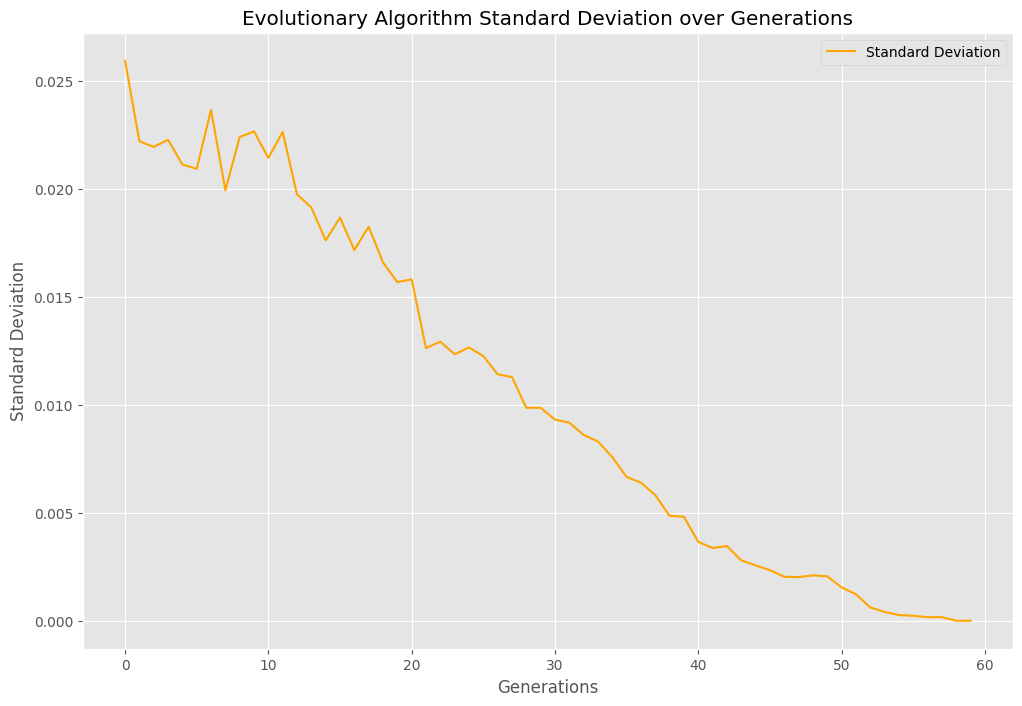

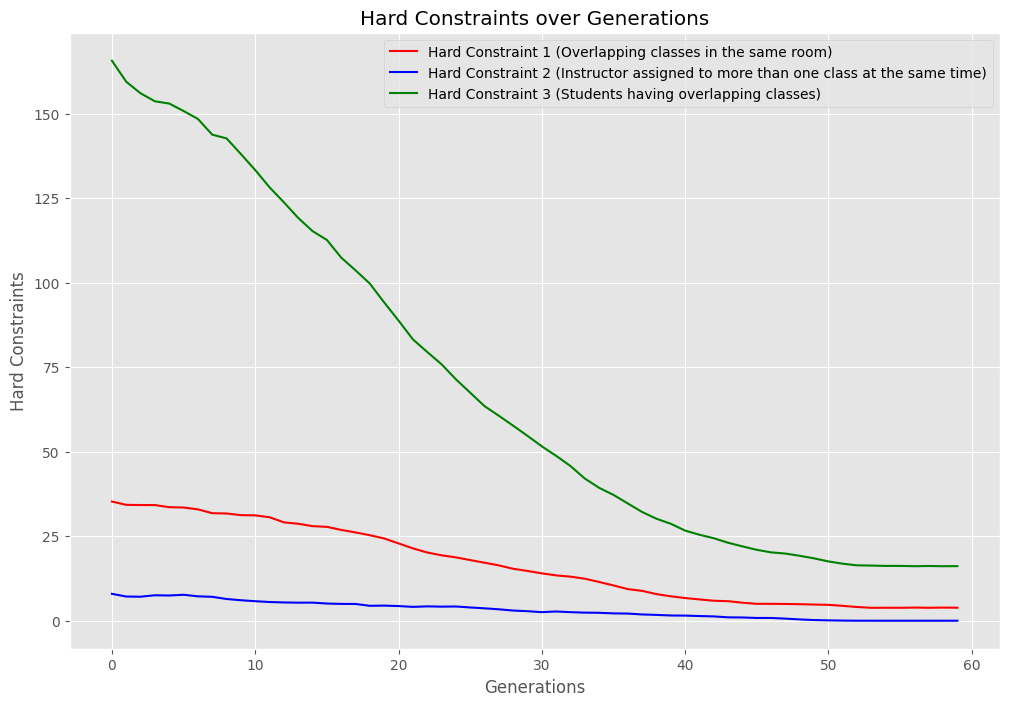

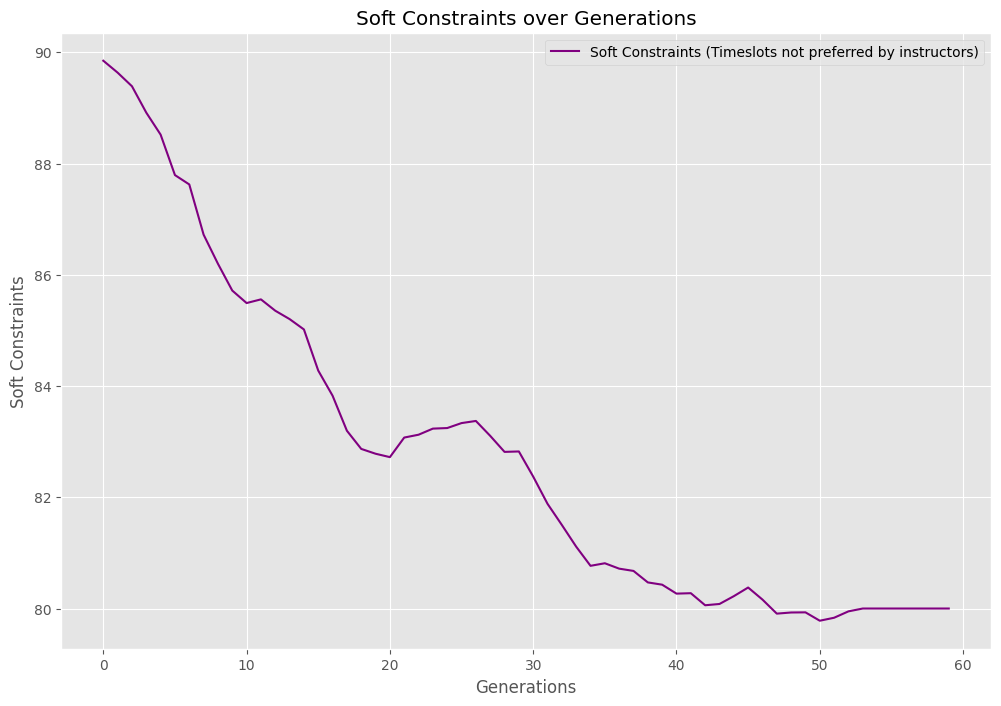

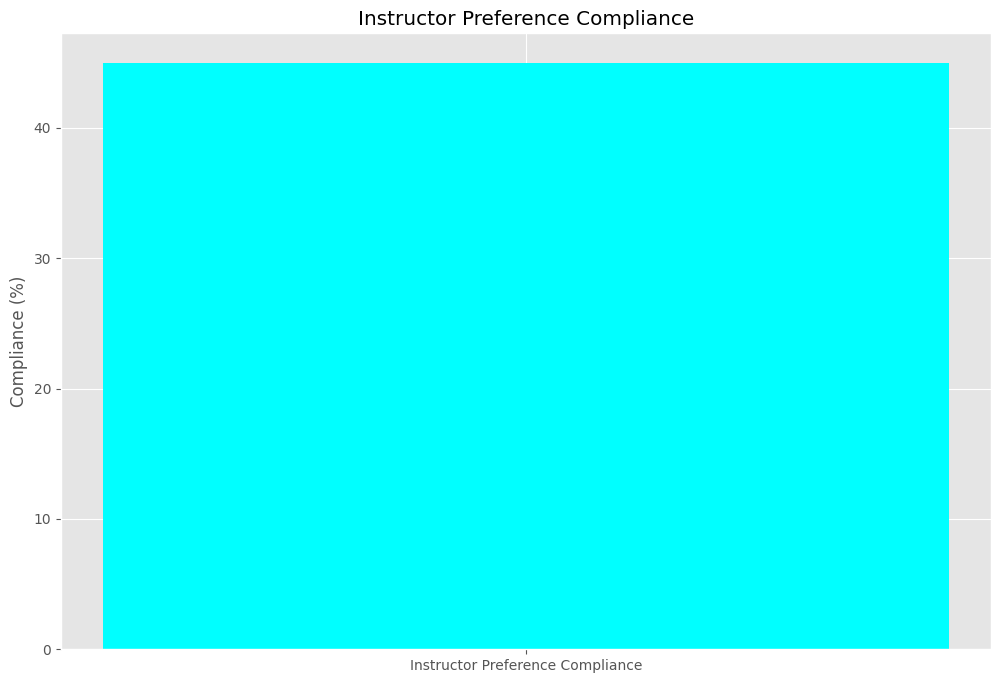

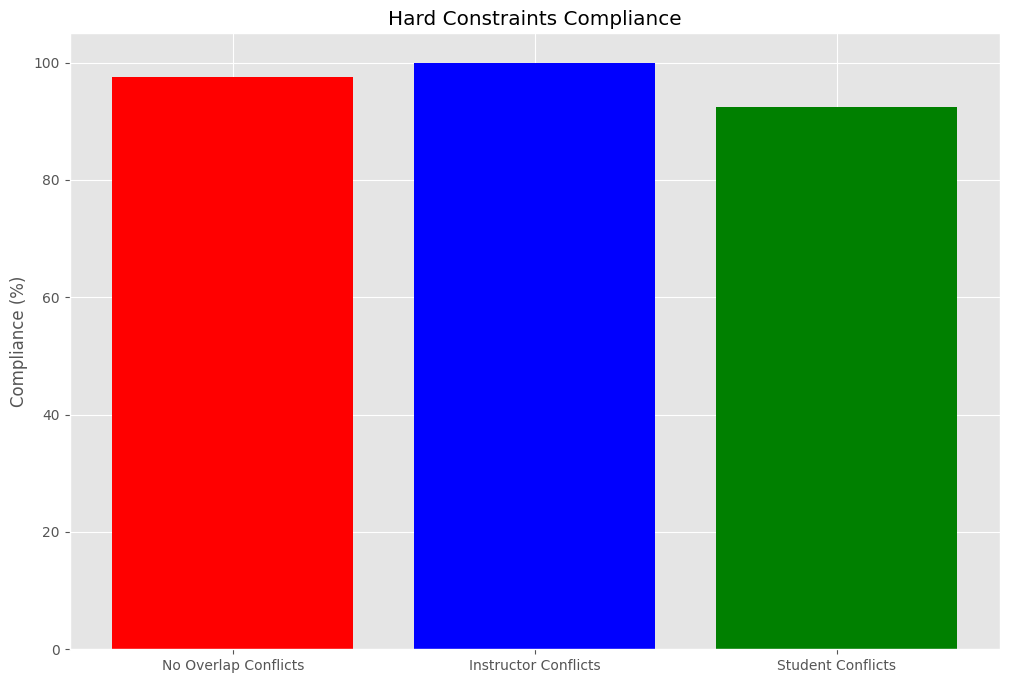

In [ ]:
# @title GA IMPLEMENTATION FOR BEST PERFORMING SEED (15)


def generate_candidate(random, args):
    candidate = []
    for course in courses:
        room = random.choice(rooms)
        timeslot = random.choice(timeslots)
        instructor = course['instructor_id']
        student_list = [s['student_id'] for s in students if course['course_id'] in s['courses']]
        candidate.append((course['course_id'], room['room_id'], timeslot['timeslot_id'], instructor, student_list))
    return candidate

def fitness_function(candidates, args):
    fitness_values = []
    hard_constraints_counts = {'h1': [], 'h2': [], 'h3': []}
    soft_constraints_counts = []

    for candidate in candidates:
        hard_conflicts_1 = 0
        hard_conflicts_2 = 0
        hard_conflicts_3 = 0
        soft_penalty = 0

        # Hard Constraint: No overlapping classes in the same room
        room_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (room_id, timeslot_id) in room_timeslot_dict:
                hard_conflicts_1 += 1
            else:
                room_timeslot_dict[(room_id, timeslot_id)] = course_id

        # Hard Constraint: No instructor assigned to more than one class at the same time
        instructor_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (instructor_id, timeslot_id) in instructor_timeslot_dict:
                hard_conflicts_2 += 1
            else:
                instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id

        # Hard Constraint: Students should not have overlapping classes
        student_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            for student_id in student_list:
                if (student_id, timeslot_id) in student_timeslot_dict:
                    hard_conflicts_3 += 1
                else:
                    student_timeslot_dict[(student_id, timeslot_id)] = course_id

        # Soft Constraint: Prefer timeslots preferred by instructors
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            instructor = next(i for i in instructors if i['instructor_id'] == instructor_id)
            if timeslot_id not in instructor['preferred_timeslots']:
                soft_penalty += 0.5  # Less severe penalty for preference

        # Normalize fitness to be between 0 and 1 (lower is better)
        max_possible_conflicts = len(candidate) * 3  # Maximum conflicts if all courses overlap in all constraints
        hard_conflicts = hard_conflicts_1 + hard_conflicts_2 + hard_conflicts_3
        normalized_fitness = (hard_conflicts + soft_penalty) / max_possible_conflicts
        fitness_values.append(normalized_fitness)

        # Store hard and soft constraint counts
        hard_constraints_counts['h1'].append(hard_conflicts_1)
        hard_constraints_counts['h2'].append(hard_conflicts_2)
        hard_constraints_counts['h3'].append(hard_conflicts_3)
        soft_constraints_counts.append(soft_penalty)

    # Aggregate hard and soft constraints
    global_hard_constraints['h1'].append(sum(hard_constraints_counts['h1']) / len(hard_constraints_counts['h1']))
    global_hard_constraints['h2'].append(sum(hard_constraints_counts['h2']) / len(hard_constraints_counts['h2']))
    global_hard_constraints['h3'].append(sum(hard_constraints_counts['h3']) / len(hard_constraints_counts['h3']))
    global_soft_constraints.append(sum(soft_constraints_counts) / len(soft_constraints_counts))

    return fitness_values

def calculate_instructor_preference_compliance(best_solution):
    total_instructors = len(instructors)
    satisfied_instructors = 0

    for instructor in instructors:
        instructor_id = instructor['instructor_id']
        preferred_timeslots = instructor['preferred_timeslots']
        for course in best_solution.candidate:
            course_id, room_id, timeslot_id, assigned_instructor_id, student_list = course
            if assigned_instructor_id == instructor_id and timeslot_id in preferred_timeslots:
                satisfied_instructors += 1
                break

    return satisfied_instructors / total_instructors * 100

def calculate_hard_constraints_compliance(best_solution):
    total_courses = len(best_solution.candidate)
    no_overlap_conflicts = 0
    instructor_conflicts = 0
    student_conflicts = 0

    # Check for overlapping classes in the same room
    room_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution.candidate:
        if (room_id, timeslot_id) not in room_timeslot_dict:
            room_timeslot_dict[(room_id, timeslot_id)] = course_id
        else:
            no_overlap_conflicts += 1

    # Check for instructors assigned to more than one class at the same time
    instructor_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution.candidate:
        if (instructor_id, timeslot_id) not in instructor_timeslot_dict:
            instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id
        else:
            instructor_conflicts += 1

    # Check for students having overlapping classes
    student_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution.candidate:
        for student_id in student_list:
            if (student_id, timeslot_id) not in student_timeslot_dict:
                student_timeslot_dict[(student_id, timeslot_id)] = course_id
            else:
                student_conflicts += 1

    return {
        'no_overlap_conflicts': (total_courses - no_overlap_conflicts) / total_courses * 100,
        'instructor_conflicts': (total_courses - instructor_conflicts) / total_courses * 100,
        'student_conflicts': (total_courses - student_conflicts) / total_courses * 100
    }

def plot_hard_constraints(generations, h1_values, h2_values, h3_values):
    plt.figure(figsize=(12, 8))
    plt.plot(generations, h1_values, label='Hard Constraint 1 (Overlapping classes in the same room)', color='red')
    plt.plot(generations, h2_values, label='Hard Constraint 2 (Instructor assigned to more than one class at the same time)', color='blue')
    plt.plot(generations, h3_values, label='Hard Constraint 3 (Students having overlapping classes)', color='green')
    plt.xlabel('Generations')
    plt.ylabel('Hard Constraints')
    plt.title('Hard Constraints over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

def my_terminator(population, num_generations, num_evaluations, args):
    tolerance = args.get('tolerance', 0.00001)
    generations = args.get('generations', 10)
    if num_generations < generations:
        return False
    last_fitnesses = [ind.fitness for ind in population]
    best_fitness = min(last_fitnesses)
    if all(abs(best_fitness - ind.fitness) < tolerance for ind in population[-generations:]):
        return True
    return False

def main():
    random.seed(15)  # Usar la semilla 15 para obtener los mejores resultados
    stats = {
        'worst': [],
        'best': [],
        'median': [],
        'average': [],
        'std_dev': []
    }

    global global_hard_constraints, global_soft_constraints
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []

    # Configurar el algoritmo evolutivo
    ea = inspyred.ec.GA(random)
    ea.selector = ec.selectors.tournament_selection
    ea.variator = [ec.variators.uniform_crossover, ec.variators.bit_flip_mutation]
    ea.replacer = ec.replacers.generational_replacement

    # Configurar el terminador
    ea.terminator = [
        ec.terminators.generation_termination,
        my_terminator
    ]

def main():
    random.seed(15)  # Usar la semilla 15 para obtener los mejores resultados
    stats = {
        'worst': [],
        'best': [],
        'median': [],
        'average': [],
        'std_dev': []
    }

    global global_hard_constraints, global_soft_constraints
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []

    # Configurar el algoritmo evolutivo
    ea = inspyred.ec.GA(random)
    ea.selector = ec.selectors.tournament_selection
    ea.variator = [ec.variators.uniform_crossover, ec.variators.bit_flip_mutation]
    ea.replacer = ec.replacers.generational_replacement

    # Configurar el terminador
    ea.terminator = [
        ec.terminators.generation_termination,
        my_terminator
    ]

    # Observador personalizado para recopilar estadísticas
    def observer(population, num_generations, num_evaluations, args):
        fitness_values = [ind.fitness for ind in population]
        stats['worst'].append(max(fitness_values))
        stats['best'].append(min(fitness_values))
        stats['median'].append(sorted(fitness_values)[len(fitness_values) // 2])
        stats['average'].append(sum(fitness_values) / len(fitness_values))
        std_dev = (sum((x - stats['average'][-1])**2 for x in fitness_values) / len(fitness_values))**0.5
        if std_dev < 1e-4:
            std_dev = 0
        stats['std_dev'].append(round(std_dev, 6))  # Redondear a 6 cifras significativas

    ea.observer = [ec.observers.stats_observer, observer]

    final_pop = ea.evolve(
        generator=generate_candidate,
        evaluator=fitness_function,
        pop_size=196,
        maximize=False,  # Lower fitness is better
        bounder=None,
        max_generations=122,  # Parameter to control the number of generations
        tournament_size=5,  # Adjusted tournament size
        mutation_rate=0.025167150341825872,  # Set mutation rate
        crossover_rate=0.9847131373438699,  # Set crossover rate
        generations=10,
        tolerance=0.00001
    )

    best_solution = min(final_pop, key=lambda ind: ind.fitness)
    print('Best Solution:')
    for course in best_solution.candidate:
        print(course)
    print('Best Fitness:', best_solution.fitness)

    # Print schedule for each room
    room_schedule = {}
    for course in best_solution.candidate:
        course_id, room_id, timeslot_id, instructor_id, student_list = course
        if room_id not in room_schedule:
            room_schedule[room_id] = []
        room_schedule[room_id].append(course)

    print('\nRoom Schedules:')
    for room_id in sorted(room_schedule.keys()):
        print(f'\nRoom {room_id}:')
        for course in room_schedule[room_id]:
            course_id, room_id, timeslot_id, instructor_id, student_list = course
            print(f'  Course {course_id} in Timeslot {timeslot_id} by Instructor {instructor_id}')

    # Calculate and print instructor preference compliance
    instructor_preference_compliance = calculate_instructor_preference_compliance(best_solution)
    print(f'\nInstructor Preference Compliance: {instructor_preference_compliance:.2f}%')

    # Calculate and print hard constraints compliance
    hard_constraints_compliance = calculate_hard_constraints_compliance(best_solution)
    print(f"Compliance with no overlap conflicts: {hard_constraints_compliance['no_overlap_conflicts']:.2f}%")
    print(f"Compliance with instructor conflicts: {hard_constraints_compliance['instructor_conflicts']:.2f}%")
    print(f"Compliance with student conflicts: {hard_constraints_compliance['student_conflicts']:.2f}%")

    # Ensure stats lists are the same length as the number of generations
    max_generations = len(stats['worst'])
    stats['worst'] = stats['worst'][:max_generations]
    stats['best'] = stats['best'][:max_generations]
    stats['median'] = stats['median'][:max_generations]
    stats['average'] = stats['average'][:max_generations]
    stats['std_dev'] = stats['std_dev'][:max_generations]

    # Print the values of hard constraints for debugging
    print("Debug - Global Hard Constraints:")
    print("H1 (Overlapping classes in the same room):", global_hard_constraints['h1'])
    print("H2 (Instructor assigned to more than one class at the same time):", global_hard_constraints['h2'])
    print("H3 (Students having overlapping classes):", global_hard_constraints['h3'])

    # Plotting the fitness stats
    generations = list(range(len(stats['worst'])))
    plt.figure(figsize=(12, 8))
    plt.plot(generations, stats['worst'], label='Worst Fitness')
    plt.plot(generations, stats['best'], label='Best Fitness')
    plt.plot(generations, stats['median'], label='Median Fitness')
    plt.plot(generations, stats['average'], label='Average Fitness')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.title('Evolutionary Algorithm Fitness over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting the standard deviation
    plt.figure(figsize=(12, 8))
    plt.plot(generations, stats['std_dev'], label='Standard Deviation', color='orange')
    plt.xlabel('Generations')
    plt.ylabel('Standard Deviation')
    plt.title('Evolutionary Algorithm Standard Deviation over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting hard constraints
    plot_hard_constraints(generations, global_hard_constraints['h1'], global_hard_constraints['h2'], global_hard_constraints['h3'])

    # Plotting soft constraints
    plt.figure(figsize=(12, 8))
    plt.plot(generations, global_soft_constraints, label='Soft Constraints (Timeslots not preferred by instructors)', color='purple')
    plt.xlabel('Generations')
    plt.ylabel('Soft Constraints')
    plt.title('Soft Constraints over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting instructor preference compliance
    plt.figure(figsize=(12, 8))
    plt.bar(['Instructor Preference Compliance'], [instructor_preference_compliance], color='cyan')
    plt.ylabel('Compliance (%)')
    plt.title('Instructor Preference Compliance')
    plt.grid(True)
    plt.show()

    # Plotting hard constraints compliance
    plt.figure(figsize=(12, 8))
    plt.bar(['No Overlap Conflicts', 'Instructor Conflicts', 'Student Conflicts'],
            [hard_constraints_compliance['no_overlap_conflicts'],
             hard_constraints_compliance['instructor_conflicts'],
             hard_constraints_compliance['student_conflicts']],
            color=['red', 'blue', 'green'])
    plt.ylabel('Compliance (%)')
    plt.title('Hard Constraints Compliance')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []
    main()


Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        196 0.56333333 0.43083333 0.50083333 0.49787840 0.02593193

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        392 0.53166666 0.43166666 0.48416666 0.48418792 0.02220620

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        588 0.53916666 0.40083333     0.4775 0.47789540 0.02194087

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        784 0.53583333 0.42166666 0.47291666 0.47386479 0.02226932

Generation Evaluation      Worst       Best     Median    Average    Std

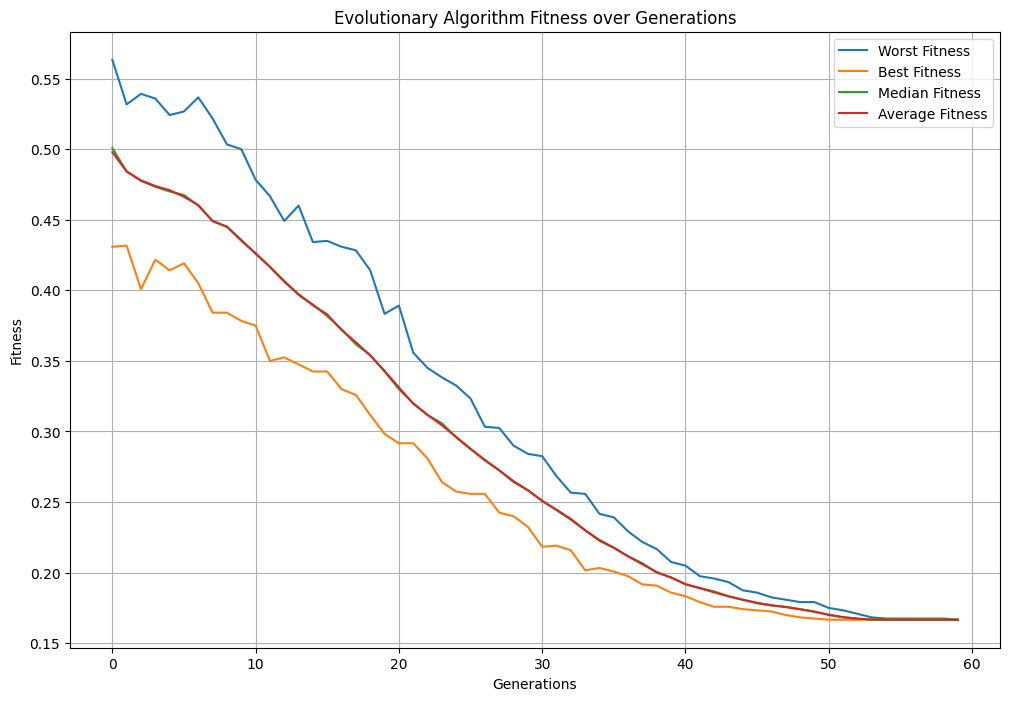

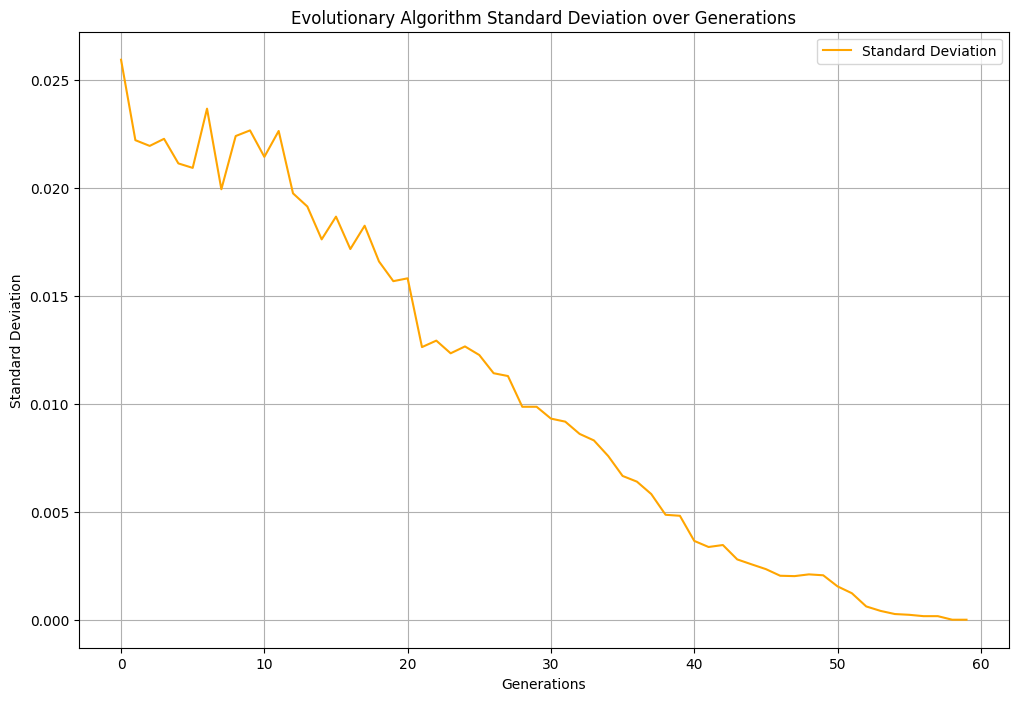

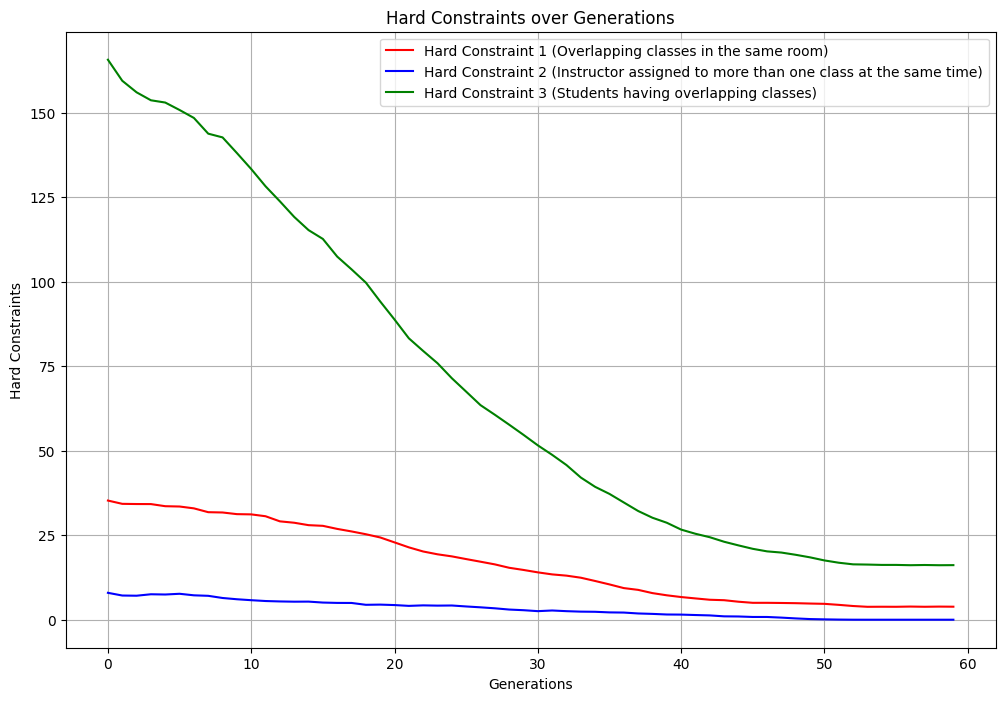

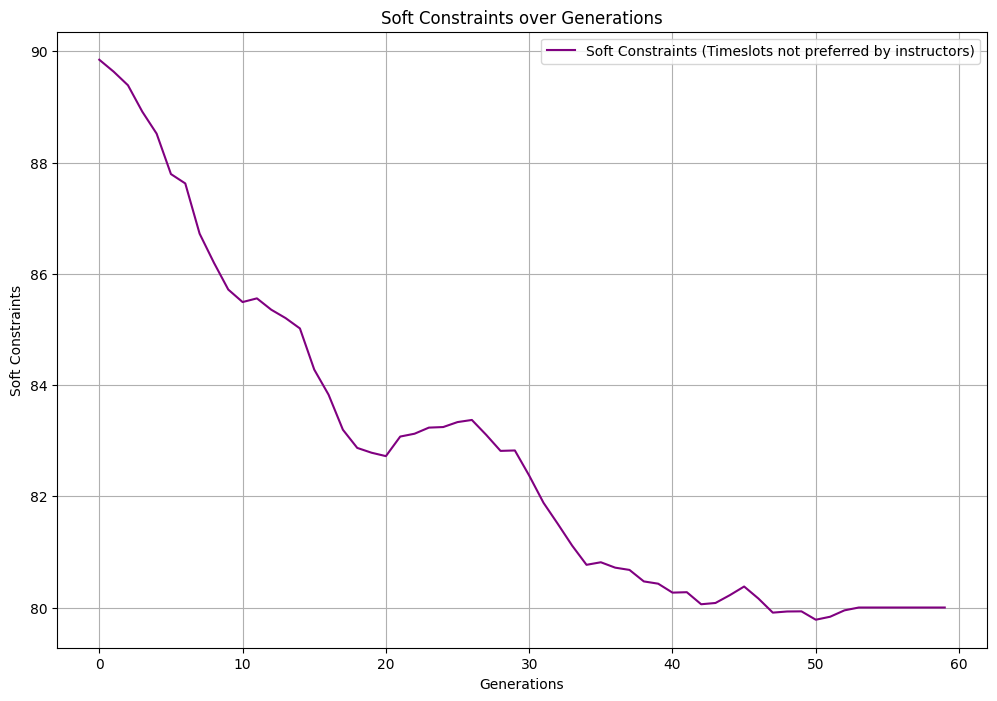

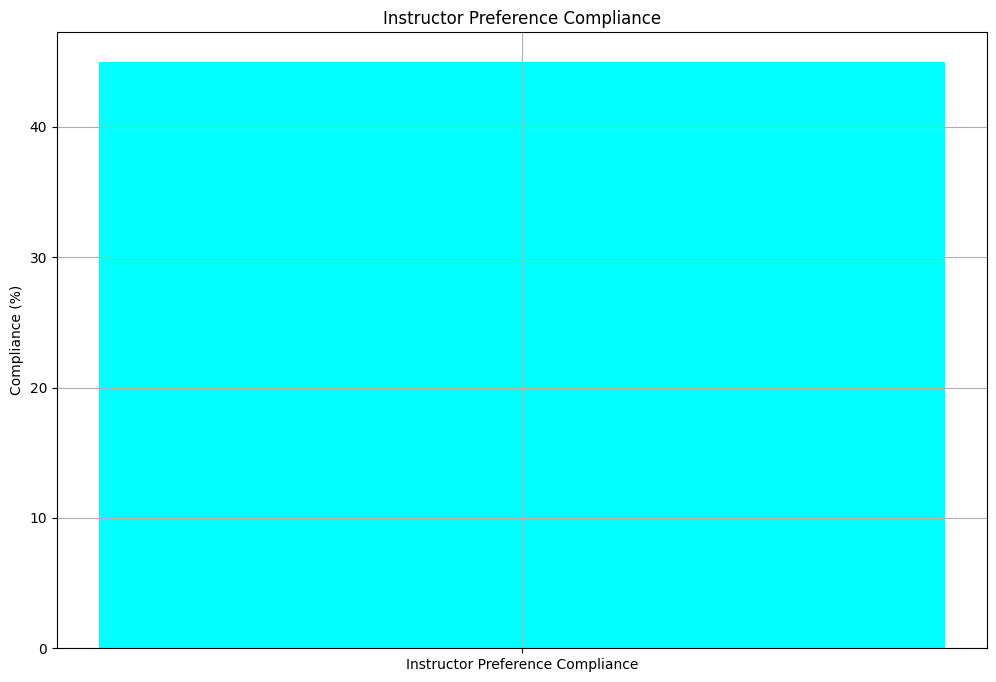

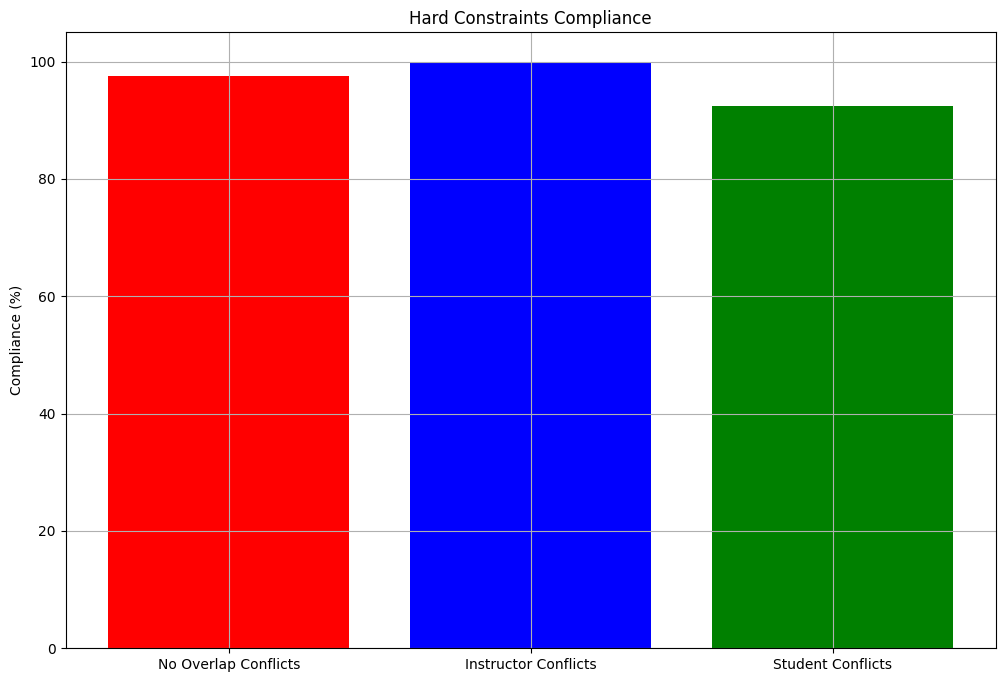

In [ ]:
# @title GA: PERFORMING AGAIN TO SEE IF WE GOT THE SAME RESULTS WITH THE SAME SEED (15)


def generate_candidate(random, args):
    candidate = []
    for course in courses:
        room = random.choice(rooms)
        timeslot = random.choice(timeslots)
        instructor = course['instructor_id']
        student_list = [s['student_id'] for s in students if course['course_id'] in s['courses']]
        candidate.append((course['course_id'], room['room_id'], timeslot['timeslot_id'], instructor, student_list))
    return candidate

def fitness_function(candidates, args):
    fitness_values = []
    hard_constraints_counts = {'h1': [], 'h2': [], 'h3': []}
    soft_constraints_counts = []

    for candidate in candidates:
        hard_conflicts_1 = 0
        hard_conflicts_2 = 0
        hard_conflicts_3 = 0
        soft_penalty = 0

        # Hard Constraint: No overlapping classes in the same room
        room_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (room_id, timeslot_id) in room_timeslot_dict:
                hard_conflicts_1 += 1
            else:
                room_timeslot_dict[(room_id, timeslot_id)] = course_id

        # Hard Constraint: No instructor assigned to more than one class at the same time
        instructor_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (instructor_id, timeslot_id) in instructor_timeslot_dict:
                hard_conflicts_2 += 1
            else:
                instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id

        # Hard Constraint: Students should not have overlapping classes
        student_timeslot_dict = {}
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            for student_id in student_list:
                if (student_id, timeslot_id) in student_timeslot_dict:
                    hard_conflicts_3 += 1
                else:
                    student_timeslot_dict[(student_id, timeslot_id)] = course_id

        # Soft Constraint: Prefer timeslots preferred by instructors
        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            instructor = next(i for i in instructors if i['instructor_id'] == instructor_id)
            if timeslot_id not in instructor['preferred_timeslots']:
                soft_penalty += 0.5  # Less severe penalty for preference

        # Normalize fitness to be between 0 and 1 (lower is better)
        max_possible_conflicts = len(candidate) * 3  # Maximum conflicts if all courses overlap in all constraints
        hard_conflicts = hard_conflicts_1 + hard_conflicts_2 + hard_conflicts_3
        normalized_fitness = (hard_conflicts + soft_penalty) / max_possible_conflicts
        fitness_values.append(normalized_fitness)

        # Store hard and soft constraint counts
        hard_constraints_counts['h1'].append(hard_conflicts_1)
        hard_constraints_counts['h2'].append(hard_conflicts_2)
        hard_constraints_counts['h3'].append(hard_conflicts_3)
        soft_constraints_counts.append(soft_penalty)

    # Aggregate hard and soft constraints
    global_hard_constraints['h1'].append(sum(hard_constraints_counts['h1']) / len(hard_constraints_counts['h1']))
    global_hard_constraints['h2'].append(sum(hard_constraints_counts['h2']) / len(hard_constraints_counts['h2']))
    global_hard_constraints['h3'].append(sum(hard_constraints_counts['h3']) / len(hard_constraints_counts['h3']))
    global_soft_constraints.append(sum(soft_constraints_counts) / len(soft_constraints_counts))

    return fitness_values

def calculate_instructor_preference_compliance(best_solution):
    total_instructors = len(instructors)
    satisfied_instructors = 0

    for instructor in instructors:
        instructor_id = instructor['instructor_id']
        preferred_timeslots = instructor['preferred_timeslots']
        for course in best_solution.candidate:
            course_id, room_id, timeslot_id, assigned_instructor_id, student_list = course
            if assigned_instructor_id == instructor_id and timeslot_id in preferred_timeslots:
                satisfied_instructors += 1
                break

    return satisfied_instructors / total_instructors * 100

def calculate_hard_constraints_compliance(best_solution):
    total_courses = len(best_solution.candidate)
    no_overlap_conflicts = 0
    instructor_conflicts = 0
    student_conflicts = 0

    # Check for overlapping classes in the same room
    room_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution.candidate:
        if (room_id, timeslot_id) not in room_timeslot_dict:
            room_timeslot_dict[(room_id, timeslot_id)] = course_id
        else:
            no_overlap_conflicts += 1

    # Check for instructors assigned to more than one class at the same time
    instructor_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution.candidate:
        if (instructor_id, timeslot_id) not in instructor_timeslot_dict:
            instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id
        else:
            instructor_conflicts += 1

    # Check for students having overlapping classes
    student_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution.candidate:
        for student_id in student_list:
            if (student_id, timeslot_id) not in student_timeslot_dict:
                student_timeslot_dict[(student_id, timeslot_id)] = course_id
            else:
                student_conflicts += 1

    return {
        'no_overlap_conflicts': (total_courses - no_overlap_conflicts) / total_courses * 100,
        'instructor_conflicts': (total_courses - instructor_conflicts) / total_courses * 100,
        'student_conflicts': (total_courses - student_conflicts) / total_courses * 100
    }

def plot_hard_constraints(generations, h1_values, h2_values, h3_values):
    plt.figure(figsize=(12, 8))
    plt.plot(generations, h1_values, label='Hard Constraint 1 (Overlapping classes in the same room)', color='red')
    plt.plot(generations, h2_values, label='Hard Constraint 2 (Instructor assigned to more than one class at the same time)', color='blue')
    plt.plot(generations, h3_values, label='Hard Constraint 3 (Students having overlapping classes)', color='green')
    plt.xlabel('Generations')
    plt.ylabel('Hard Constraints')
    plt.title('Hard Constraints over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

def my_terminator(population, num_generations, num_evaluations, args):
    tolerance = args.get('tolerance', 0.00001)
    generations = args.get('generations', 10)
    if num_generations < generations:
        return False
    last_fitnesses = [ind.fitness for ind in population]
    best_fitness = min(last_fitnesses)
    if all(abs(best_fitness - ind.fitness) < tolerance for ind in population[-generations:]):
        return True
    return False



def main():
    random.seed(15)  # Usar la semilla 15 para obtener los mejores resultados
    stats = {
        'worst': [],
        'best': [],
        'median': [],
        'average': [],
        'std_dev': []
    }

    global global_hard_constraints, global_soft_constraints
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []

    # Configurar el algoritmo evolutivo
    ea = inspyred.ec.GA(random)
    ea.selector = ec.selectors.tournament_selection
    ea.variator = [ec.variators.uniform_crossover, ec.variators.bit_flip_mutation]
    ea.replacer = ec.replacers.generational_replacement

    # Configurar el terminador
    ea.terminator = [
        ec.terminators.generation_termination,
        my_terminator
    ]

    # Observador personalizado para recopilar estadísticas
    def observer(population, num_generations, num_evaluations, args):
        fitness_values = [ind.fitness for ind in population]
        stats['worst'].append(max(fitness_values))
        stats['best'].append(min(fitness_values))
        stats['median'].append(sorted(fitness_values)[len(fitness_values) // 2])
        stats['average'].append(sum(fitness_values) / len(fitness_values))
        std_dev = (sum((x - stats['average'][-1])**2 for x in fitness_values) / len(fitness_values))**0.5
        if std_dev < 1e-4:
            std_dev = 0
        stats['std_dev'].append(round(std_dev, 6))  # Redondear a 6 cifras significativas

    ea.observer = [ec.observers.stats_observer, observer]

    final_pop = ea.evolve(
        generator=generate_candidate,
        evaluator=fitness_function,
        pop_size=196,
        maximize=False,  # Lower fitness is better
        bounder=None,
        max_generations=122,  # Parameter to control the number of generations
        tournament_size=5,  # Adjusted tournament size
        mutation_rate=0.025167150341825872,  # Set mutation rate
        crossover_rate=0.9847131373438699,  # Set crossover rate
        generations=10,
        tolerance=0.00001
    )

    best_solution = min(final_pop, key=lambda ind: ind.fitness)
    print('Best Solution:')
    for course in best_solution.candidate:
        print(course)
    print('Best Fitness:', best_solution.fitness)

    # Print schedule for each room
    room_schedule = {}
    for course in best_solution.candidate:
        course_id, room_id, timeslot_id, instructor_id, student_list = course
        if room_id not in room_schedule:
            room_schedule[room_id] = []
        room_schedule[room_id].append(course)

    print('\nRoom Schedules:')
    for room_id in sorted(room_schedule.keys()):
        print(f'\nRoom {room_id}:')
        for course in room_schedule[room_id]:
            course_id, room_id, timeslot_id, instructor_id, student_list = course
            print(f'  Course {course_id} in Timeslot {timeslot_id} by Instructor {instructor_id}')

    # Calculate and print instructor preference compliance
    instructor_preference_compliance = calculate_instructor_preference_compliance(best_solution)
    print(f'\nInstructor Preference Compliance: {instructor_preference_compliance:.2f}%')

    # Calculate and print hard constraints compliance
    hard_constraints_compliance = calculate_hard_constraints_compliance(best_solution)
    print(f"Compliance with no overlap conflicts: {hard_constraints_compliance['no_overlap_conflicts']:.2f}%")
    print(f"Compliance with instructor conflicts: {hard_constraints_compliance['instructor_conflicts']:.2f}%")
    print(f"Compliance with student conflicts: {hard_constraints_compliance['student_conflicts']:.2f}%")

    # Ensure stats lists are the same length as the number of generations
    max_generations = len(stats['worst'])
    stats['worst'] = stats['worst'][:max_generations]
    stats['best'] = stats['best'][:max_generations]
    stats['median'] = stats['median'][:max_generations]
    stats['average'] = stats['average'][:max_generations]
    stats['std_dev'] = stats['std_dev'][:max_generations]

    # Print the values of hard constraints for debugging
    print("Debug - Global Hard Constraints:")
    print("H1 (Overlapping classes in the same room):", global_hard_constraints['h1'])
    print("H2 (Instructor assigned to more than one class at the same time):", global_hard_constraints['h2'])
    print("H3 (Students having overlapping classes):", global_hard_constraints['h3'])

    # Plotting the fitness stats
    generations = list(range(len(stats['worst'])))
    plt.figure(figsize=(12, 8))
    plt.plot(generations, stats['worst'], label='Worst Fitness')
    plt.plot(generations, stats['best'], label='Best Fitness')
    plt.plot(generations, stats['median'], label='Median Fitness')
    plt.plot(generations, stats['average'], label='Average Fitness')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.title('Evolutionary Algorithm Fitness over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting the standard deviation
    plt.figure(figsize=(12, 8))
    plt.plot(generations, stats['std_dev'], label='Standard Deviation', color='orange')
    plt.xlabel('Generations')
    plt.ylabel('Standard Deviation')
    plt.title('Evolutionary Algorithm Standard Deviation over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting hard constraints
    plot_hard_constraints(generations, global_hard_constraints['h1'], global_hard_constraints['h2'], global_hard_constraints['h3'])

    # Plotting soft constraints
    plt.figure(figsize=(12, 8))
    plt.plot(generations, global_soft_constraints, label='Soft Constraints (Timeslots not preferred by instructors)', color='purple')
    plt.xlabel('Generations')
    plt.ylabel('Soft Constraints')
    plt.title('Soft Constraints over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting instructor preference compliance
    plt.figure(figsize=(12, 8))
    plt.bar(['Instructor Preference Compliance'], [instructor_preference_compliance], color='cyan')
    plt.ylabel('Compliance (%)')
    plt.title('Instructor Preference Compliance')
    plt.grid(True)
    plt.show()

    # Plotting hard constraints compliance
    plt.figure(figsize=(12, 8))
    plt.bar(['No Overlap Conflicts', 'Instructor Conflicts', 'Student Conflicts'],
            [hard_constraints_compliance['no_overlap_conflicts'],
             hard_constraints_compliance['instructor_conflicts'],
             hard_constraints_compliance['student_conflicts']],
            color=['red', 'blue', 'green'])
    plt.ylabel('Compliance (%)')
    plt.title('Hard Constraints Compliance')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []
    main()

Best Solution:
('C001', 'R004', 'TS20', 'I075', ['S102', 'S134', 'S135', 'S161', 'S197', 'S341', 'S357', 'S361', 'S466', 'S498'])
('C002', 'R004', 'TS19', 'I063', ['S144', 'S154', 'S166', 'S200', 'S257', 'S282', 'S310', 'S324', 'S341', 'S353', 'S418', 'S459', 'S468', 'S469', 'S472', 'S476'])
('C003', 'R010', 'TS22', 'I039', ['S034', 'S066', 'S072', 'S149', 'S151', 'S180', 'S190', 'S200', 'S233', 'S240', 'S272', 'S277', 'S351', 'S384', 'S400', 'S409', 'S440', 'S446', 'S456', 'S470'])
('C004', 'R009', 'TS14', 'I022', ['S023', 'S027', 'S183', 'S234', 'S291', 'S324', 'S335', 'S458', 'S483'])
('C005', 'R003', 'TS19', 'I062', ['S022', 'S037', 'S048', 'S114', 'S143', 'S275', 'S284', 'S298', 'S362', 'S493'])
('C006', 'R014', 'TS18', 'I007', ['S031', 'S033', 'S040', 'S079', 'S117', 'S151', 'S205', 'S206', 'S300', 'S319', 'S393', 'S410', 'S414', 'S482'])
('C007', 'R007', 'TS20', 'I037', ['S028', 'S118', 'S170', 'S225', 'S270', 'S307', 'S358', 'S436'])
('C008', 'R006', 'TS13', 'I080', ['S066', 'S

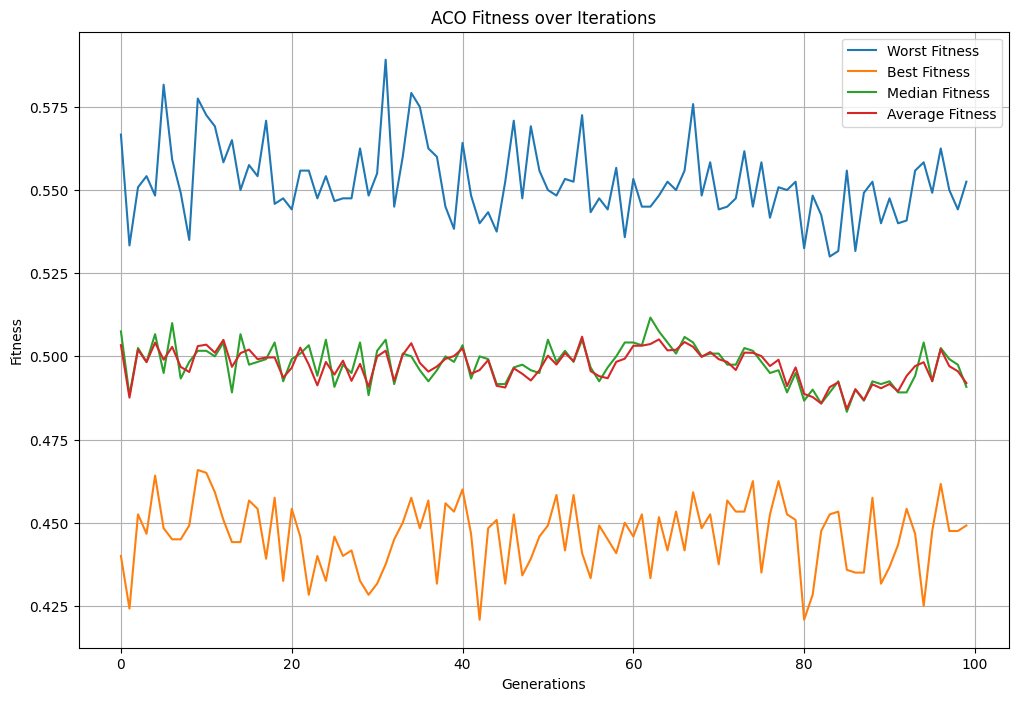

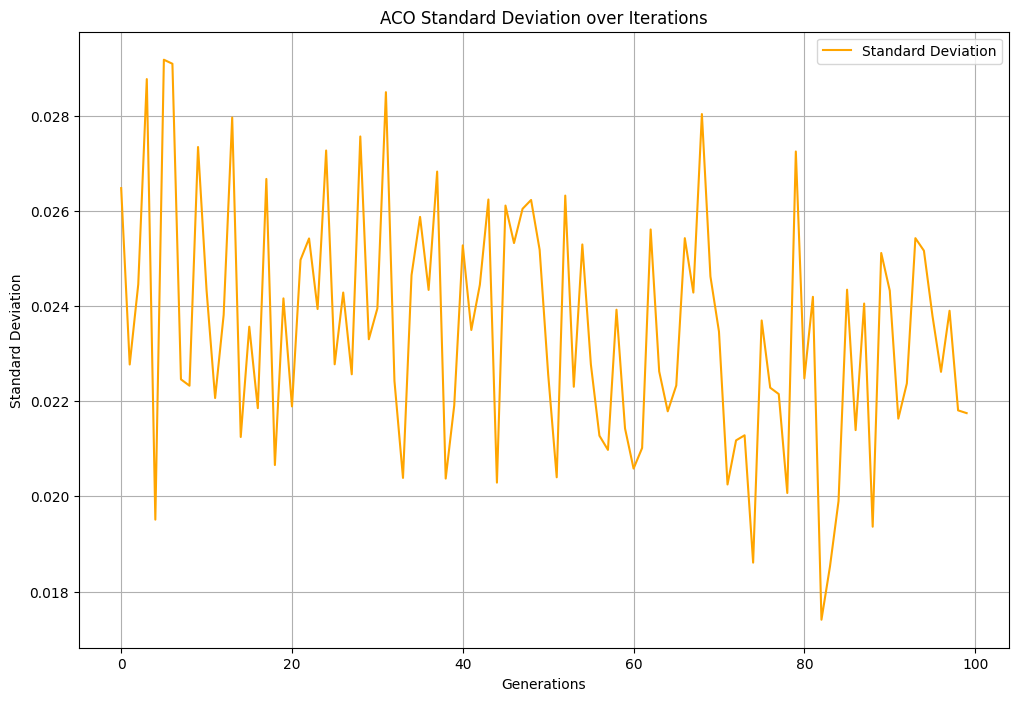

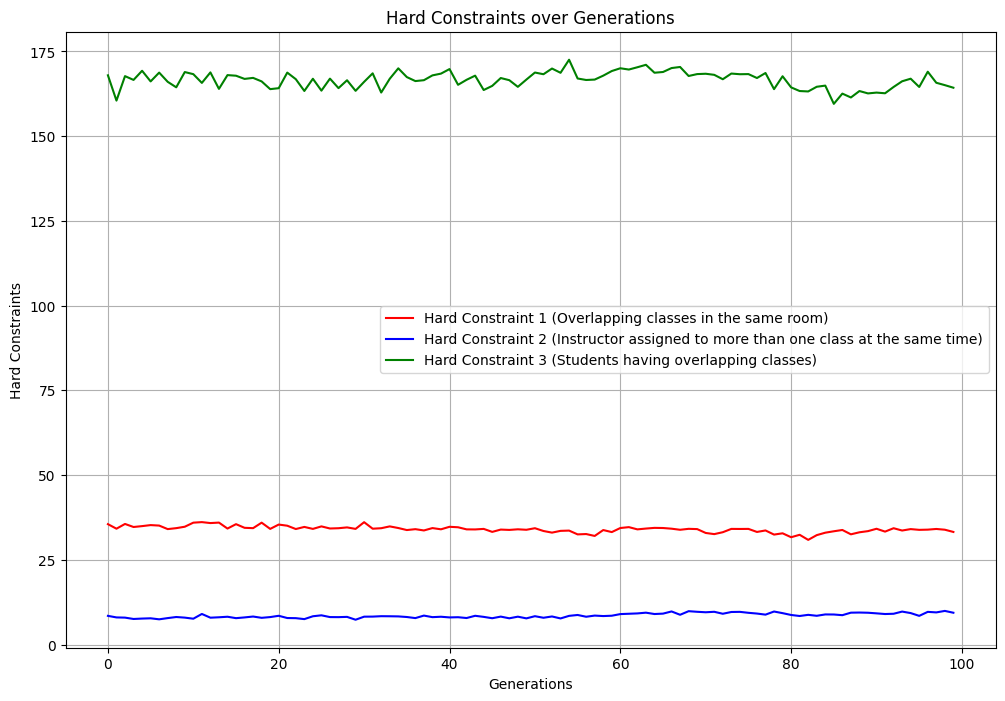

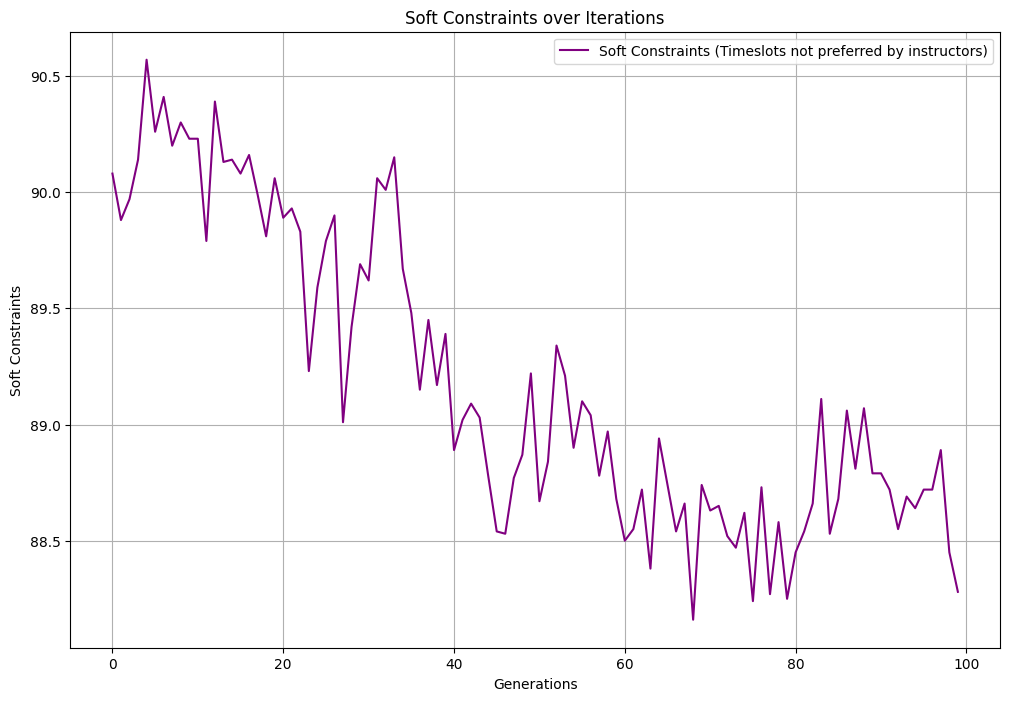

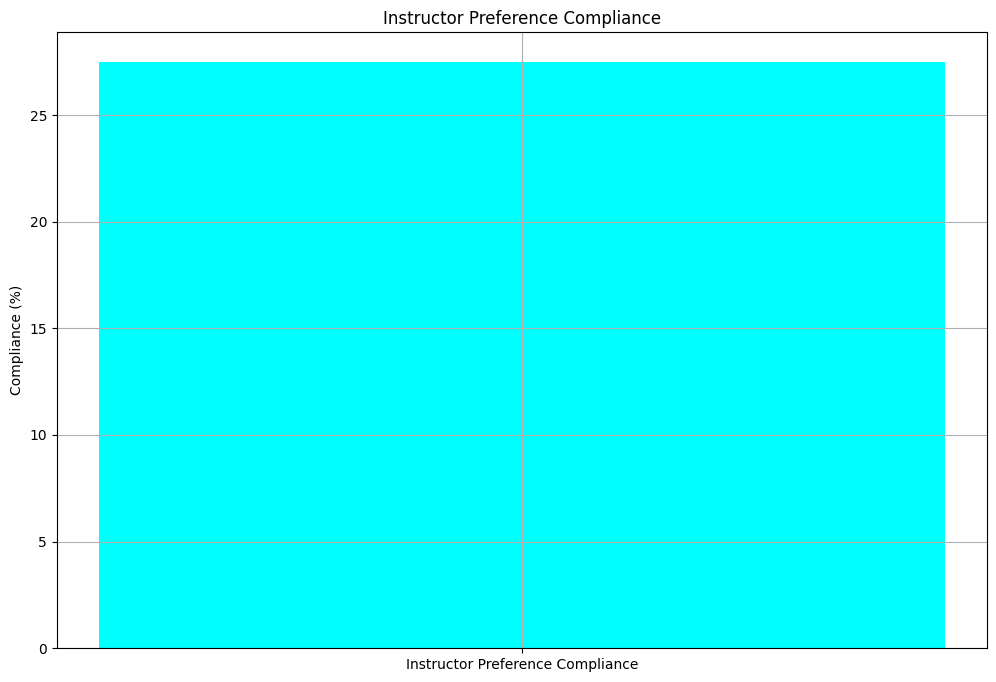

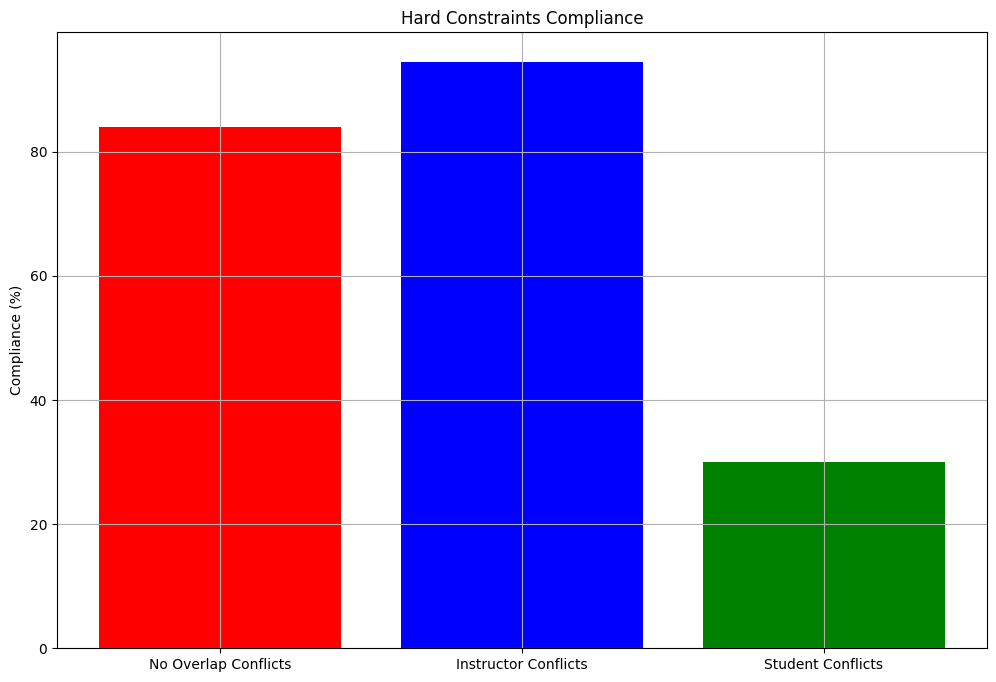

In [ ]:
# @title ACO ALGORITHM.

# Parameters for ACO
num_ants = 50
num_iterations = 100
alpha = 1.0  # Influence of pheromone
beta = 2.0   # Influence of heuristic
evaporation_rate = 0.5

# Initialize pheromone levels
def initialize_pheromones():
    pheromones = np.ones((len(courses), len(rooms), len(timeslots)))
    return pheromones

# Heuristic information (inverse of conflicts heuristic)
def calculate_heuristic():
    heuristic = np.ones((len(courses), len(rooms), len(timeslots)))
    return heuristic

# Precompute probabilities
def compute_probabilities(pheromones, heuristic):
    probabilities = np.zeros_like(pheromones)
    for i in range(len(courses)):
        for j in range(len(rooms)):
            for k in range(len(timeslots)):
                probabilities[i, j, k] = (pheromones[i, j, k] ** alpha) * (heuristic[i, j, k] ** beta)
    return probabilities / probabilities.sum(axis=(1, 2), keepdims=True)

# Build solution based on pheromone and heuristic
def build_solution(probabilities):
    solution = []
    for course_index, course in enumerate(courses):
        flattened_probs = probabilities[course_index].flatten()
        chosen_index = np.random.choice(np.arange(flattened_probs.size), p=flattened_probs)
        room_index, timeslot_index = divmod(chosen_index, probabilities.shape[2])
        chosen_room = rooms[room_index]
        chosen_timeslot = timeslots[timeslot_index]

        instructor = course['instructor_id']
        student_list = [s['student_id'] for s in students if course['course_id'] in s['courses']]
        solution.append((course['course_id'], chosen_room['room_id'], chosen_timeslot['timeslot_id'], instructor, student_list))
    return solution

# Update pheromones based on solutions
def update_pheromones(pheromones, solutions, fitness_values):
    pheromones *= (1 - evaporation_rate)
    for solution, fitness in zip(solutions, fitness_values):
        for course_id, room_id, timeslot_id, _, _ in solution:
            course_index = next(i for i, course in enumerate(courses) if course['course_id'] == course_id)
            room_index = next(i for i, room in enumerate(rooms) if room['room_id'] == room_id)
            timeslot_index = next(i for i, timeslot in enumerate(timeslots) if timeslot['timeslot_id'] == timeslot_id)
            pheromones[course_index][room_index][timeslot_index] += 1.0 / fitness

# Calculate instructor preference compliance
def calculate_instructor_preference_compliance(best_solution):
    total_instructors = len(instructors)
    satisfied_instructors = 0

    for instructor in instructors:
        instructor_id = instructor['instructor_id']
        preferred_timeslots = instructor['preferred_timeslots']
        for course in best_solution:
            course_id, room_id, timeslot_id, assigned_instructor_id, student_list = course
            if assigned_instructor_id == instructor_id and timeslot_id in preferred_timeslots:
                satisfied_instructors += 1
                break

    return satisfied_instructors / total_instructors * 100

# Calculate hard constraints compliance
def calculate_hard_constraints_compliance(best_solution):
    total_courses = len(best_solution)
    no_overlap_conflicts = 0
    instructor_conflicts = 0
    student_conflicts = 0

    # Check for overlapping classes in the same room
    room_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution:
        if (room_id, timeslot_id) not in room_timeslot_dict:
            room_timeslot_dict[(room_id, timeslot_id)] = course_id
        else:
            no_overlap_conflicts += 1

    # Check for instructors assigned to more than one class at the same time
    instructor_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution:
        if (instructor_id, timeslot_id) not in instructor_timeslot_dict:
            instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id
        else:
            instructor_conflicts += 1

    # Check for students having overlapping classes
    student_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution:
        for student_id in student_list:
            if (student_id, timeslot_id) not in student_timeslot_dict:
                student_timeslot_dict[(student_id, timeslot_id)] = course_id
            else:
                student_conflicts += 1

    return {
        'no_overlap_conflicts': (total_courses - no_overlap_conflicts) / total_courses * 100,
        'instructor_conflicts': (total_courses - instructor_conflicts) / total_courses * 100,
        'student_conflicts': (total_courses - student_conflicts) / total_courses * 100
    }

# Main ACO loop
def aco():
    pheromones = initialize_pheromones()
    heuristic = calculate_heuristic()

    stats = {
        'worst': [],
        'best': [],
        'median': [],
        'average': [],
        'std_dev': []
    }

    global global_hard_constraints, global_soft_constraints
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []

    for iteration in range(num_iterations):
        probabilities = compute_probabilities(pheromones, heuristic)
        solutions = [build_solution(probabilities) for _ in range(num_ants)]
        fitness_values = fitness_function(solutions, None)

        update_pheromones(pheromones, solutions, fitness_values)

        stats['worst'].append(max(fitness_values))
        stats['best'].append(min(fitness_values))
        stats['median'].append(sorted(fitness_values)[len(fitness_values) // 2])
        stats['average'].append(sum(fitness_values) / len(fitness_values))
        std_dev = (sum((x - stats['average'][-1])**2 for x in fitness_values) / len(fitness_values))**0.5
        stats['std_dev'].append(round(std_dev, 6))

    best_solution = solutions[fitness_values.index(min(fitness_values))]
    print('Best Solution:')
    for course in best_solution:
        print(course)
    print('Best Fitness:', min(fitness_values))

    # Print schedule for each room
    room_schedule = {}
    for course in best_solution:
        course_id, room_id, timeslot_id, instructor_id, student_list = course
        if room_id not in room_schedule:
            room_schedule[room_id] = []
        room_schedule[room_id].append(course)

    print('\nRoom Schedules:')
    for room_id in sorted(room_schedule.keys()):
        print(f'\nRoom {room_id}:')
        for course in room_schedule[room_id]:
            course_id, room_id, timeslot_id, instructor_id, student_list = course
            print(f'  Course {course_id} in Timeslot {timeslot_id} by Instructor {instructor_id}')

    # Calculate and print instructor preference compliance
    instructor_preference_compliance = calculate_instructor_preference_compliance(best_solution)
    print(f'\nInstructor Preference Compliance: {instructor_preference_compliance:.2f}%')

    # Calculate and print hard constraints compliance
    hard_constraints_compliance = calculate_hard_constraints_compliance(best_solution)
    print(f"Compliance with no overlap conflicts: {hard_constraints_compliance['no_overlap_conflicts']:.2f}%")
    print(f"Compliance with instructor conflicts: {hard_constraints_compliance['instructor_conflicts']:.2f}%")
    print(f"Compliance with student conflicts: {hard_constraints_compliance['student_conflicts']:.2f}%")

    # Ensure stats lists are the same length as the number of generations
    max_generations = len(stats['worst'])
    stats['worst'] = stats['worst'][:max_generations]
    stats['best'] = stats['best'][:max_generations]
    stats['median'] = stats['median'][:max_generations]
    stats['average'] = stats['average'][:max_generations]
    stats['std_dev'] = stats['std_dev'][:max_generations]

    # Print the values of hard constraints for debugging
    print("Debug - Global Hard Constraints:")
    print("H1 (Overlapping classes in the same room):", global_hard_constraints['h1'])
    print("H2 (Instructor assigned to more than one class at the same time):", global_hard_constraints['h2'])
    print("H3 (Students having overlapping classes):", global_hard_constraints['h3'])

    # Plotting the fitness stats
    generations = list(range(len(stats['worst'])))
    plt.figure(figsize=(12, 8))
    plt.plot(generations, stats['worst'], label='Worst Fitness')
    plt.plot(generations, stats['best'], label='Best Fitness')
    plt.plot(generations, stats['median'], label='Median Fitness')
    plt.plot(generations, stats['average'], label='Average Fitness')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.title('ACO Fitness over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting the standard deviation
    plt.figure(figsize=(12, 8))
    plt.plot(generations, stats['std_dev'], label='Standard Deviation', color='orange')
    plt.xlabel('Generations')
    plt.ylabel('Standard Deviation')
    plt.title('ACO Standard Deviation over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting hard constraints
    plot_hard_constraints(generations, global_hard_constraints['h1'], global_hard_constraints['h2'], global_hard_constraints['h3'])

    # Plotting soft constraints
    plt.figure(figsize=(12, 8))
    plt.plot(generations, global_soft_constraints, label='Soft Constraints (Timeslots not preferred by instructors)', color='purple')
    plt.xlabel('Generations')
    plt.ylabel('Soft Constraints')
    plt.title('Soft Constraints over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting instructor preference compliance
    plt.figure(figsize=(12, 8))
    plt.bar(['Instructor Preference Compliance'], [instructor_preference_compliance], color='cyan')
    plt.ylabel('Compliance (%)')
    plt.title('Instructor Preference Compliance')
    plt.grid(True)
    plt.show()

    # Plotting hard constraints compliance
    plt.figure(figsize=(12, 8))
    plt.bar(['No Overlap Conflicts', 'Instructor Conflicts', 'Student Conflicts'],
            [hard_constraints_compliance['no_overlap_conflicts'],
             hard_constraints_compliance['instructor_conflicts'],
             hard_constraints_compliance['student_conflicts']],
            color=['red', 'blue', 'green'])
    plt.ylabel('Compliance (%)')
    plt.title('Hard Constraints Compliance')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []
    aco()

In [ ]:
!pip install optuna matplotlib pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


It is recommended that the cell below is not executed since it will take a lot of time to get the optimization and instead use the results from the githud repository csv to ensure replicability. Set the path accordingly... 'optuna_study_results_aco.csv'

In [ ]:
# @title ACO: HYPERPARAMETERS OPTIMIZATION WITH OPTUNA BAYESIAN OPTIMIZATION.
def initialize_pheromones():
    pheromones = np.ones((len(courses), len(rooms), len(timeslots)))
    return pheromones

def calculate_heuristic():
    heuristic = np.ones((len(courses), len(rooms), len(timeslots)))
    return heuristic

def compute_probabilities(pheromones, heuristic, alpha, beta):
    probabilities = np.zeros_like(pheromones)
    for i in range(len(courses)):
        for j in range(len(rooms)):
            for k in range(len(timeslots)):
                probabilities[i, j, k] = (pheromones[i, j, k] ** alpha) * (heuristic[i, j, k] ** beta)
    return probabilities / probabilities.sum(axis=(1, 2), keepdims=True)

def build_solution(probabilities):
    solution = []
    for course_index, course in enumerate(courses):
        flattened_probs = probabilities[course_index].flatten()
        chosen_index = np.random.choice(np.arange(flattened_probs.size), p=flattened_probs)
        room_index, timeslot_index = divmod(chosen_index, probabilities.shape[2])
        chosen_room = rooms[room_index]
        chosen_timeslot = timeslots[timeslot_index]

        instructor = course['instructor_id']
        student_list = [s['student_id'] for s in students if course['course_id'] in s['courses']]
        solution.append((course['course_id'], chosen_room['room_id'], chosen_timeslot['timeslot_id'], instructor, student_list))
    return solution

def fitness_function(solutions, args):
    fitness_values = []
    for candidate in solutions:
        hard_conflicts_1 = 0
        hard_conflicts_2 = 0
        hard_conflicts_3 = 0
        soft_penalty = 0

        room_timeslot_dict = {}
        instructor_timeslot_dict = {}
        student_timeslot_dict = {}

        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (room_id, timeslot_id) in room_timeslot_dict:
                hard_conflicts_1 += 1
            else:
                room_timeslot_dict[(room_id, timeslot_id)] = course_id

            if (instructor_id, timeslot_id) in instructor_timeslot_dict:
                hard_conflicts_2 += 1
            else:
                instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id

            for student_id in student_list:
                if (student_id, timeslot_id) in student_timeslot_dict:
                    hard_conflicts_3 += 1
                else:
                    student_timeslot_dict[(student_id, timeslot_id)] = course_id

            instructor = next(i for i in instructors if i['instructor_id'] == instructor_id)
            if timeslot_id not in instructor['preferred_timeslots']:
                soft_penalty += 0.5

        hard_conflicts = hard_conflicts_1 + hard_conflicts_2 + hard_conflicts_3
        max_possible_conflicts = len(candidate) * 3
        fitness = (hard_conflicts + soft_penalty) / max_possible_conflicts
        fitness_values.append(fitness)

    return fitness_values

def update_pheromones(pheromones, solutions, fitness_values, evaporation_rate):
    pheromones *= (1 - evaporation_rate)
    for solution, fitness in zip(solutions, fitness_values):
        for course_id, room_id, timeslot_id, _, _ in solution:
            course_index = next(i for i, course in enumerate(courses) if course['course_id'] == course_id)
            room_index = next(i for i, room in enumerate(rooms) if room['room_id'] == room_id)
            timeslot_index = next(i for i, timeslot in enumerate(timeslots) if timeslot['timeslot_id'] == timeslot_id)
            pheromones[course_index][room_index][timeslot_index] += 1.0 / fitness

def aco(num_ants, num_iterations, alpha, beta, evaporation_rate):
    pheromones = initialize_pheromones()
    heuristic = calculate_heuristic()
    best_solution = None
    best_fitness = float('inf')

    for iteration in range(num_iterations):
        probabilities = compute_probabilities(pheromones, heuristic, alpha, beta)
        solutions = [build_solution(probabilities) for _ in range(num_ants)]
        fitness_values = fitness_function(solutions, None)

        update_pheromones(pheromones, solutions, fitness_values, evaporation_rate)

        current_best_fitness = min(fitness_values)
        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_solution = solutions[fitness_values.index(current_best_fitness)]

    return best_solution, best_fitness

def objective(trial):
    num_ants = trial.suggest_int('num_ants', 20, 100)
    num_iterations = trial.suggest_int('num_iterations', 50, 200)
    alpha = trial.suggest_float('alpha', 0.5, 3.0)
    beta = trial.suggest_float('beta', 1.0, 5.0)
    evaporation_rate = trial.suggest_float('evaporation_rate', 0.1, 0.9)

    _, best_fitness = aco(num_ants, num_iterations, alpha, beta, evaporation_rate)
    return best_fitness

from google.colab import drive
drive.mount('/content/drive')

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Print the best hyperparameters
print(f'Best hyperparameters: {study.best_params}')
print(f'Best fitness: {study.best_value}')

# Save study results to a CSV file in the shared Google Drive folder
shared_folder_path = '/content/drive'
df = study.trials_dataframe()
df.to_csv(f'{shared_folder_path}optuna_study_results_aco.csv', index=False)


[I 2024-06-30 20:48:10,592] A new study created in memory with name: no-name-3116869f-92df-4fa5-bb3b-f103bfe9ace2


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[I 2024-06-30 20:54:56,620] Trial 0 finished with value: 0.42916666666666664 and parameters: {'num_ants': 50, 'num_iterations': 193, 'alpha': 2.3299848545285125, 'beta': 3.3946339367881464, 'evaporation_rate': 0.22481491235394924}. Best is trial 0 with value: 0.42916666666666664.
[I 2024-06-30 20:56:14,445] Trial 1 finished with value: 0.4475 and parameters: {'num_ants': 32, 'num_iterations': 58, 'alpha': 2.665440364437338, 'beta': 3.404460046972835, 'evaporation_rate': 0.6664580622368363}. Best is trial 0 with value: 0.42916666666666664.
[I 2024-06-30 20:59:14,772] Trial 2 finished with value: 0.42 and parameters: {'num_ants': 21, 'num_iterations': 196, 'alpha': 2.5811066020010545, 'beta': 1.8493564427131046, 'evaporation_rate': 0.24545997376568052}. Best is trial 2 with value: 0.42.
[I 2024-06-30 21:01:30,613] Trial 3 finished with value: 0.43166666666666664 and parameters: {'num_ants': 34, 'num_iterations': 95, 'alpha': 1.8118910790805947, 'beta': 2.727780074568463, 'evaporation_rat

Best hyperparameters: {'num_ants': 59, 'num_iterations': 133, 'alpha': 0.8812899911986412, 'beta': 1.2107849139232842, 'evaporation_rate': 0.8181636433351727}
Best fitness: 0.40166666666666667


Download the csv file driveoptuna_study_results_aco.csv from the Github repository and set the path accordingly to get same results

[I 2024-07-01 14:06:56,344] A new study created in memory with name: no-name-ecf718dd-14e3-4cb1-b0e1-4b2adb7b2c57
<ipython-input-20-49de3a5acbcc>:35: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  history = optuna.visualization.matplotlib.plot_optimization_history(study)


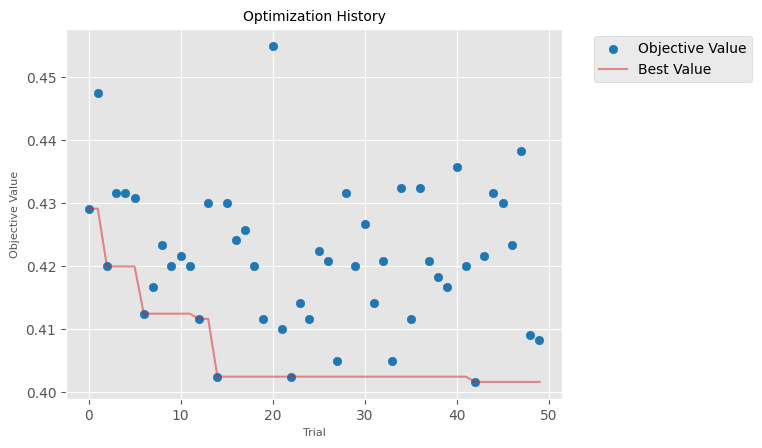

<ipython-input-20-49de3a5acbcc>:42: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  param_importances = optuna.visualization.matplotlib.plot_param_importances(study)


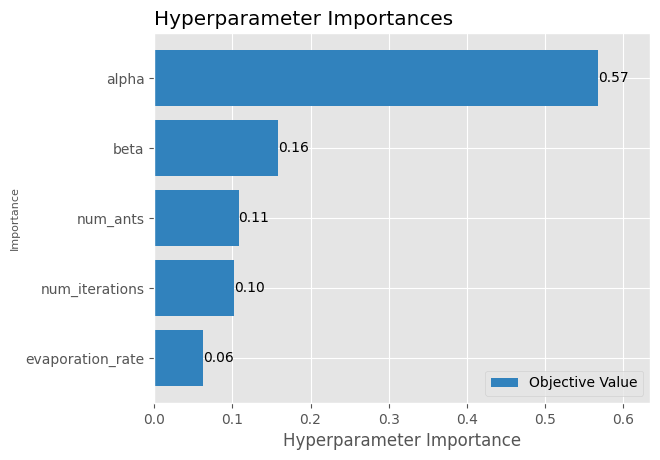

<ipython-input-20-49de3a5acbcc>:47: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  parallel_coords = optuna.visualization.matplotlib.plot_parallel_coordinate(study)


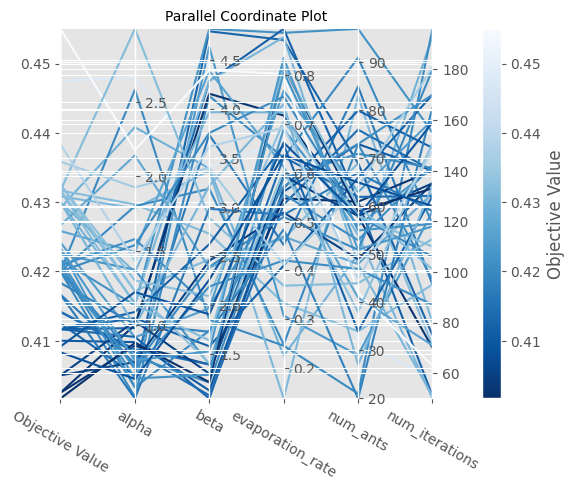

<ipython-input-20-49de3a5acbcc>:52: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  contours = optuna.visualization.matplotlib.plot_contour(study)
[W 2024-07-01 14:07:00,317] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


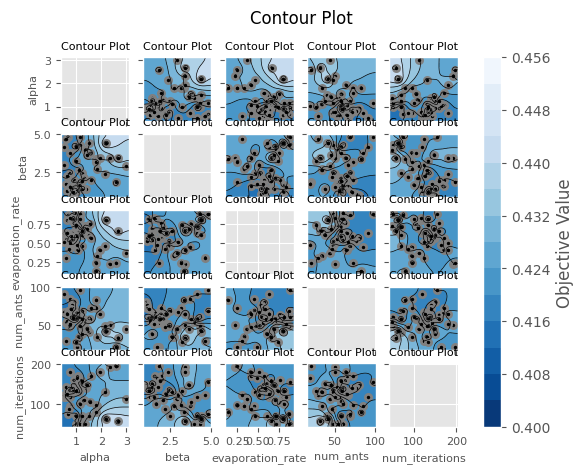

In [ ]:
# @title ACO:PLOTTING HYPERPARAMETERS OPTIMIZATION PROCESS

# Load the CSV file from Google Drive
df = pd.read_csv('/driveoptuna_study_results_aco.csv')

# Recreate the study from the dataframe
study = optuna.create_study(direction='minimize')
for _, row in df.iterrows():
    trial = optuna.trial.create_trial(
        params={
            'num_ants': row['params_num_ants'],
            'num_iterations': row['params_num_iterations'],
            'alpha': row['params_alpha'],
            'beta': row['params_beta'],
            'evaporation_rate': row['params_evaporation_rate']
        },
        distributions={
            'num_ants': optuna.distributions.IntDistribution(20, 100),
            'num_iterations': optuna.distributions.IntDistribution(50, 200),
            'alpha': optuna.distributions.FloatDistribution(0.5, 3.0),
            'beta': optuna.distributions.FloatDistribution(1.0, 5.0),
            'evaporation_rate': optuna.distributions.FloatDistribution(0.1, 0.9)
        },
        value=row['value'],
        state=optuna.trial.TrialState.COMPLETE,
    )
    study.add_trial(trial)

# Plotting results with Matplotlib

# Plot optimization history
history = optuna.visualization.matplotlib.plot_optimization_history(study)
history.set_title("Optimization History", fontsize=10)
history.set_ylabel("Objective Value", fontsize=8)
history.set_xlabel("Trial", fontsize=8)
plt.show()

# Plot parameter importances
param_importances = optuna.visualization.matplotlib.plot_param_importances(study)
param_importances.set_ylabel("Importance", fontsize=8)
plt.show()

# Plot parallel coordinates
parallel_coords = optuna.visualization.matplotlib.plot_parallel_coordinate(study)
parallel_coords.set_title("Parallel Coordinate Plot", fontsize=10)
plt.show()

# Plot contour
contours = optuna.visualization.matplotlib.plot_contour(study)

# Adjust font size for x and y labels and title
for ax in contours.flatten():
    ax.set_title("Contour Plot", fontsize=8)
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Wilcoxon signed-rank test p-value: 9.313225746154785e-10


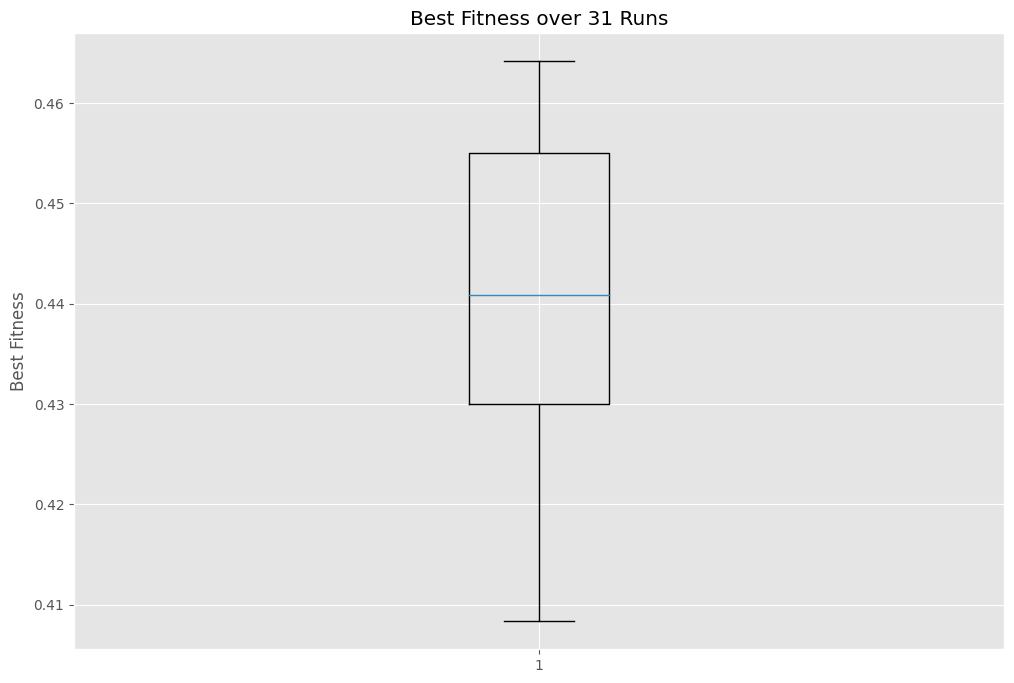

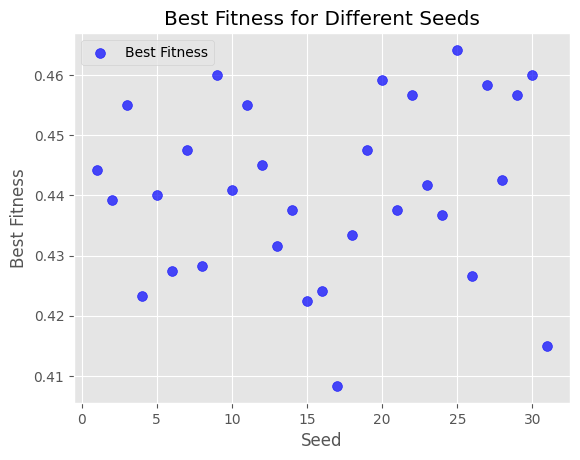

Final fitness values for each seed:
Seed 1: 0.4766666666666667
Seed 2: 0.48333333333333334
Seed 3: 0.47333333333333333
Seed 4: 0.49583333333333335
Seed 5: 0.53
Seed 6: 0.47833333333333333
Seed 7: 0.4716666666666667
Seed 8: 0.49666666666666665
Seed 9: 0.5066666666666667
Seed 10: 0.52
Seed 11: 0.5008333333333334
Seed 12: 0.4483333333333333
Seed 13: 0.52
Seed 14: 0.4891666666666667
Seed 15: 0.5058333333333334
Seed 16: 0.4816666666666667
Seed 17: 0.5216666666666666
Seed 18: 0.48833333333333334
Seed 19: 0.4691666666666667
Seed 20: 0.49916666666666665
Seed 21: 0.4708333333333333
Seed 22: 0.47
Seed 23: 0.4691666666666667
Seed 24: 0.49833333333333335
Seed 25: 0.495
Seed 26: 0.5291666666666667
Seed 27: 0.48333333333333334
Seed 28: 0.4608333333333333
Seed 29: 0.5158333333333334
Seed 30: 0.48833333333333334
Seed 31: 0.475


In [ ]:
# @title ACO: 31 SEEDS ITERATIONS USING THE BEST HYPERPARAMETERS FOUNDED.
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Assuming the necessary data: courses, rooms, timeslots, students, instructors

# Best hyperparameters from Optuna tuning
best_params = {
    'num_ants': 59,
    'num_iterations': 133,
    'alpha': 0.8812899911986412,
    'beta': 1.2107849139232842,
    'evaporation_rate': 0.8181636433351727
}

# Initialize pheromone levels
def initialize_pheromones():
    pheromones = np.ones((len(courses), len(rooms), len(timeslots)))
    return pheromones

# Heuristic information (inverse of conflicts heuristic)
def calculate_heuristic():
    heuristic = np.ones((len(courses), len(rooms), len(timeslots)))
    return heuristic

# Precompute probabilities
def compute_probabilities(pheromones, heuristic, alpha, beta):
    probabilities = np.zeros_like(pheromones)
    for i in range(len(courses)):
        for j in range(len(rooms)):
            for k in range(len(timeslots)):
                probabilities[i, j, k] = (pheromones[i, j, k] ** alpha) * (heuristic[i, j, k] ** beta)
    return probabilities / probabilities.sum(axis=(1, 2), keepdims=True)

# Build solution based on pheromone and heuristic
def build_solution(probabilities):
    solution = []
    for course_index, course in enumerate(courses):
        flattened_probs = probabilities[course_index].flatten()
        chosen_index = np.random.choice(np.arange(flattened_probs.size), p=flattened_probs)
        room_index, timeslot_index = divmod(chosen_index, probabilities.shape[2])
        chosen_room = rooms[room_index]
        chosen_timeslot = timeslots[timeslot_index]

        instructor = course['instructor_id']
        student_list = [s['student_id'] for s in students if course['course_id'] in s['courses']]
        solution.append((course['course_id'], chosen_room['room_id'], chosen_timeslot['timeslot_id'], instructor, student_list))
    return solution

# Update pheromones based on solutions
def update_pheromones(pheromones, solutions, fitness_values, evaporation_rate):
    pheromones *= (1 - evaporation_rate)
    for solution, fitness in zip(solutions, fitness_values):
        for course_id, room_id, timeslot_id, _, _ in solution:
            course_index = next(i for i, course in enumerate(courses) if course['course_id'] == course_id)
            room_index = next(i for i, room in enumerate(rooms) if room['room_id'] == room_id)
            timeslot_index = next(i for i, timeslot in enumerate(timeslots) if timeslot['timeslot_id'] == timeslot_id)
            pheromones[course_index][room_index][timeslot_index] += 1.0 / fitness

# Fitness function
def fitness_function(solutions, args):
    fitness_values = []
    for candidate in solutions:
        hard_conflicts_1 = 0
        hard_conflicts_2 = 0
        hard_conflicts_3 = 0
        soft_penalty = 0

        room_timeslot_dict = {}
        instructor_timeslot_dict = {}
        student_timeslot_dict = {}

        for course_id, room_id, timeslot_id, instructor_id, student_list in candidate:
            if (room_id, timeslot_id) in room_timeslot_dict:
                hard_conflicts_1 += 1
            else:
                room_timeslot_dict[(room_id, timeslot_id)] = course_id

            if (instructor_id, timeslot_id) in instructor_timeslot_dict:
                hard_conflicts_2 += 1
            else:
                instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id

            for student_id in student_list:
                if (student_id, timeslot_id) in student_timeslot_dict:
                    hard_conflicts_3 += 1
                else:
                    student_timeslot_dict[(student_id, timeslot_id)] = course_id

            instructor = next(i for i in instructors if i['instructor_id'] == instructor_id)
            if timeslot_id not in instructor['preferred_timeslots']:
                soft_penalty += 0.5

        hard_conflicts = hard_conflicts_1 + hard_conflicts_2 + hard_conflicts_3
        max_possible_conflicts = len(candidate) * 3
        fitness = (hard_conflicts + soft_penalty) / max_possible_conflicts
        fitness_values.append(fitness)

    return fitness_values

# Main ACO loop
def aco(seed, num_ants, num_iterations, alpha, beta, evaporation_rate):
    np.random.seed(seed)
    pheromones = initialize_pheromones()
    heuristic = calculate_heuristic()

    stats = {
        'worst': [],
        'best': [],
        'median': [],
        'average': [],
        'std_dev': []
    }

    global global_hard_constraints, global_soft_constraints
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []

    for iteration in range(num_iterations):
        probabilities = compute_probabilities(pheromones, heuristic, alpha, beta)
        solutions = [build_solution(probabilities) for _ in range(num_ants)]
        fitness_values = fitness_function(solutions, None)

        update_pheromones(pheromones, solutions, fitness_values, evaporation_rate)

        stats['worst'].append(max(fitness_values))
        stats['best'].append(min(fitness_values))
        stats['median'].append(sorted(fitness_values)[len(fitness_values) // 2])
        stats['average'].append(sum(fitness_values) / len(fitness_values))
        std_dev = (sum((x - stats['average'][-1])**2 for x in fitness_values) / len(fitness_values))**0.5
        stats['std_dev'].append(round(std_dev, 6))

    best_solution = solutions[fitness_values.index(min(fitness_values))]
    best_fitness = min(fitness_values)

    return best_fitness, stats, fitness_values[-1]

# Run 31 repetitions and save results
results = []
final_fitness_values = []
for seed in range(1, 32):
    best_fitness, stats, final_fitness = aco(
        seed,
        num_ants=best_params['num_ants'],
        num_iterations=best_params['num_iterations'],
        alpha=best_params['alpha'],
        beta=best_params['beta'],
        evaporation_rate=best_params['evaporation_rate']
    )
    result = {
        'seed': seed,
        'best_fitness': best_fitness,
        'worst_fitness': stats['worst'][-1],
        'average_fitness': stats['average'][-1],
        'median_fitness': stats['median'][-1],
        'std_dev_fitness': stats['std_dev'][-1]
    }
    results.append(result)
    final_fitness_values.append(final_fitness)
    df = pd.DataFrame(result, index=[0])
    df.to_csv(f'/content/drive/My Drive/aco_results_seed_{seed}.csv', index=False, sep=';')

# Save final results for each seed to a CSV file
final_results_df = pd.DataFrame(results)
final_results_df.to_csv('/content/drive/My Drive/aco_final_results.csv', index=False, sep=';')

# Perform Wilcoxon signed-rank test
best_fitness_all = [result['best_fitness'] for result in results]
_, p_value = wilcoxon(best_fitness_all)
print(f'Wilcoxon signed-rank test p-value: {p_value}')

# Visualize the results
plt.figure(figsize=(12, 8))
plt.boxplot(best_fitness_all)
plt.title('Best Fitness over 31 Runs')
plt.ylabel('Best Fitness')
plt.show()

# Scatter plot of fitness values
plt.scatter(range(1, 32), best_fitness_all, label='Best Fitness', marker='o', color='blue', alpha=0.7, s=50)
plt.xlabel('Seed')
plt.ylabel('Best Fitness')
plt.title('Best Fitness for Different Seeds')
plt.legend()
plt.show()




ACO IMPLEMENTATION WITH THE BEST HYPERPARAMETERS CONFIGURATION AND BEST PERFOMING SEED (17)

Best Solution:
('C001', 'R010', 'TS8', 'I075', ['S102', 'S134', 'S135', 'S161', 'S197', 'S341', 'S357', 'S361', 'S466', 'S498'])
('C002', 'R004', 'TS19', 'I063', ['S144', 'S154', 'S166', 'S200', 'S257', 'S282', 'S310', 'S324', 'S341', 'S353', 'S418', 'S459', 'S468', 'S469', 'S472', 'S476'])
('C003', 'R008', 'TS11', 'I039', ['S034', 'S066', 'S072', 'S149', 'S151', 'S180', 'S190', 'S200', 'S233', 'S240', 'S272', 'S277', 'S351', 'S384', 'S400', 'S409', 'S440', 'S446', 'S456', 'S470'])
('C004', 'R018', 'TS25', 'I022', ['S023', 'S027', 'S183', 'S234', 'S291', 'S324', 'S335', 'S458', 'S483'])
('C005', 'R017', 'TS16', 'I062', ['S022', 'S037', 'S048', 'S114', 'S143', 'S275', 'S284', 'S298', 'S362', 'S493'])
('C006', 'R015', 'TS23', 'I007', ['S031', 'S033', 'S040', 'S079', 'S117', 'S151', 'S205', 'S206', 'S300', 'S319', 'S393', 'S410', 'S414', 'S482'])
('C007', 'R017', 'TS16', 'I037', ['S028', 'S118', 'S170', 'S225', 'S270', 'S307', 'S358', 'S436'])
('C008', 'R015', 'TS15', 'I080', ['S066', 'S0

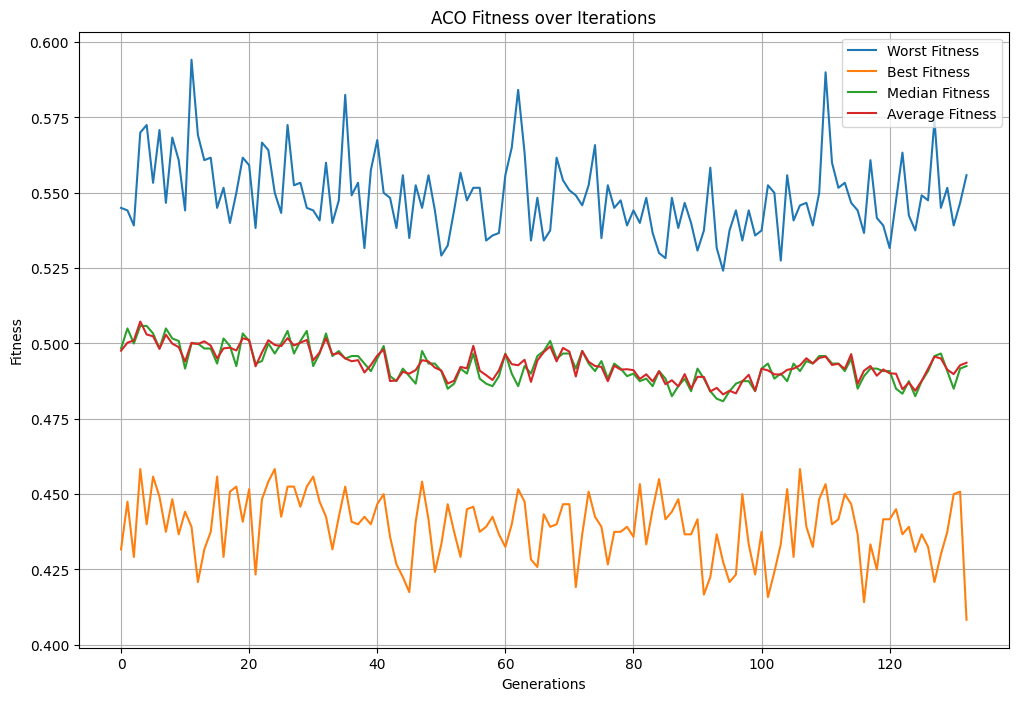

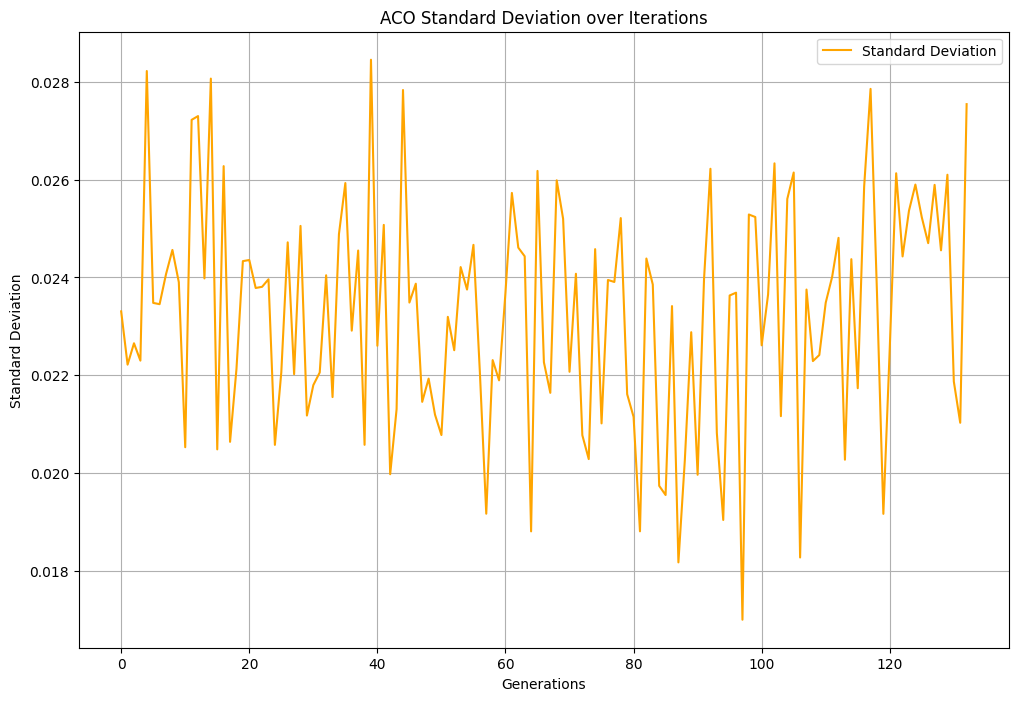

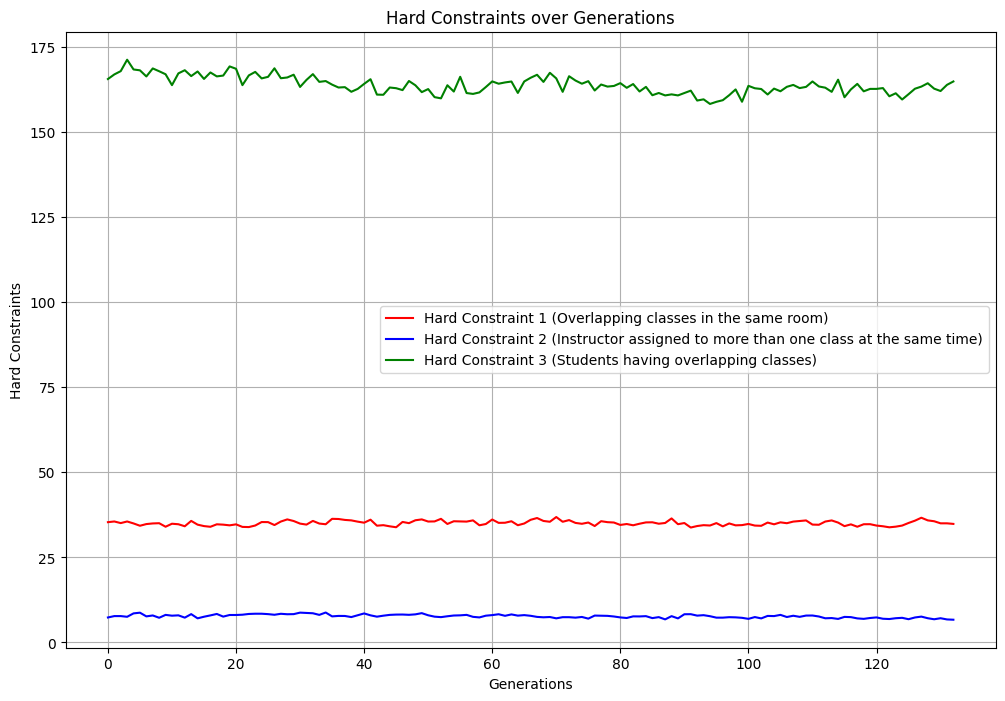

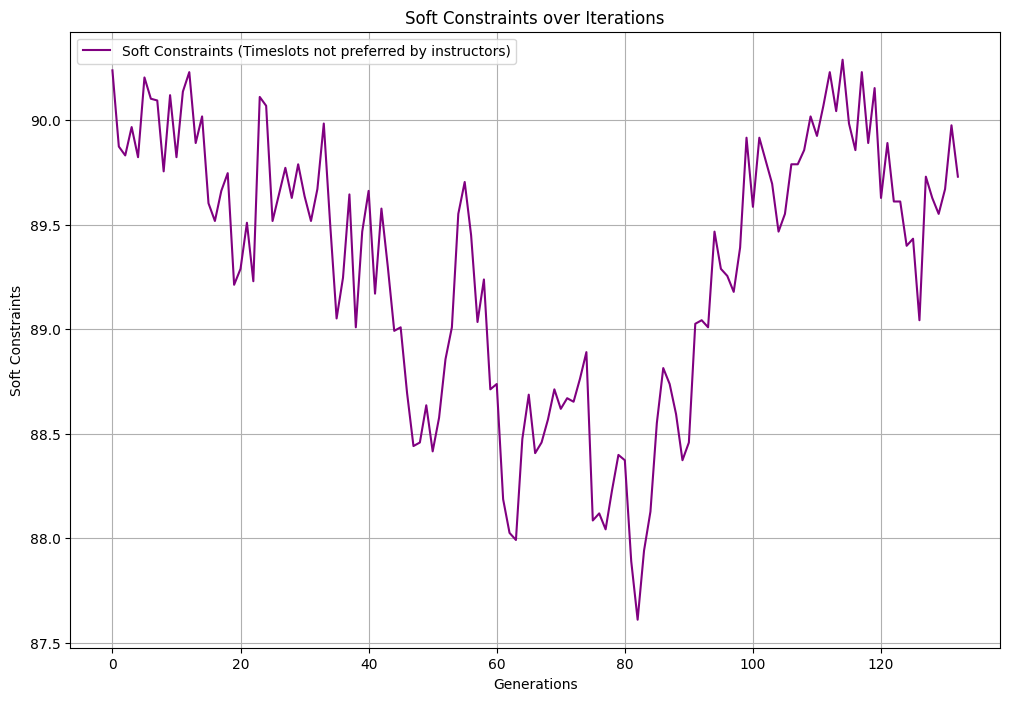

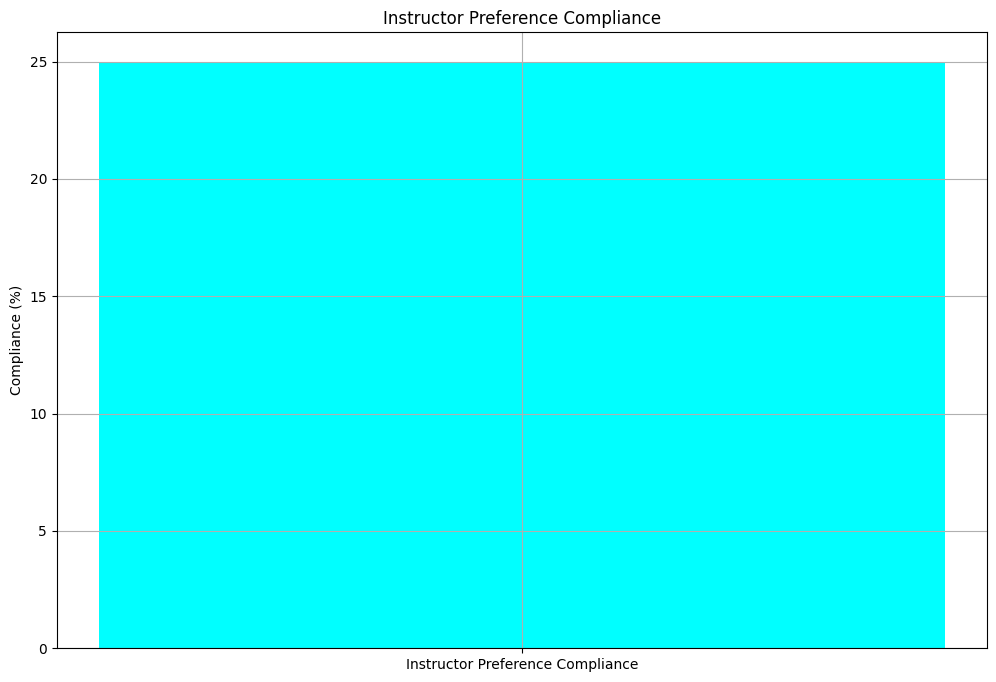

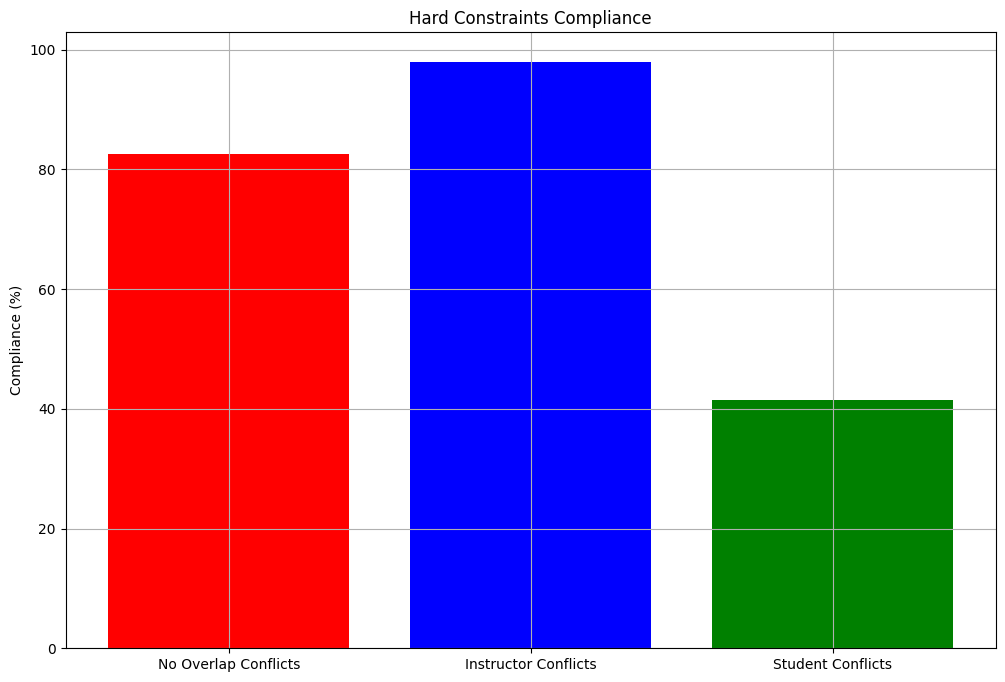

In [ ]:
# @title ACO: RESULTS OF THE BEST PERFORMING SEED (17).


import seaborn as sns
import numpy as np  # Ensure that NumPy is imported here
import matplotlib.pyplot as plt
import random
from time import time
#  Best Parameters for ACO
num_ants = 59
num_iterations = 133
alpha = 0.8812899911986412  # Influence of pheromone
beta = 1.2107849139232842   # Influence of heuristic
evaporation_rate = 0.8181636433351727
seed = 17  # Set the seed for reproducibility

# Set the best perfoming seed
np.random.seed(seed)

# Initialize pheromone levels
def initialize_pheromones():
    pheromones = np.ones((len(courses), len(rooms), len(timeslots)))
    return pheromones

# Heuristic information (inverse of conflicts heuristic)
def calculate_heuristic():
    heuristic = np.ones((len(courses), len(rooms), len(timeslots)))
    return heuristic

# Precompute probabilities
def compute_probabilities(pheromones, heuristic):
    probabilities = np.zeros_like(pheromones)
    for i in range(len(courses)):
        for j in range(len(rooms)):
            for k in range(len(timeslots)):
                probabilities[i, j, k] = (pheromones[i, j, k] ** alpha) * (heuristic[i, j, k] ** beta)
    return probabilities / probabilities.sum(axis=(1, 2), keepdims=True)

# Build solution based on pheromone and heuristic
def build_solution(probabilities):
    solution = []
    for course_index, course in enumerate(courses):
        flattened_probs = probabilities[course_index].flatten()
        chosen_index = np.random.choice(np.arange(flattened_probs.size), p=flattened_probs)
        room_index, timeslot_index = divmod(chosen_index, probabilities.shape[2])
        chosen_room = rooms[room_index]
        chosen_timeslot = timeslots[timeslot_index]

        instructor = course['instructor_id']
        student_list = [s['student_id'] for s in students if course['course_id'] in s['courses']]
        solution.append((course['course_id'], chosen_room['room_id'], chosen_timeslot['timeslot_id'], instructor, student_list))
    return solution

# Update pheromones based on solutions
def update_pheromones(pheromones, solutions, fitness_values):
    pheromones *= (1 - evaporation_rate)
    for solution, fitness in zip(solutions, fitness_values):
        for course_id, room_id, timeslot_id, _, _ in solution:
            course_index = next(i for i, course in enumerate(courses) if course['course_id'] == course_id)
            room_index = next(i for i, room in enumerate(rooms) if room['room_id'] == room_id)
            timeslot_index = next(i for i, timeslot in enumerate(timeslots) if timeslot['timeslot_id'] == timeslot_id)
            pheromones[course_index][room_index][timeslot_index] += 1.0 / fitness

# Calculate instructor preference compliance
def calculate_instructor_preference_compliance(best_solution):
    total_instructors = len(instructors)
    satisfied_instructors = 0

    for instructor in instructors:
        instructor_id = instructor['instructor_id']
        preferred_timeslots = instructor['preferred_timeslots']
        for course in best_solution:
            course_id, room_id, timeslot_id, assigned_instructor_id, student_list = course
            if assigned_instructor_id == instructor_id and timeslot_id in preferred_timeslots:
                satisfied_instructors += 1
                break

    return satisfied_instructors / total_instructors * 100

# Calculate hard constraints compliance
def calculate_hard_constraints_compliance(best_solution):
    total_courses = len(best_solution)
    no_overlap_conflicts = 0
    instructor_conflicts = 0
    student_conflicts = 0

    # Check for overlapping classes in the same room
    room_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution:
        if (room_id, timeslot_id) not in room_timeslot_dict:
            room_timeslot_dict[(room_id, timeslot_id)] = course_id
        else:
            no_overlap_conflicts += 1

    # Check for instructors assigned to more than one class at the same time
    instructor_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution:
        if (instructor_id, timeslot_id) not in instructor_timeslot_dict:
            instructor_timeslot_dict[(instructor_id, timeslot_id)] = course_id
        else:
            instructor_conflicts += 1

    # Check for students having overlapping classes
    student_timeslot_dict = {}
    for course_id, room_id, timeslot_id, instructor_id, student_list in best_solution:
        for student_id in student_list:
            if (student_id, timeslot_id) not in student_timeslot_dict:
                student_timeslot_dict[(student_id, timeslot_id)] = course_id
            else:
                student_conflicts += 1

    return {
        'no_overlap_conflicts': (total_courses - no_overlap_conflicts) / total_courses * 100,
        'instructor_conflicts': (total_courses - instructor_conflicts) / total_courses * 100,
        'student_conflicts': (total_courses - student_conflicts) / total_courses * 100
    }

# Main ACO loop
def aco():
    pheromones = initialize_pheromones()
    heuristic = calculate_heuristic()

    stats = {
        'worst': [],
        'best': [],
        'median': [],
        'average': [],
        'std_dev': []
    }

    global global_hard_constraints, global_soft_constraints
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []

    for iteration in range(num_iterations):
        probabilities = compute_probabilities(pheromones, heuristic)
        solutions = [build_solution(probabilities) for _ in range(num_ants)]
        fitness_values = fitness_function(solutions, None)

        update_pheromones(pheromones, solutions, fitness_values)

        stats['worst'].append(max(fitness_values))
        stats['best'].append(min(fitness_values))
        stats['median'].append(sorted(fitness_values)[len(fitness_values) // 2])
        stats['average'].append(sum(fitness_values) / len(fitness_values))
        std_dev = (sum((x - stats['average'][-1])**2 for x in fitness_values) / len(fitness_values))**0.5
        stats['std_dev'].append(round(std_dev, 6))

    best_solution = solutions[fitness_values.index(min(fitness_values))]
    print('Best Solution:')
    for course in best_solution:
        print(course)
    print('Best Fitness:', min(fitness_values))

    # Print schedule for each room
    room_schedule = {}
    for course in best_solution:
        course_id, room_id, timeslot_id, instructor_id, student_list = course
        if room_id not in room_schedule:
            room_schedule[room_id] = []
        room_schedule[room_id].append(course)

    print('\nRoom Schedules:')
    for room_id in sorted(room_schedule.keys()):
        print(f'\nRoom {room_id}:')
        for course in room_schedule[room_id]:
            course_id, room_id, timeslot_id, instructor_id, student_list = course
            print(f'  Course {course_id} in Timeslot {timeslot_id} by Instructor {instructor_id}')

    # Calculate and print instructor preference compliance
    instructor_preference_compliance = calculate_instructor_preference_compliance(best_solution)
    print(f'\nInstructor Preference Compliance: {instructor_preference_compliance:.2f}%')

    # Calculate and print hard constraints compliance
    hard_constraints_compliance = calculate_hard_constraints_compliance(best_solution)
    print(f"Compliance with no overlap conflicts: {hard_constraints_compliance['no_overlap_conflicts']:.2f}%")
    print(f"Compliance with instructor conflicts: {hard_constraints_compliance['instructor_conflicts']:.2f}%")
    print(f"Compliance with student conflicts: {hard_constraints_compliance['student_conflicts']:.2f}%")

    # Ensure stats lists are the same length as the number of generations
    max_generations = len(stats['worst'])
    stats['worst'] = stats['worst'][:max_generations]
    stats['best'] = stats['best'][:max_generations]
    stats['median'] = stats['median'][:max_generations]
    stats['average'] = stats['average'][:max_generations]
    stats['std_dev'] = stats['std_dev'][:max_generations]

    # Print the values of hard constraints for debugging
    print("Debug - Global Hard Constraints:")
    print("H1 (Overlapping classes in the same room):", global_hard_constraints['h1'])
    print("H2 (Instructor assigned to more than one class at the same time):", global_hard_constraints['h2'])
    print("H3 (Students having overlapping classes):", global_hard_constraints['h3'])

    # Plotting the fitness stats
    generations = list(range(len(stats['worst'])))
    plt.figure(figsize=(12, 8))
    plt.plot(generations, stats['worst'], label='Worst Fitness')
    plt.plot(generations, stats['best'], label='Best Fitness')
    plt.plot(generations, stats['median'], label='Median Fitness')
    plt.plot(generations, stats['average'], label='Average Fitness')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.title('ACO Fitness over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting the standard deviation
    plt.figure(figsize=(12, 8))
    plt.plot(generations, stats['std_dev'], label='Standard Deviation', color='orange')
    plt.xlabel('Generations')
    plt.ylabel('Standard Deviation')
    plt.title('ACO Standard Deviation over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting hard constraints
    plot_hard_constraints(generations, global_hard_constraints['h1'], global_hard_constraints['h2'], global_hard_constraints['h3'])

    # Plotting soft constraints
    plt.figure(figsize=(12, 8))
    plt.plot(generations, global_soft_constraints, label='Soft Constraints (Timeslots not preferred by instructors)', color='purple')
    plt.xlabel('Generations')
    plt.ylabel('Soft Constraints')
    plt.title('Soft Constraints over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting instructor preference compliance
    plt.figure(figsize=(12, 8))
    plt.bar(['Instructor Preference Compliance'], [instructor_preference_compliance], color='cyan')
    plt.ylabel('Compliance (%)')
    plt.title('Instructor Preference Compliance')
    plt.grid(True)
    plt.show()

    # Plotting hard constraints compliance
    plt.figure(figsize=(12, 8))
    plt.bar(['No Overlap Conflicts', 'Instructor Conflicts', 'Student Conflicts'],
            [hard_constraints_compliance['no_overlap_conflicts'],
             hard_constraints_compliance['instructor_conflicts'],
             hard_constraints_compliance['student_conflicts']],
            color=['red', 'blue', 'green'])
    plt.ylabel('Compliance (%)')
    plt.title('Hard Constraints Compliance')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    global_hard_constraints = {'h1': [], 'h2': [], 'h3': []}
    global_soft_constraints = []
    aco()